# Project 9 - Working with OLS

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_

We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [1]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


Next, transform these arrays into row vectors using matrix().

In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join them using the concatenate() function. We define axis=0 to stack each row on upon the next:

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep="\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Finally, we can invert the matrix that we have made using .getI().

In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


These values are not rounded, so interpretation of the inverted matrix could be more intuitive. We use the round() method from the numpy module to round values to two places.

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


## Regression Function

Now that we have learned the necessary operations, we can understand the operations of the regression function. If you would like to build your own regression module, reconstruct the scripts form Chapter 7. In this lesson, we will use the statsmodels OLS method to reconstruct and compare statistics from an OLS regression. 

Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

Each estimated $\beta$ value is multiplied by each observation of the relevant exogenous variable estimate the effect of the value on the endogenous, $Y$, value.

We will run a regression In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. 

Let's use the data from chapter 6 with the addition real GDP per capita. This combined set of data is saved in the repository as a file created in chapter 8.

In [6]:
import pandas as pd
mgdp = pd.read_excel("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx", 
                   index_col = [0,2],
                   parse_dates = True, 
                    sheet_name = "Full data")
mgdp

country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [7]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename, 
                     index_col = [2,0], 
                     header = [0],
                     sheet_name = "EFW Panel Data 2022 Report")
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [8]:
data["RGDP Per Capita"] = mgdp["gdppc"]
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [9]:
data.sort_index(inplace = True)
# !pip install xlwt
# save to file. We will need to reimport for the homework question
data.to_excel("EFWAndRGDP.xls")
data.to_csv("fraserDataWithRGDPPC.csv")
data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\2282283535.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("EFWAndRGDP.xls")


ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                  
AGO        1970         AO  Sub-Saharan Africa   
           1975         AO  Sub-Saharan Africa   
           1980         AO  Sub-Saharan Africa   
           1985         AO  Sub-Saharan Africa   
           1990         AO  Sub-Saharan Africa   
...                    ...                 ...   
ZWE        2016         ZW  Sub-Saharan Africa   
           2017         ZW  Sub-Saharan Africa   
           2018         ZW  Sub-Saharan Africa   
           2019         ZW  Sub-Saharan Africa   
           2020         ZW  Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AGO        1970                                                NaN                                                                                     
           1975                                                NaN                                                                                     
           1980                                                NaN                                                                                     
           1985                                                NaN                                                                                     
           1990                                                 LM                                                                                     
...                                                            ...                                                                                     
ZWE        2016                                                  L                                                                                     
           2017                                                  L                                                                                     
           2018                                                 LM                                                                                     
           2019                                                 LM                                                                                     
           2020                                                 LM                                                                                     

                Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        1970    Angola       NaN                 NaN   
           1975    Angola       NaN                 NaN   
           1980    Angola       NaN                 NaN   
           1985    Angola       NaN                 NaN   
           1990    Angola       NaN                 NaN   
...                   ...       ...                 ...   
ZWE        2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   
           2019  Zimbabwe  4.719465            5.628359   
           2020  Zimbabwe  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017           

In [10]:
# Remove any columns not used
data = data[data.keys()[4:]]
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        1970       NaN                 NaN   
           1975       NaN                 NaN   
           1980       NaN                 NaN   
           1985       NaN                 NaN   
           1990       NaN                 NaN   
...                   ...                 ...   
ZWE        2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   
           2019  4.719465            5.628359   
           2020  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   
           2019                          4.026568     1.413372   
           2020                          3.965267     1.250000   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        1970                               NaN         NaN   
           1975                               NaN         NaN   
           1980                               NaN         NaN   
           1985                               NaN         NaN   
           1990                               NaN         NaN   
...                                           ...         ...   
ZWE        2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   
           2019                          6.397045    6.132583   
           2020                          5.565207    6.080774   

                 Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                          
AGO        1970                                    NaN        2818.0000  
           1975                                    NaN        1710.0000  
           1980                                    NaN        1532.0000  
           1985                                    NaN        1242.0000  
           1990                                    NaN        1384.0000  
...                                                ...              ...  
ZWE        2016                               1.498126        1534.0000  
           2017                               1.631512        1582.3662  
           2018                               1.262218        1611.4052  
           2019                               2.064439              NaN  
           2020                               1.975388              NaN  

[4455 rows x 8 columns]

Time series data is often subject to trend. This is the case with real GDP per capita data. Real GDP per capita tends to grow at a steady rate. To offset this effect we can include the lag of real GDP per capita in the regression that we run. Later, we will try to confront the same problem by estimating the annual pct_change of real GDP per capita.

The years are ordered from latest to earliest. We need them to start from earliest. We will save the index of all but the last year.



In [11]:
data = data.dropna(axis=0)
data.loc["GBR"]

Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  6.035320            4.622300                          7.344851   
1975  6.151944            4.541987                          7.665156   
1980  6.970904            5.306871                          7.684342   
1985  8.062849            5.710748                          8.032417   
1990  8.200173            6.519684                          8.164475   
1995  8.348727            6.377623                          8.281839   
2000  8.588978            7.094016                          8.436520   
2001  8.508987            6.861468                          8.467307   
2002  8.588978            7.039989                          8.386749   
2003  8.568980            6.939693                          8.415994   
2004  8.488990            6.918936                          8.331910   
2005  8.449041            6.823132                          8.413372   
2006  8.389119            6.814850                          8.293865   
2007  8.289249            6.830015                          8.091541   
2008  8.169404            6.421141                          8.173346   
2009  8.079521            6.286457                          8.196307   
2010  8.099495            5.980358                          8.195087   
2011  8.119469            6.072666                          8.253507   
2012  8.149430            6.169087                          8.134441   
2013  8.109482            6.392459                          8.134102   
2014  8.169404            6.411756                          8.150850   
2015  8.269275            6.485108                          8.238418   
2016  8.259288            6.512641                          8.219432   
2017  8.299236            6.555082                          8.160868   
2018  8.169404            6.558084                          7.739573   

      Sound Money  Freedom to Trade Internationally  Regulation  \
Year                                                              
1970     7.312995                          3.981406    7.489366   
1975     4.867740                          6.632374    6.996952   
1980     5.867571                          8.801656    7.077147   
1985     9.079055                          9.136294    8.334242   
1990     8.482826                          9.139436    8.650617   
1995     9.569957                          9.210126    8.254403   
2000     9.301871                          9.388696    8.675363   
2001     9.534175                          9.251954    8.411201   
2002     9.687376                          9.257991    8.533949   
2003     9.554882                          9.318062    8.564115   
2004     9.565920                          9.009034    8.609768   
2005     9.551954                          8.902724    8.538042   
2006     9.444472                          8.870425    8.501961   
2007     9.333523                          8.833803    8.336097   
2008     9.262539                          8.788923    8.219933   
2009     9.430333                          8.896829    7.591884   
2010     9.469206                          8.947828    7.888968   
2011     9.605540                          8.852754    7.810114   
2012     9.750531                          8.724891    7.947132   
2013     9.792034                          8.427615    7.822191   
2014     9.786076                          8.629849    7.849646   
2015     9.897126                          8.545379    8.158551   
2016     9.839327                          8.580156    8.144967   
2017     9.682455                          8.520229    8.560498   
2018     9.648576                          8.448070    8.449469   

      Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
Year                                                          
1970                               1.703731       17162.0000  
1975                               1.367040       18884.0000  


## Running a Regression

An ordinary least squares regression genereates a predictor that minimuzes the sum squared errors represented by the difference between the observed values and the predicted values generated from by the regression. The predictor is defined by separate linear parameters for each exogenous variable. For each observation, each parameter is multiplied by the value of the variable represent the effect of that variable on the endogenous variabel $y$.

The result is a predictor that can be compared to the observed data. Next, we will generate such a linear prediction and consider how we quantify the variance that is explained by that prediction.

In [12]:
reg_vars = list(data.keys())
del reg_vars[-2]
del reg_vars[0]
reg_vars

['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [13]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[:-1]
reg_data = data[reg_vars]
reg_data.corr().round(2)

Size of Government  \
Size of Government                              1.00   
Legal System and Property Rights               -0.13   
Sound Money                                     0.16   
Freedom to Trade Internationally                0.20   
Regulation                                      0.17   
RGDP Per Capita                                -0.18   

                                  Legal System and Property Rights  \
Size of Government                                           -0.13   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.53   
Freedom to Trade Internationally                              0.64   
Regulation                                                    0.66   
RGDP Per Capita                                               0.66   

                                  Sound Money  \
Size of Government                       0.16   
Legal System and Property Rights         0.53   
Sound Money                              1.00   
Freedom to Trade Internationally         0.70   
Regulation                               0.62   
RGDP Per Capita                          0.46   

                                  Freedom to Trade Internationally  \
Size of Government                                            0.20   
Legal System and Property Rights                              0.64   
Sound Money                                                   0.70   
Freedom to Trade Internationally                              1.00   
Regulation                                                    0.69   
RGDP Per Capita                                               0.52   

                                  Regulation  RGDP Per Capita  
Size of Government                      0.17            -0.18  
Legal System and Property Rights        0.66             0.66  
Sound Money                             0.62             0.46  
Freedom to Trade Internationally        0.69             0.52  
Regulation                              1.00             0.53  
RGDP Per Capita                         0.53             1.00

In [14]:
import statsmodels.api as sm
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [15]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


Size of Government  Legal System and Property Rights  \
ISO_Code_3 Year                                                         
AGO        2005            6.886311                          3.129619   
           2006            5.162277                          3.238314   
           2007            4.963676                          3.224507   
           2008            4.715589                          3.382642   
           2009            7.455501                          3.394515   
...                             ...                               ...   
ZWE        2014            6.771807                          3.930143   
           2015            6.964753                          4.108142   
           2016            5.332597                          4.056407   
           2017            4.699843                          4.071445   
           2018            5.170946                          4.041897   

                 Sound Money  Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                              
AGO        2005     1.270081                          5.356979    4.511067   
           2006     3.807267                          5.302944    5.118114   
           2007     4.015297                          5.139768    5.348260   
           2008     4.653201                          5.181950    5.185843   
           2009     4.901540                          5.503538    5.007256   
...                      ...                               ...         ...   
ZWE        2014     7.664303                          6.398692    5.039824   
           2015     7.859669                          6.509231    6.555970   
           2016     8.086016                          6.404937    6.520805   
           2017     7.983888                          4.503965    6.399757   
           2018     7.312324                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor  
ISO_Code_3 Year                                              
AGO        2005        3708.7706               -5474.902171  
           2006        4592.3373                3221.099672  
           2007        5773.5483                4184.555105  
           2008        6743.7482                5776.385317  
           2009        7087.6041               -1464.025089  
...                          ...                        ...  
ZWE        2014        1594.0000                6250.400915  
           2015        1560.0000                9989.206335  
           2016        1534.0000               14271.539452  
           2017        1582.3662               13288.328954  
           2018        1611.4052               13484.096702  

[3145 rows x 7 columns]

### Calculate SSE, SSR, and SST

Now that we have saved the predictor, we can generate our sum squared errors, sum squared due to regression, and total sum squares. These will be used to generate our $R^2$ value, which estimates the variance explained by the predictor.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$


In [16]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

Size of Government  Legal System and Property Rights  \
ISO_Code_3 Year                                                         
AGO        2005            6.886311                          3.129619   
           2006            5.162277                          3.238314   
           2007            4.963676                          3.224507   
           2008            4.715589                          3.382642   
           2009            7.455501                          3.394515   
...                             ...                               ...   
ZWE        2014            6.771807                          3.930143   
           2015            6.964753                          4.108142   
           2016            5.332597                          4.056407   
           2017            4.699843                          4.071445   
           2018            5.170946                          4.041897   

                 Sound Money  Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                              
AGO        2005     1.270081                          5.356979    4.511067   
           2006     3.807267                          5.302944    5.118114   
           2007     4.015297                          5.139768    5.348260   
           2008     4.653201                          5.181950    5.185843   
           2009     4.901540                          5.503538    5.007256   
...                      ...                               ...         ...   
ZWE        2014     7.664303                          6.398692    5.039824   
           2015     7.859669                          6.509231    6.555970   
           2016     8.086016                          6.404937    6.520805   
           2017     7.983888                          4.503965    6.399757   
           2018     7.312324                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor     Residuals  \
ISO_Code_3 Year                                                             
AGO        2005        3708.7706               -5474.902171   9183.672771   
           2006        4592.3373                3221.099672   1371.237628   
           2007        5773.5483                4184.555105   1588.993195   
           2008        6743.7482                5776.385317    967.362883   
           2009        7087.6041               -1464.025089   8551.629189   
...                          ...                        ...           ...   
ZWE        2014        1594.0000                6250.400915  -4656.400915   
           2015        1560.0000                9989.206335  -8429.206335   
           2016        1534.0000               14271.539452 -12737.539452   
           2017        1582.3662               13288.328954 -11705.962754   
           2018        1611.4052               13484.096702 -11872.691502   

                 Squared Explained  Squared Residuals  Squared Totals  
ISO_Code_3 Year                                                        
AGO        2005       4.693919e+08       8.433985e+07    1.557949e+08  
           2006       1.682067e+08       1.880293e+06    1.345186e+08  
           2007       1.441440e+08       2.524899e+06    1.085140e+08  
           2008       1.084549e+08       9.357909e+05    8.924211e+07  
           2009       3.116841e+08       7.313036e+07    8.286367e+07  
...                            ...                ...             ...  
ZWE        2014       9.880662e+07       2.168207e+07    2.130593e+08  
           2015       3.845670e+07       7.105152e+07    2.140531e+08  
           2016       3.682612e+06       1.622449e+08    2.148145e+08  
           2017       8.422902e+06       1.370296e+08    2.133991e+08  
           2018       7.324904e+06       1.409608e+08    2.125515e+08  

[3145 rows x 11 columns]

In [17]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(450042843462.08484, 476075689815.2105, 926118533277.2952)

# Calculate Estimator Variance 
With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix, $(X'X)^{-1}$:

$\sigma^2 (X'X)^{-1}$


In [18]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(3145.0, 6, 151664762.60439965)

In [19]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      40914.793154   
Legal System and Property Rights        15255.069988   
Sound Money                             -1703.383623   
Freedom to Trade Internationally        -8958.214157   
Regulation                             -10448.584144   
Constant                              -206750.428690   

                                  Legal System and Property Rights  \
Size of Government                                    15255.069988   
Legal System and Property Rights                      38475.583705   
Sound Money                                           -2060.902767   
Freedom to Trade Internationally                     -14360.980502   
Regulation                                           -22112.680701   
Constant                                             -42710.577560   

                                   Sound Money  \
Size of Government                -1703.383623   
Legal System and Property Rights  -2060.902767   
Sound Money                       31363.960883   
Freedom to Trade Internationally -15910.601600   
Regulation                       -10972.822920   
Constant                         -40808.774501   

                                  Freedom to Trade Internationally  \
Size of Government                                    -8958.214157   
Legal System and Property Rights                     -14360.980502   
Sound Money                                          -15910.601600   
Freedom to Trade Internationally                      44857.357302   
Regulation                                           -14664.804830   
Constant                                              52596.396443   

                                     Regulation      Constant  
Size of Government                -10448.584144 -2.067504e+05  
Legal System and Property Rights  -22112.680701 -4.271058e+04  
Sound Money                       -10972.822920 -4.080877e+04  
Freedom to Trade Internationally  -14664.804830  5.259640e+04  
Regulation                         78985.583047 -1.570828e+05  
Constant                         -157082.849671  2.648421e+06

In [20]:
results.params

Size of Government                  -2752.213782
Legal System and Property Rights     3966.073311
Sound Money                           902.358447
Freedom to Trade Internationally     1279.872496
Regulation                           2141.030500
Constant                           -16595.251456
dtype: float64

Taking the squareroot of  the diagonal values of the covariance matrix generates each variable's standard error. To check for statistical significance, we calculate the t-statistics for each variable by divising each beta parameter by the estimates standard error: $\frac{\beta}{SE}$. Then we create a dictionary with these three values for each variables and transform it into a pandas dataframe.

In [21]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

Beta  Standard Error    t-stats
Size of Government               -2752.213782      202.274055 -13.606361
Legal System and Property Rights  3966.073311      196.151940  20.219394
Sound Money                        902.358447      177.098732   5.095228
Freedom to Trade Internationally  1279.872496      211.795555   6.042962
Regulation                        2141.030500      281.043739   7.618140

 # Calculate $R^2$

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.


In [22]:
r2 = SSR/SST
r2

0.48594518659452696

### Adjusted R-Squared
Although the $R^2$ is a useful measure to understand the quality of the explanation provided by the selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$


Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. One should not depend solely on the adjusted $R^2$ to consider the strength of a regression's results, but it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

${R^2}_{Adjusted} = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$


In [23]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.48512636720394786

Now we can compare the statistics that we built ourselves to the summary statistics. Good work!

*The p-value of each variable is implied by it's t-statistic.

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     593.5
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:23:31   Log-Likelihood:                -34081.
No. Observations:                3145   AIC:                         6.817e+04
Df Residuals:                    3139   BIC:                         6.821e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2752.2138    202.274    -13.606      0.000   -3148.817   -2355.611
Legal System and Property Rights  3966.0733    196.152     20.219      0.000    3581.474    4350.672
Sound Money                        902.3584    177.099      5.095      0.000     555.117    1249.599
Freedom to Trade Internationally  1279.8725    211.796      6.043      0.000     864.601    1695.144
Regulation                        2141.0305    281.044      7.618      0.000    1589.982    2692.079
Constant                          -1.66e+04   1627.397    -10.197      0.000   -1.98e+04   -1.34e+04
==============================================================================
Omnibus:                     2952.722   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189244.770
Skew:                           4.324   Prob(JB):                         0.00
Kurtosis:                      40.005   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Common Problems with OLS
Although our regression generates a large t-statitic, our errors are not normally distributed. This is due in part to our use of untransformed time-series data. To make the data normally distributed, we could log the data or calculate either the annual difference or percent change. Logging the data will maintain levels. Since this data suffers from a trend, we will calculate the annual difference of index values and the annual percent change of real GDP per capita values after we review the distribution of residuals.

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

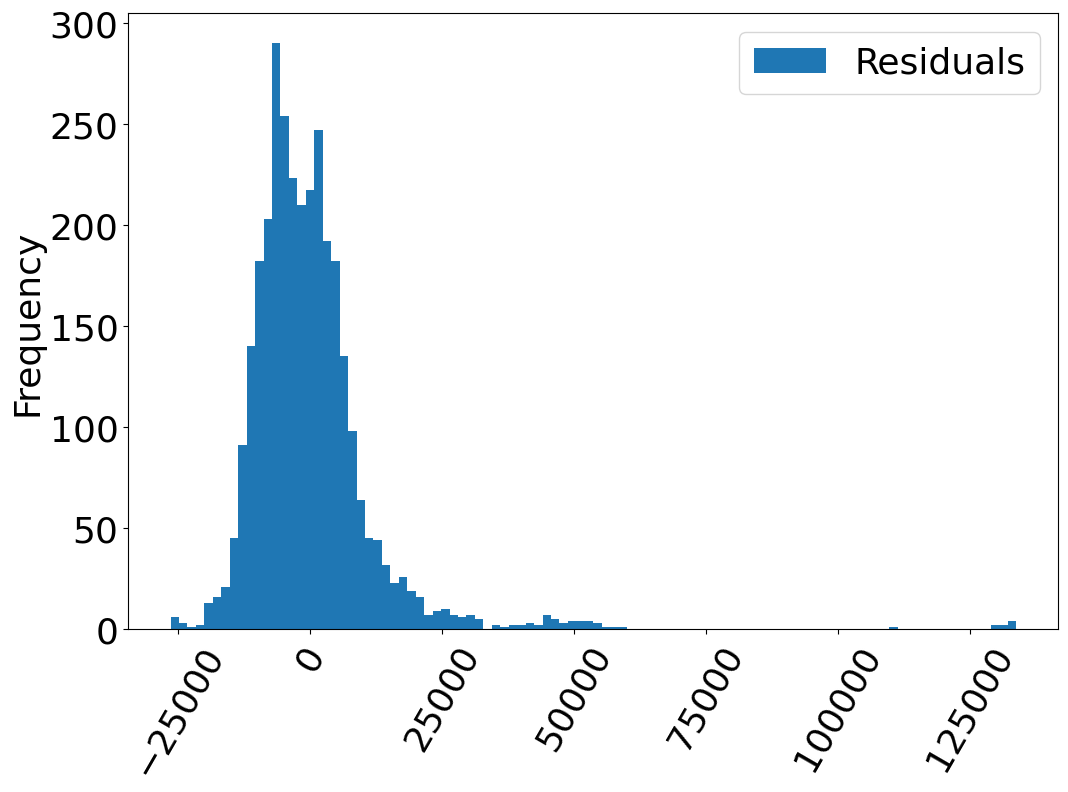

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Frequency'>

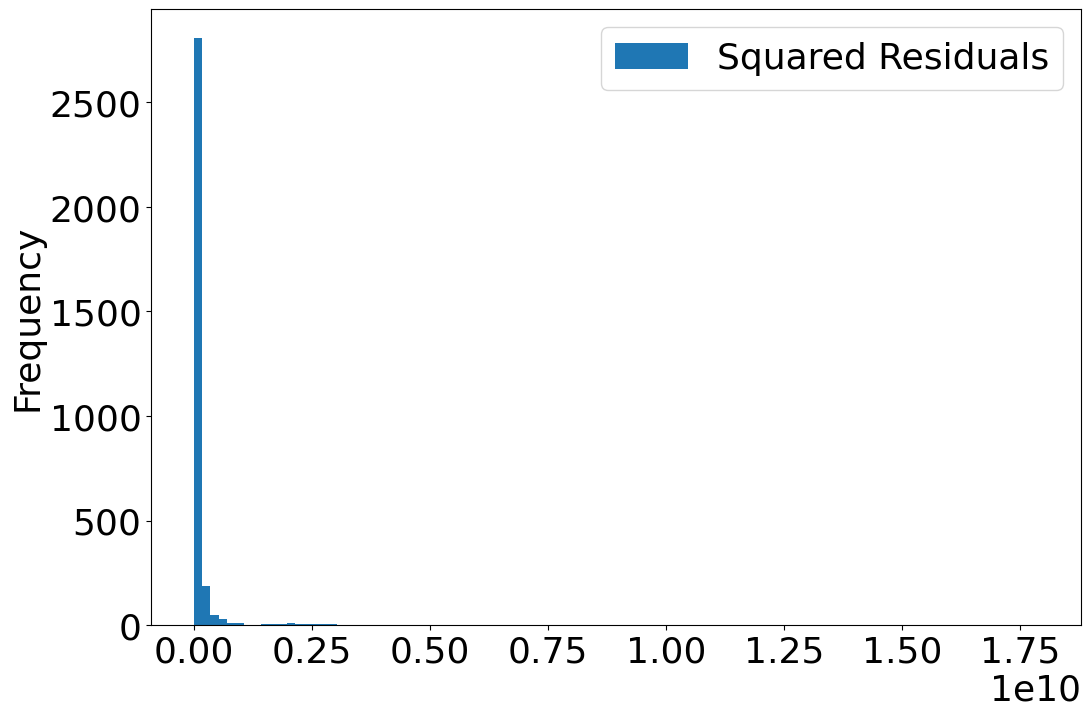

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

In [27]:
##### countries = data.groupby("ISO_Code").mean().index
# for country in countries:
#     fig, ax = plt.subplots(figsize = (12,8))
#     reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
#     ax.set_title(country)

## Regression logged differences

To normalize the distribution of errors, we will transform the *real GDP* into the growth rate of real GDP. Since even the growth rate of GDP tends to be autocorrelated, we may control for this using a lag. We will not change any of the scores from the economic freedom index, thus implying that the scores tend to operate on the rate of growth.

Since we are using panel data - each year has as many observations as there are countries - we will need to take a few extra steps when generating any differenced (or lagged) variables. 

In [28]:
years_diff = 5
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff) 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)
reg_data.loc["USA"]

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\1196368539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff)


Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  7.615181            5.341231                          8.286741   
1975  7.907324            5.336851                          8.670280   
1980  8.101368            5.788734                          8.684269   
1985  8.295413            6.582616                          8.726823   
1990  8.461126            7.262163                          8.350956   
1995  8.588435            7.446569                          8.587870   
2000  8.648077            7.704726                          8.773170   
2001  8.509072            7.521319                          8.615158   
2002  8.568646            7.673536                          8.370127   
2003  8.558717            7.866283                          8.257379   
2004  8.618290            8.071277                          8.139297   
2005  8.509323            7.892833                          7.937832   
2006  8.509323            7.871725                          7.874278   
2007  8.529298            7.824422                          7.977695   
2008  8.329549            7.274573                          7.908009   
2009  8.049900            6.649408                          7.700352   
2010  8.139787            7.027099                          7.647480   
2011  8.159762            7.202000                          7.491318   
2012  8.259637            7.394264                          7.566832   
2013  8.229674            7.015350                          7.592930   
2014  8.249649            7.239681                          7.652463   
2015  8.309574            7.237673                          7.745733   
2016  8.339536            7.252009                          7.793107   
2017  8.379486            7.354358                          7.802657   
2018  8.279612            7.409095                          7.646530   

      Sound Money  Freedom to Trade Internationally  Regulation  \
Year                                                              
1970     9.588817                          8.232334    6.631262   
1975     9.067438                          8.412407    8.042706   
1980     9.122306                          8.544966    8.359863   
1985     9.339660                          8.505198    8.335644   
1990     9.669842                          8.537828    8.477998   
1995     9.787931                          8.594211    8.538840   
2000     9.607665                          8.466601    8.739485   
2001     9.612028                          8.397002    8.464019   
2002     9.724310                          8.298912    8.819880   
2003     9.743489                          8.338465    8.662287   
2004     9.753433                          8.378804    8.786829   
2005     9.704102                          8.289870    8.736210   
2006     9.650034                          8.305433    8.861652   
2007     9.605929                          8.329089    8.934012   
2008     9.514924                          8.270653    8.691719   
2009     9.628821                          8.029884    8.259457   
2010     9.684594                          8.015303    8.337193   
2011     9.677635                          8.007558    8.424296   
2012     9.783103                          7.994599    8.571630   
2013     9.824240                          7.964254    8.736168   
2014     9.737154                          7.836022    8.792114   
2015     9.855788                          7.810632    8.891698   
2016     9.814703                          7.889129    8.952382   
2017     9.772320                          7.921225    9.031901   
2018     9.772494                          7.783384    8.784245   

      Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
Year                                                          
1970                               1.648185              NaN  
1975                               1.483975              NaN  


In [29]:
reg_data.dropna()

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        2010  5.420828            6.310978   
           2011  5.001537            6.156240   
           2012  5.470743            6.242498   
           2013  5.161267            4.975705   
           2014  5.071419            5.491864   
...                   ...                 ...   
ZWE        2014  5.999147            6.771807   
           2015  6.449595            6.964753   
           2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2010                          3.573909     5.742319   
           2011                          3.529052     5.743248   
           2012                          3.407577     6.681550   
           2013                          3.334574     6.860318   
           2014                          3.348855     6.888776   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2010                          5.755618    5.722125   
           2011                          5.188942    4.387177   
           2012                          5.855897    5.166821   
           2013                          5.694048    4.960447   
           2014                          4.835320    4.769493   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                          
AGO        2010                               1.061803         0.706954  
           2011                               1.056438         0.557050  
           2012                               1.280530         0.349627  
           2013                               1.282783         0.232391  
           2014                               1.283899         0.201867  
...                                                ...              ...  
ZWE        2014                               1.476750         0.215452  
           2015                               1.390903         0.106888  
           2016                               1.498126         0.012463  
           2017                               1.631512        -0.013579  
           2018                               1.262218         0.004606  

[2386 rows x 8 columns]

In [30]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\3386029528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\3386029528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()


In [31]:
y, X

(                 RGDP Per Capita
 ISO_Code_3 Year                 
 AGO        2010         0.706954
            2011         0.557050
            2012         0.349627
            2013         0.232391
            2014         0.201867
 ...                          ...
 ZWE        2014         0.215452
            2015         0.106888
            2016         0.012463
            2017        -0.013579
            2018         0.004606
 
 [2386 rows x 1 columns],
                  Size of Government  Legal System and Property Rights  \
 ISO_Code_3 Year                                                         
 AGO        2010            6.310978                          3.573909   
            2011            6.156240                          3.529052   
            2012            6.242498                          3.407577   
            2013            4.975705                          3.334574   
            2014            5.491864                          3.348855   
 ...        

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     14.78
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.68e-14
Time:                        10:23:32   Log-Likelihood:                 83.917
No. Observations:                2386   AIC:                            -155.8
Df Residuals:                    2380   BIC:                            -121.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0084      0.005      1.840      0.066      -0.001       0.017
Legal System and Property Rights     0.0057      0.005      1.201      0.230      -0.004       0.015
Sound Money                         -0.0069      0.005     -1.416      0.157      -0.017       0.003
Freedom to Trade Internationally     0.0325      0.006      5.294      0.000       0.020       0.045
Regulation                          -0.0073      0.007     -1.101      0.271      -0.020       0.006
Constant                            -0.0308      0.041     -0.747      0.455      -0.112       0.050
==============================================================================
Omnibus:                      883.300   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6968.587
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      10.789   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\3043588271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


<AxesSubplot:ylabel='Frequency'>

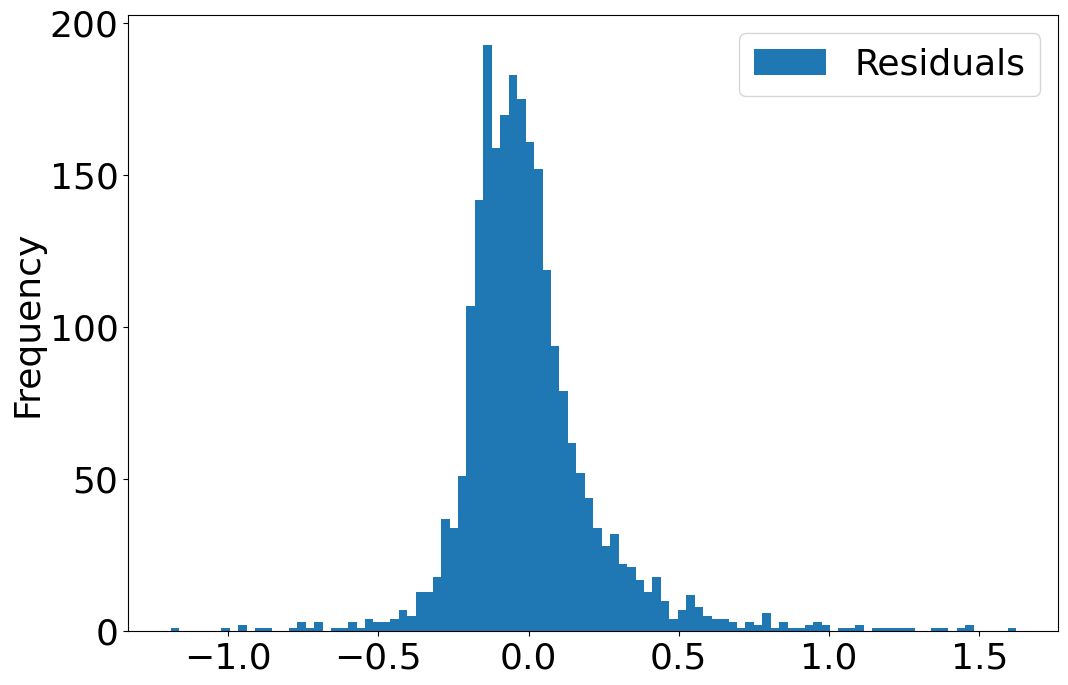

In [33]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [34]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Size of Government                         0.008    1.840     0.066   
Legal System and Property Rights           0.006    1.201     0.230   
Sound Money                               -0.007   -1.416     0.157   
Freedom to Trade Internationally           0.033    5.294     0.000   
Regulation                                -0.007   -1.101     0.271   
Constant                                  -0.031   -0.747     0.455   

                                  Standard Errors  
Size of Government                          0.005  
Legal System and Property Rights            0.005  
Sound Money                                 0.005  
Freedom to Trade Internationally            0.006  
Regulation                                  0.007  
Constant                                    0.041

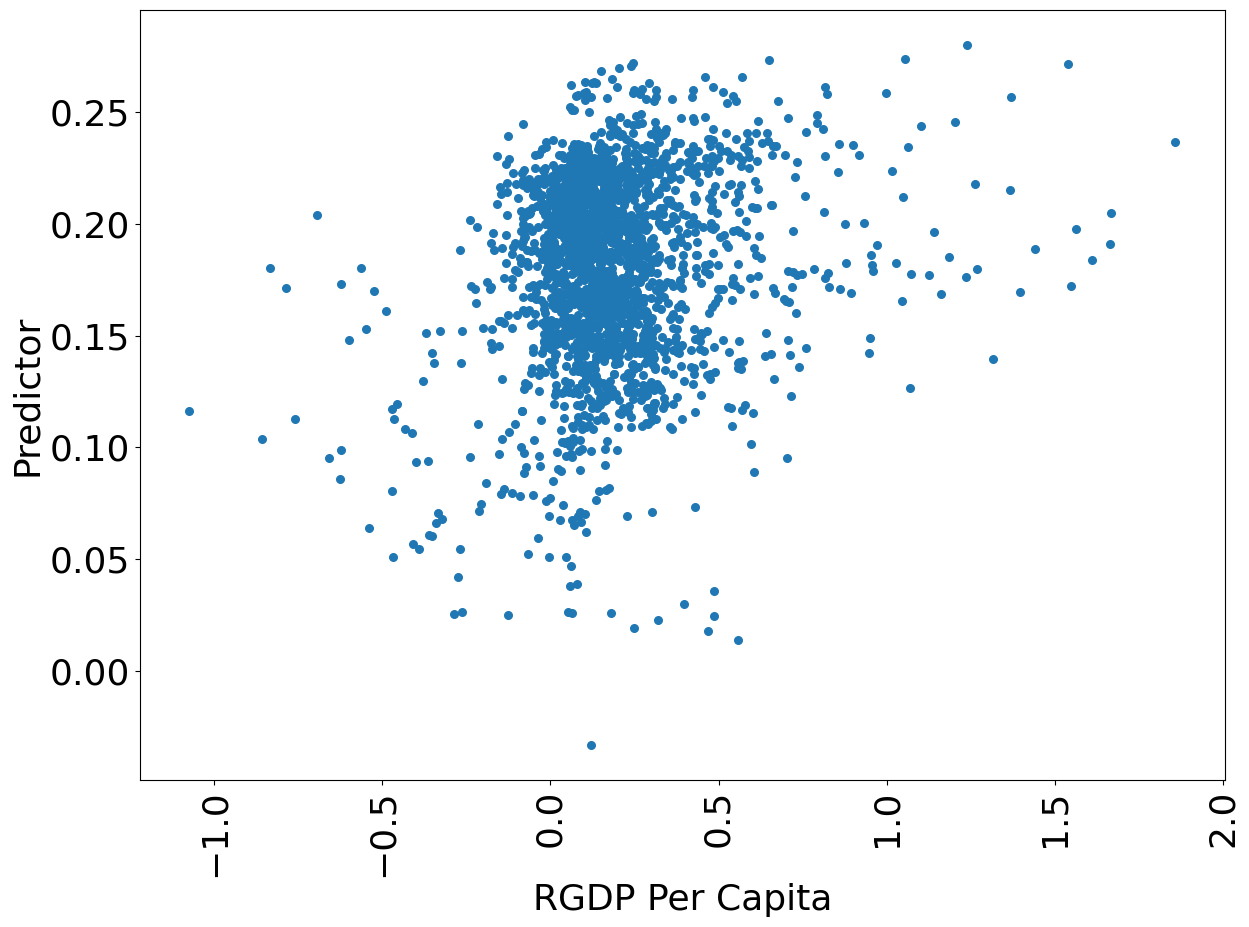

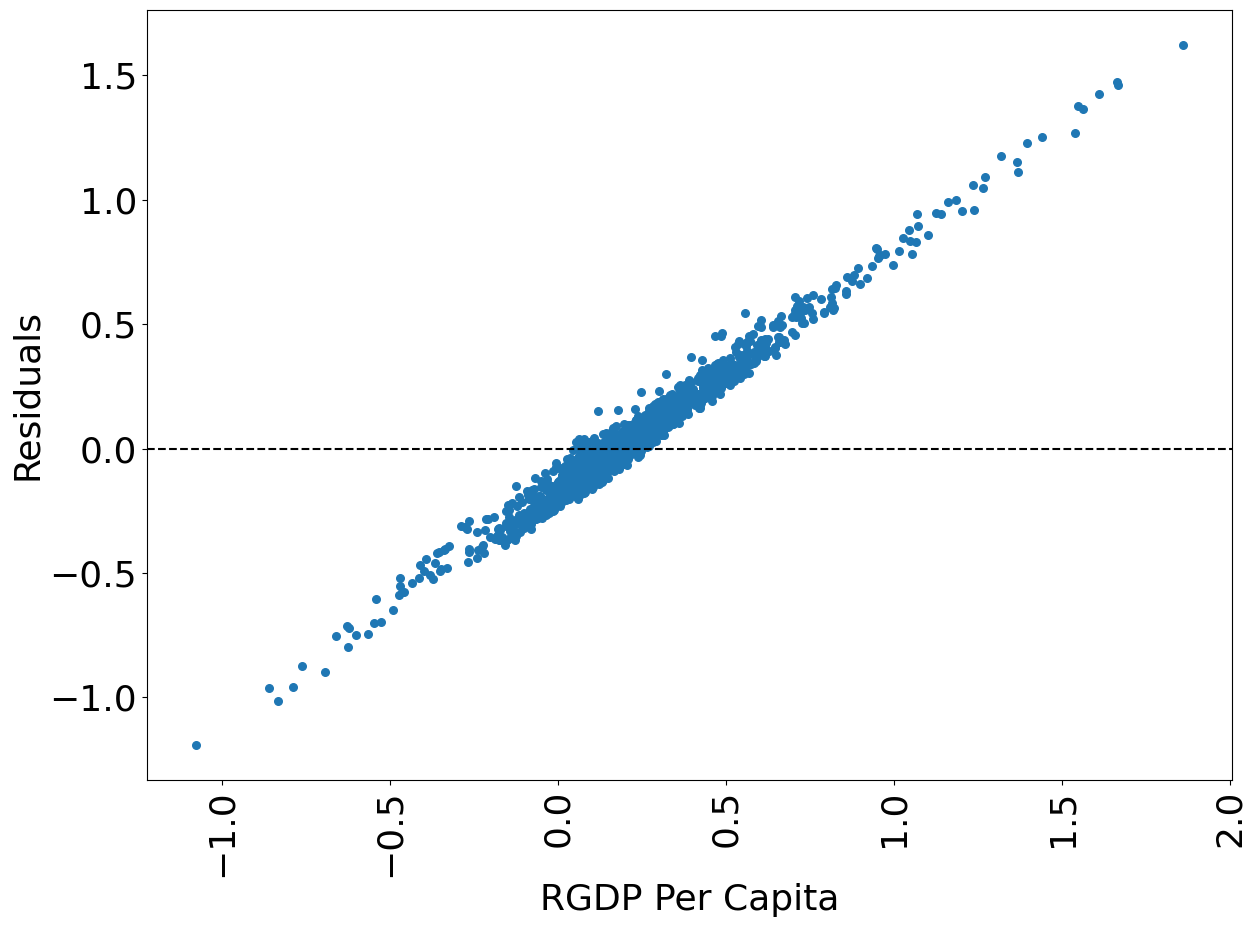

In [35]:
fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [36]:
countries = r_df.groupby("ISO_Code_3").mean().index
plot_data = r_df[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\1481061595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita  Predictor
ISO_Code_3 Year                            
AGO        2010         1.706954   1.148006
           2011         1.557050   1.137822
           2012         1.349627   1.147311
           2013         1.232391   1.131221
           2014         1.201867   1.108953
...                          ...        ...
ZWE        2014         1.215452   1.166507
           2015         1.106888   1.160253
           2016         1.012463   1.141484
           2017         0.986421   1.076040
           2018         1.004606   1.146728

[2386 rows x 2 columns]

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\799958213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


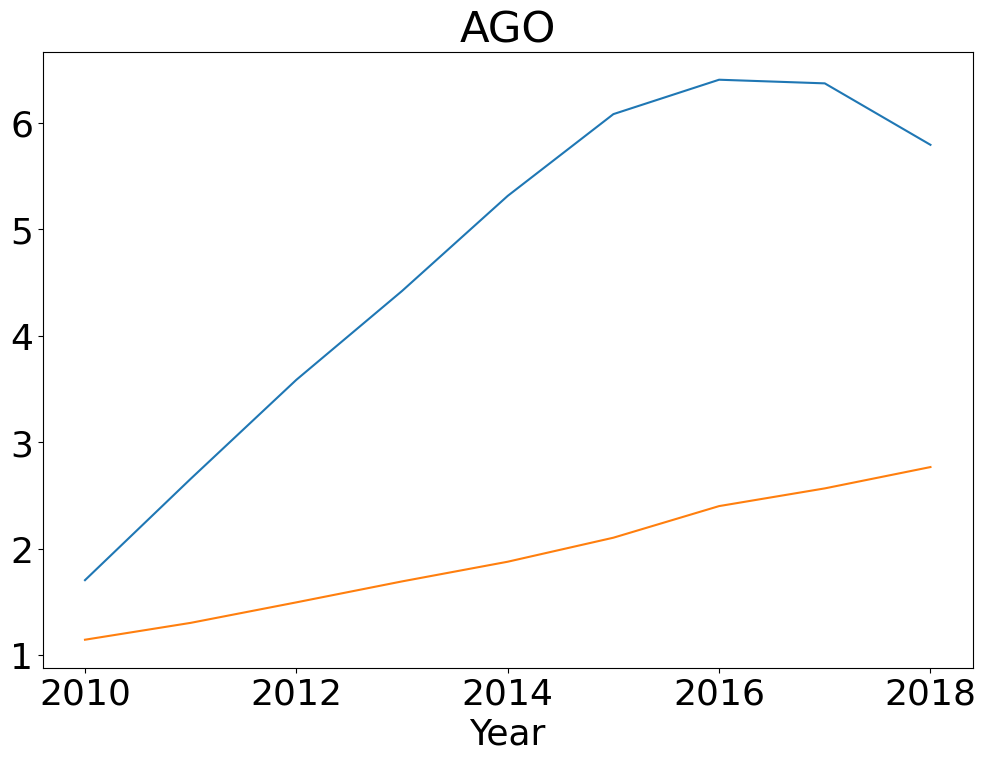

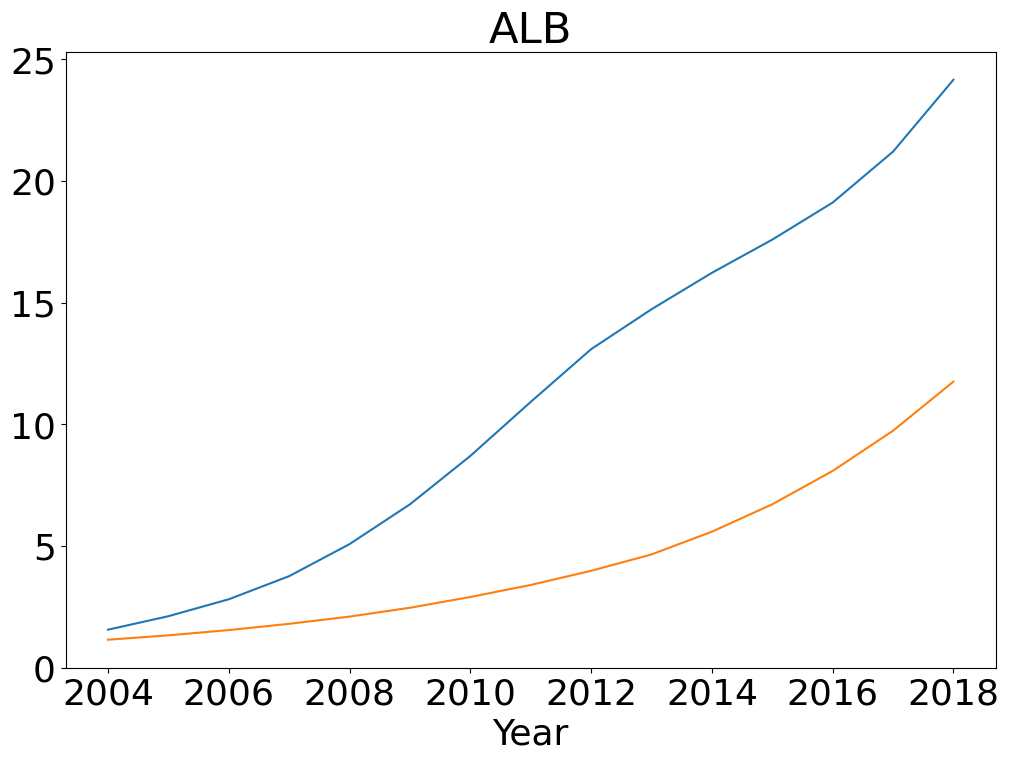

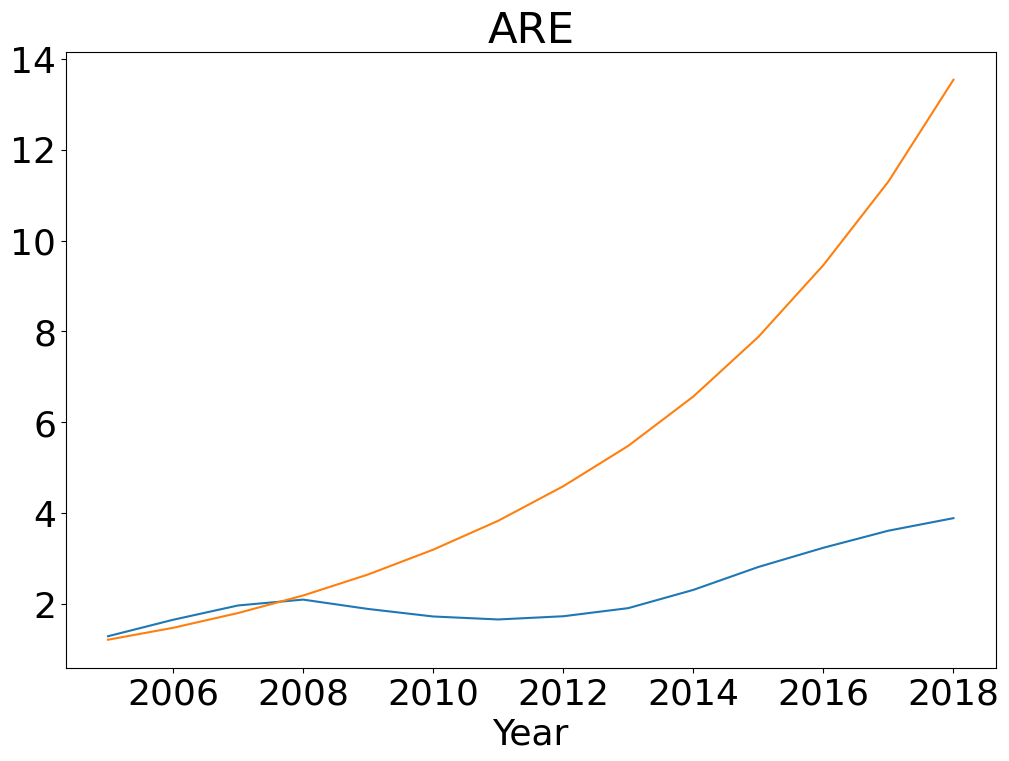

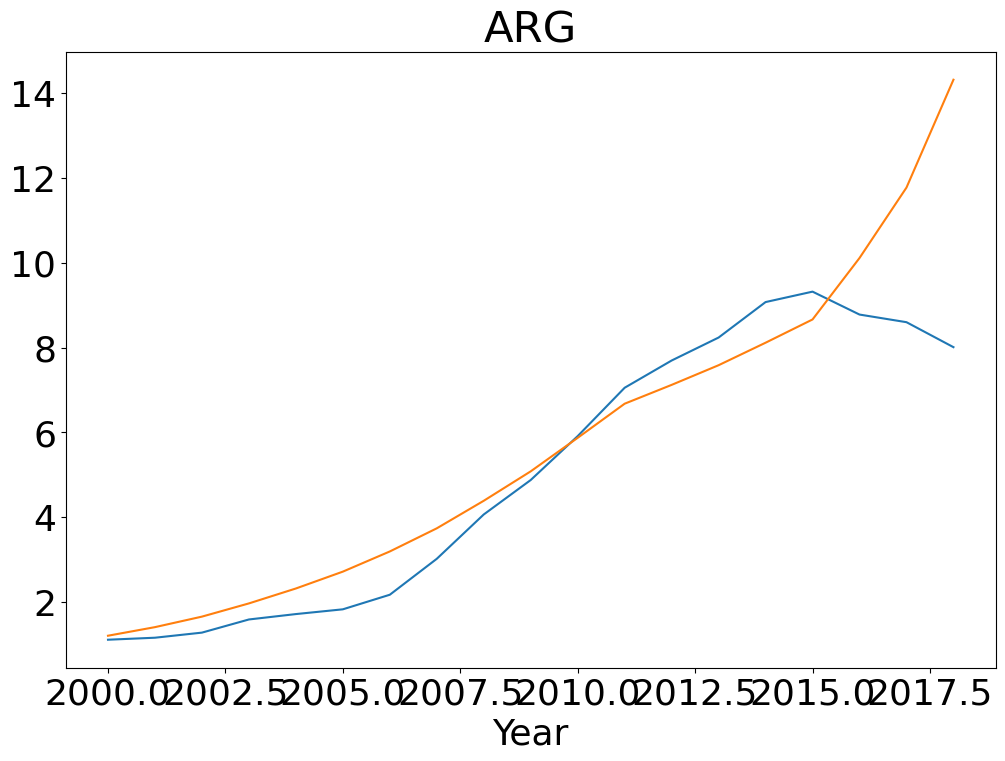

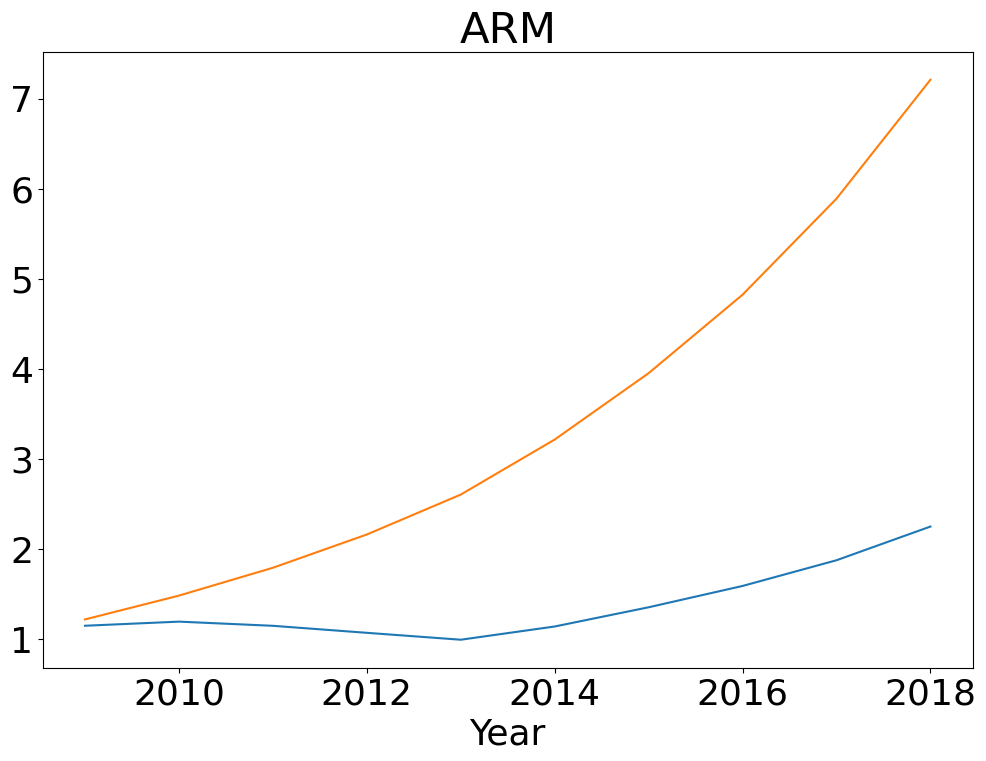

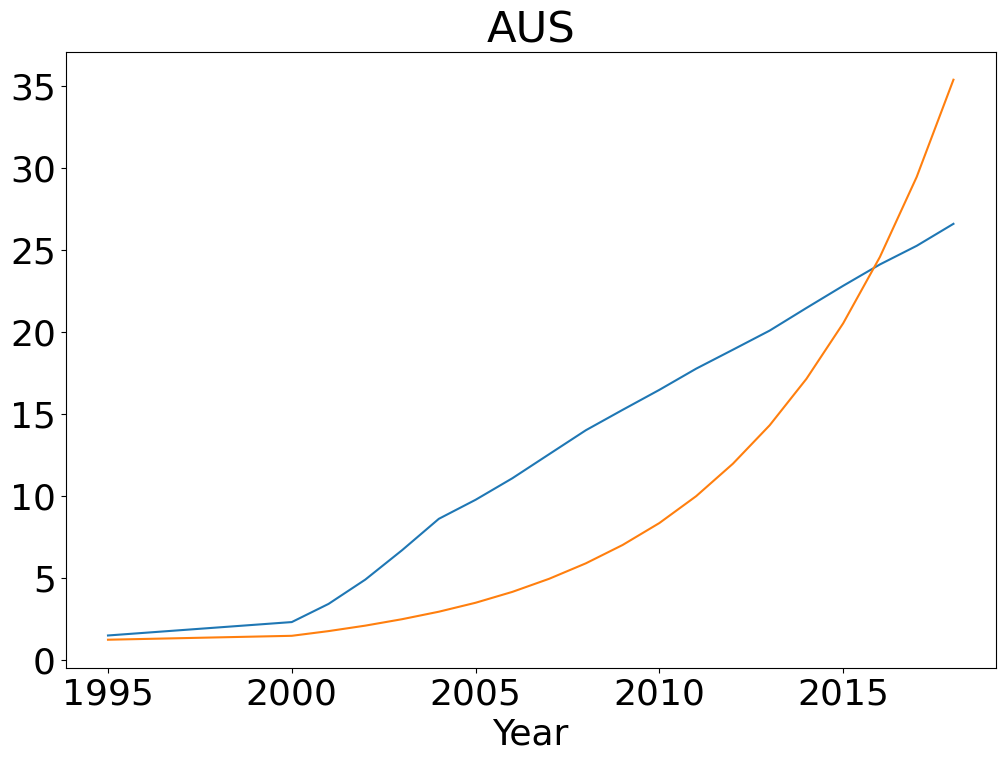

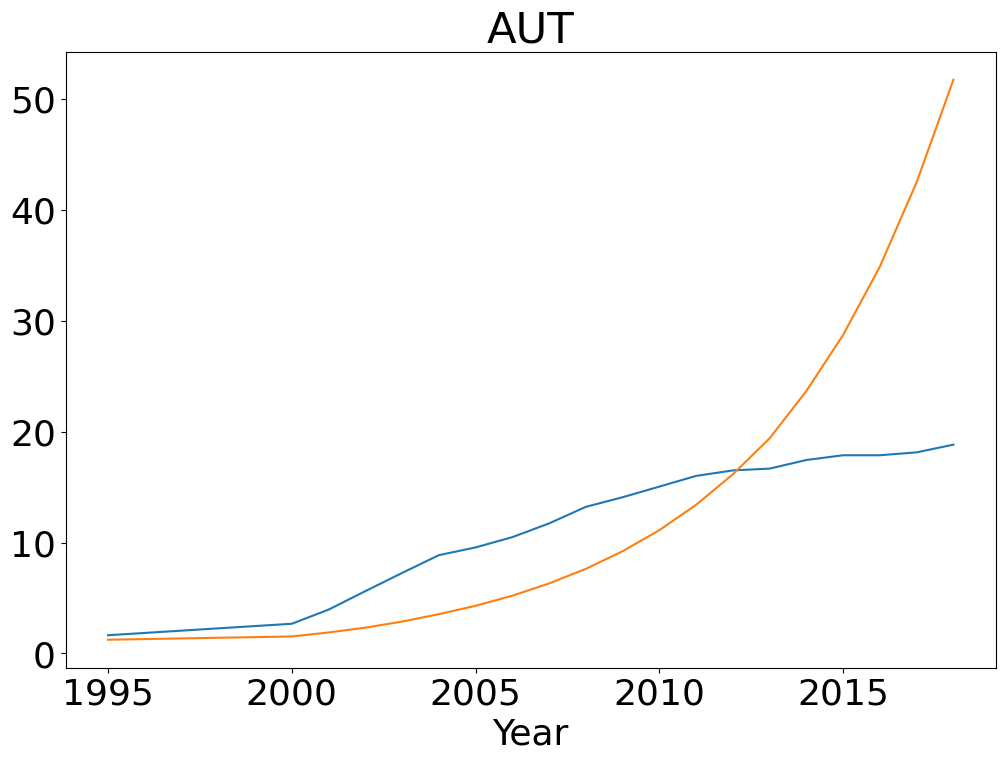

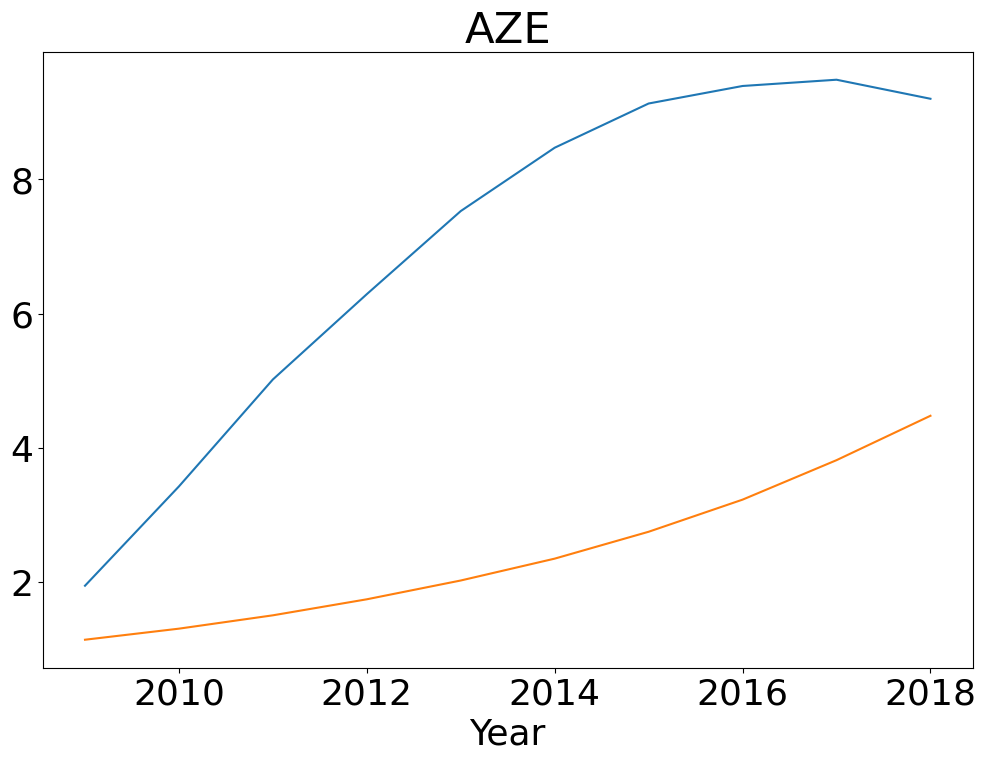

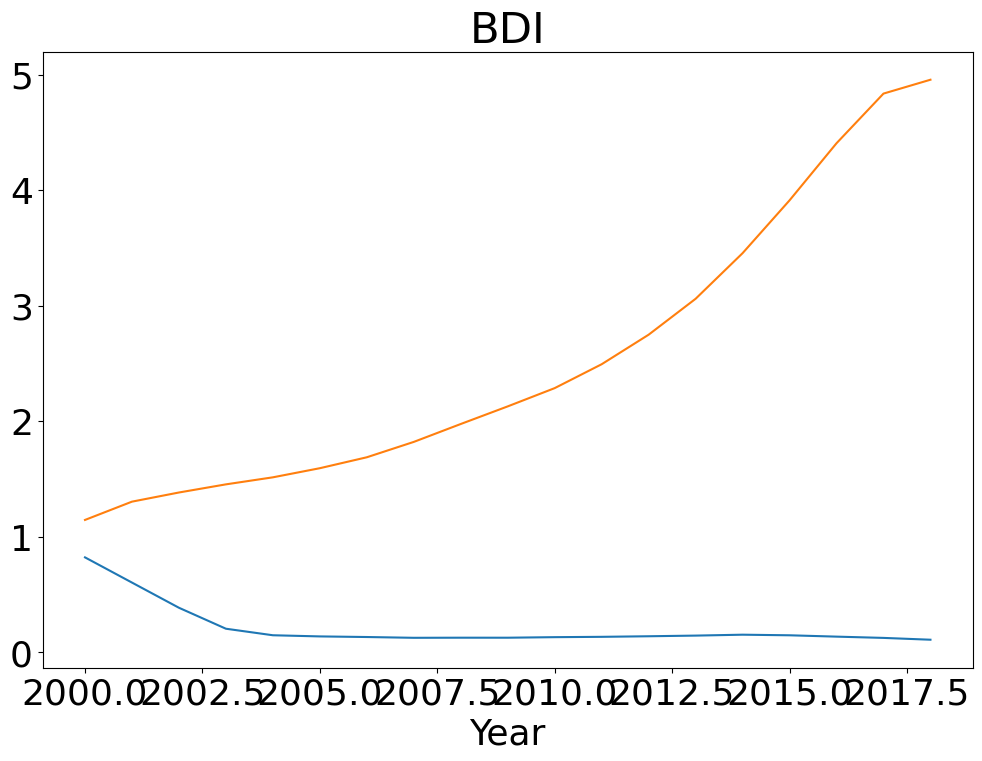

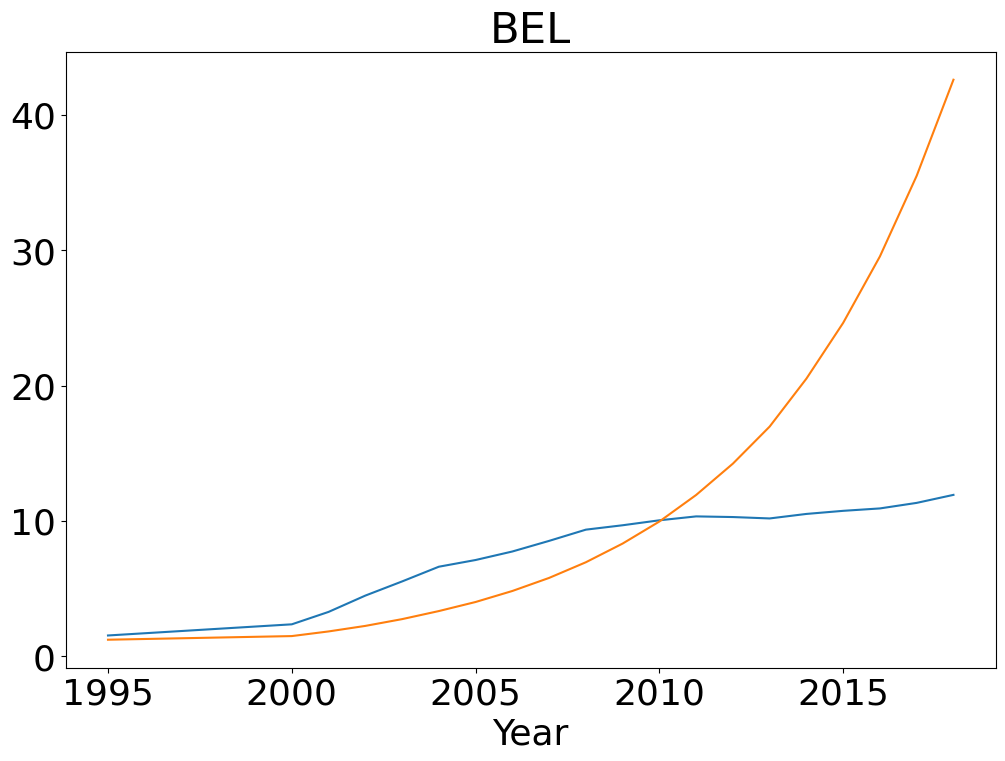

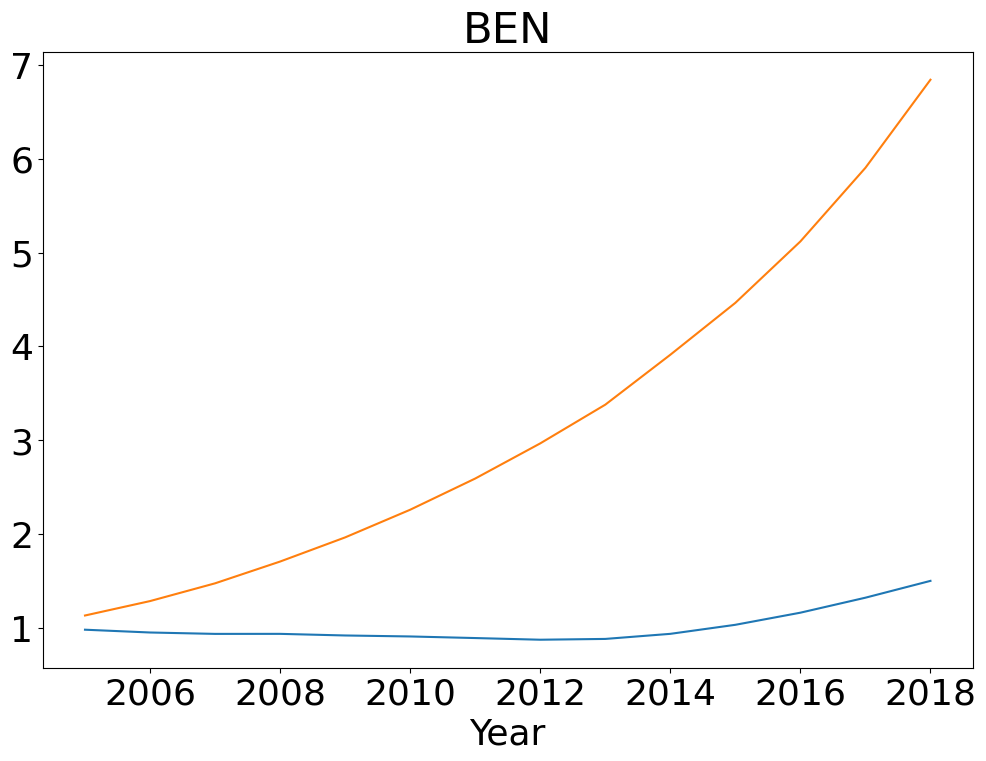

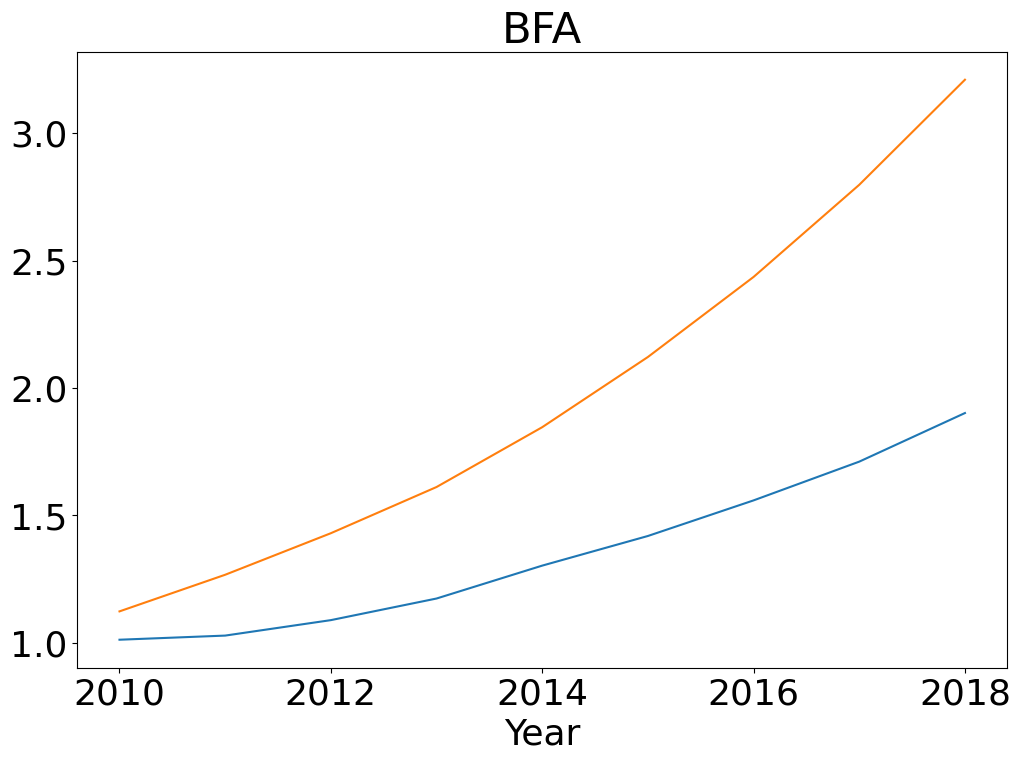

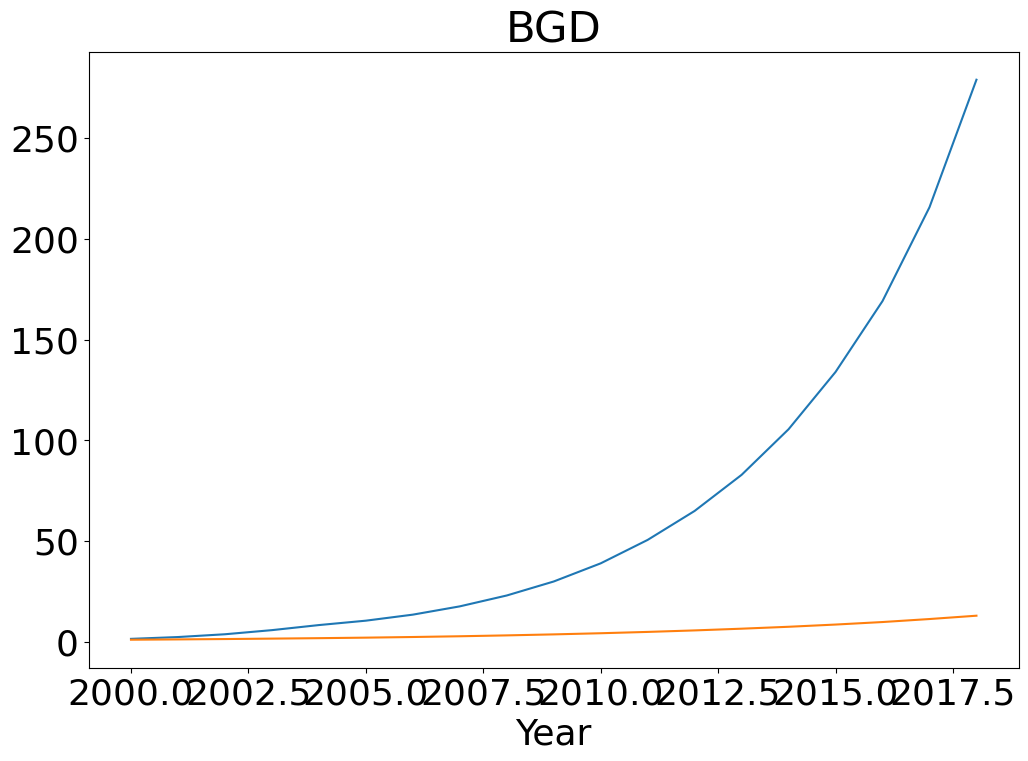

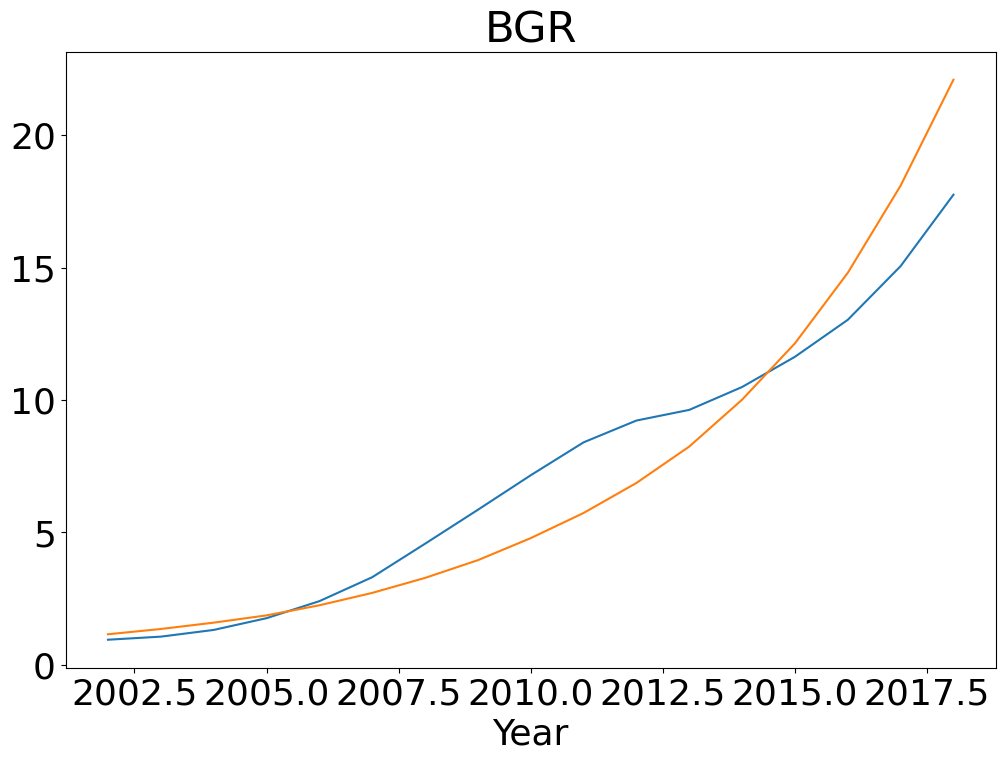

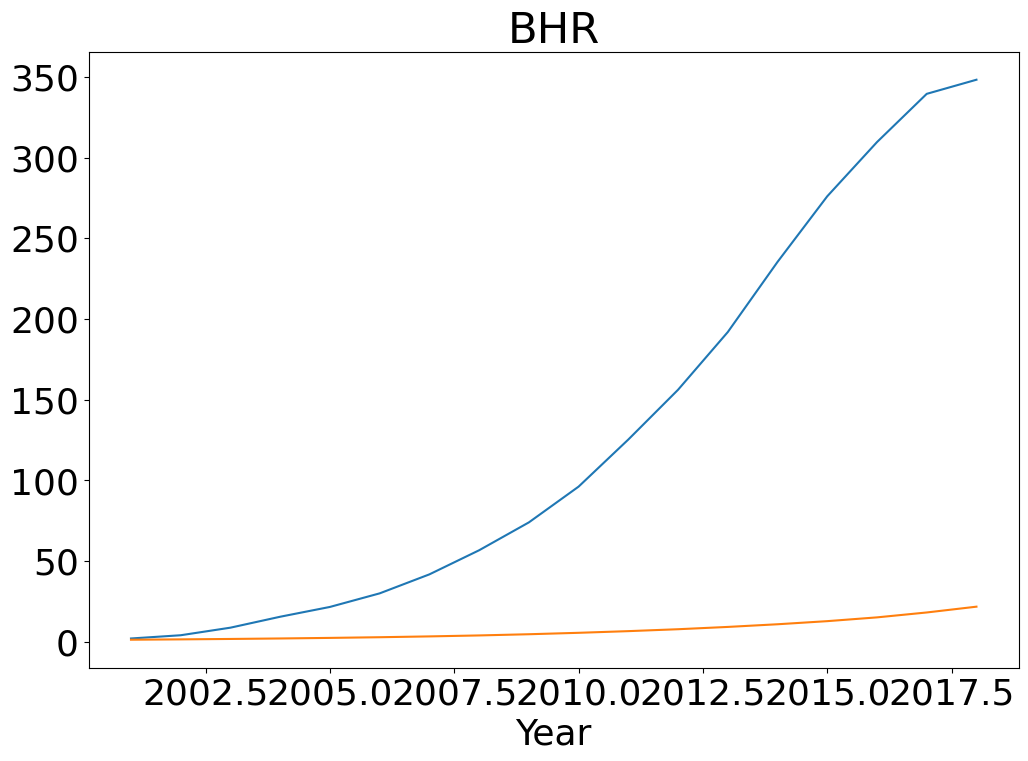

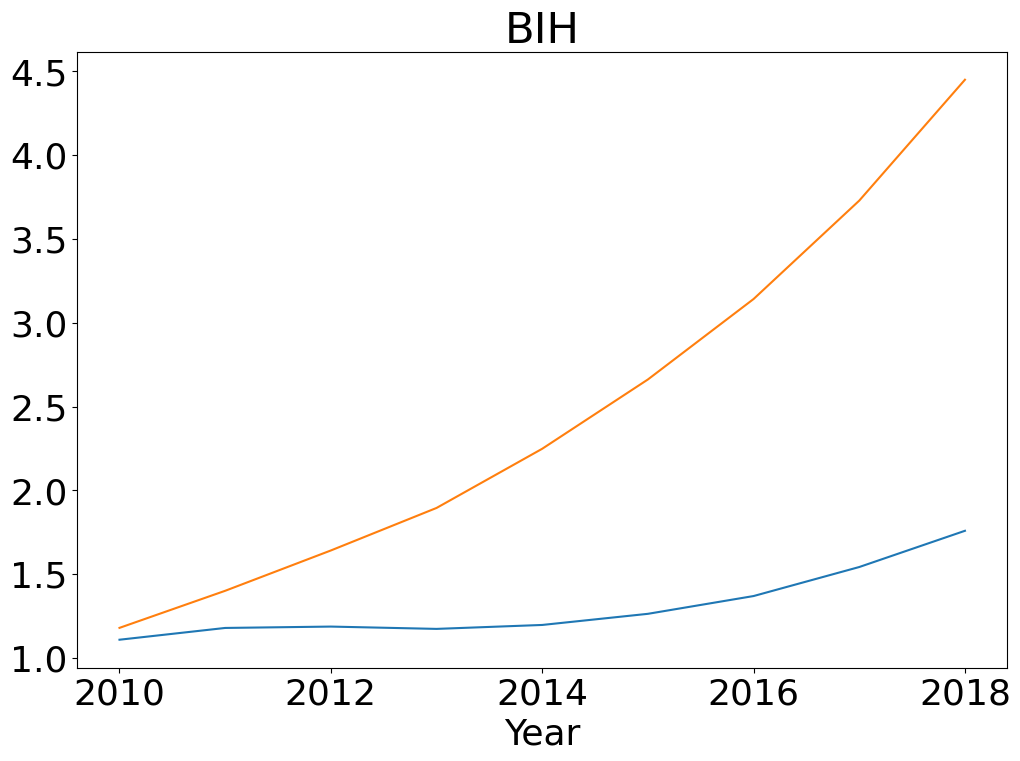

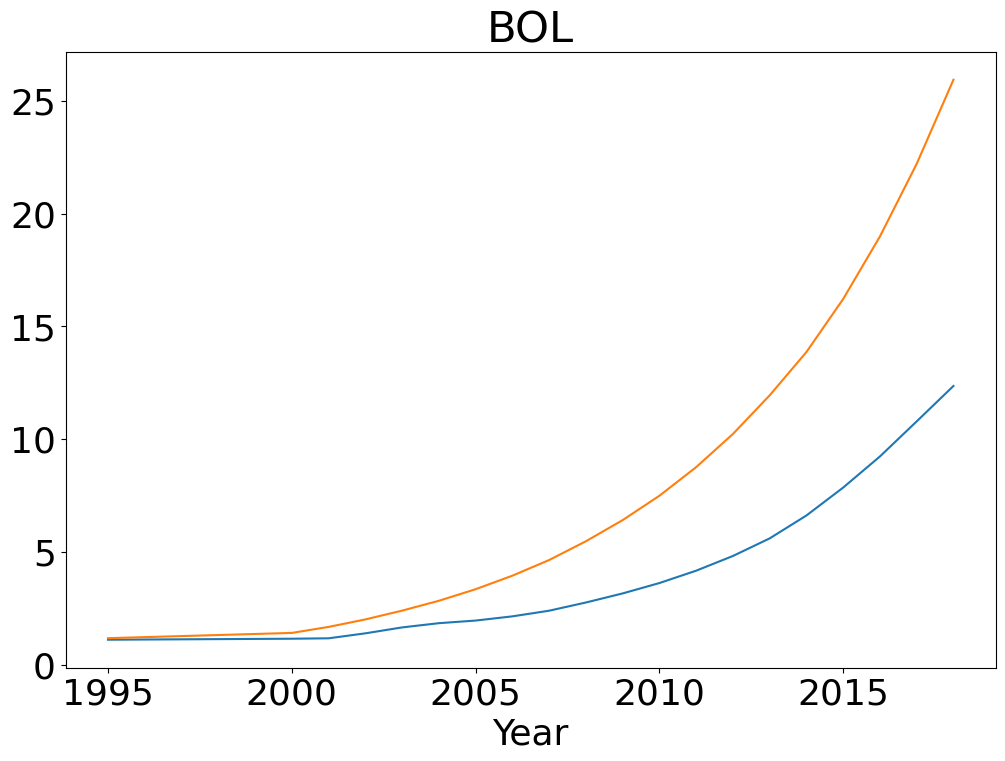

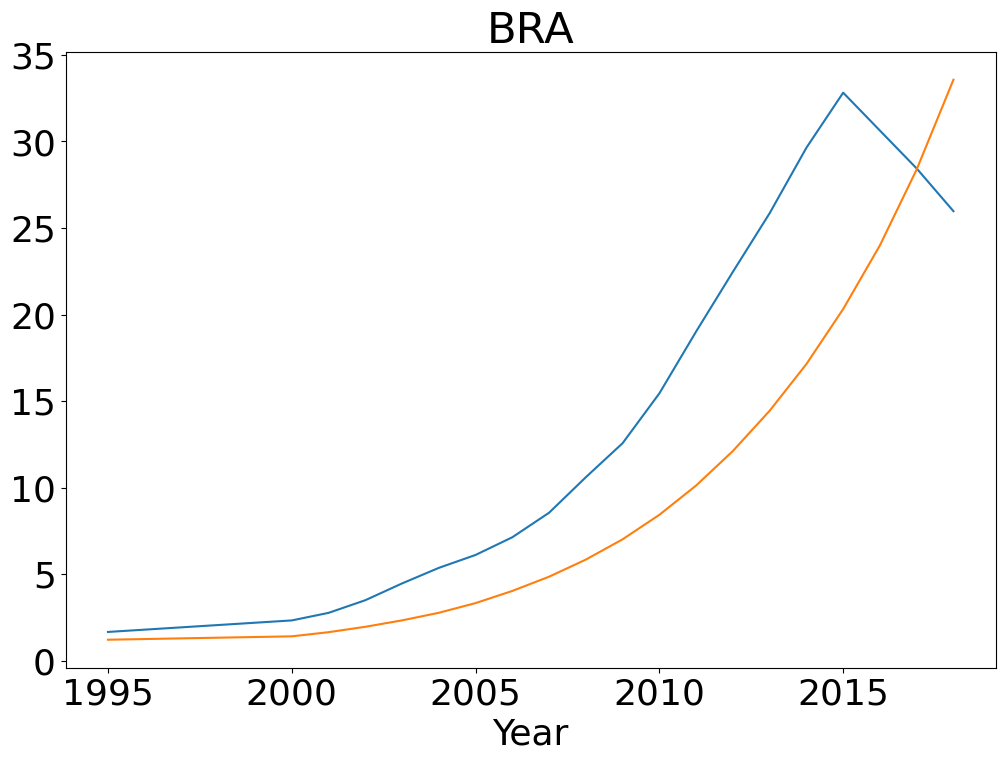

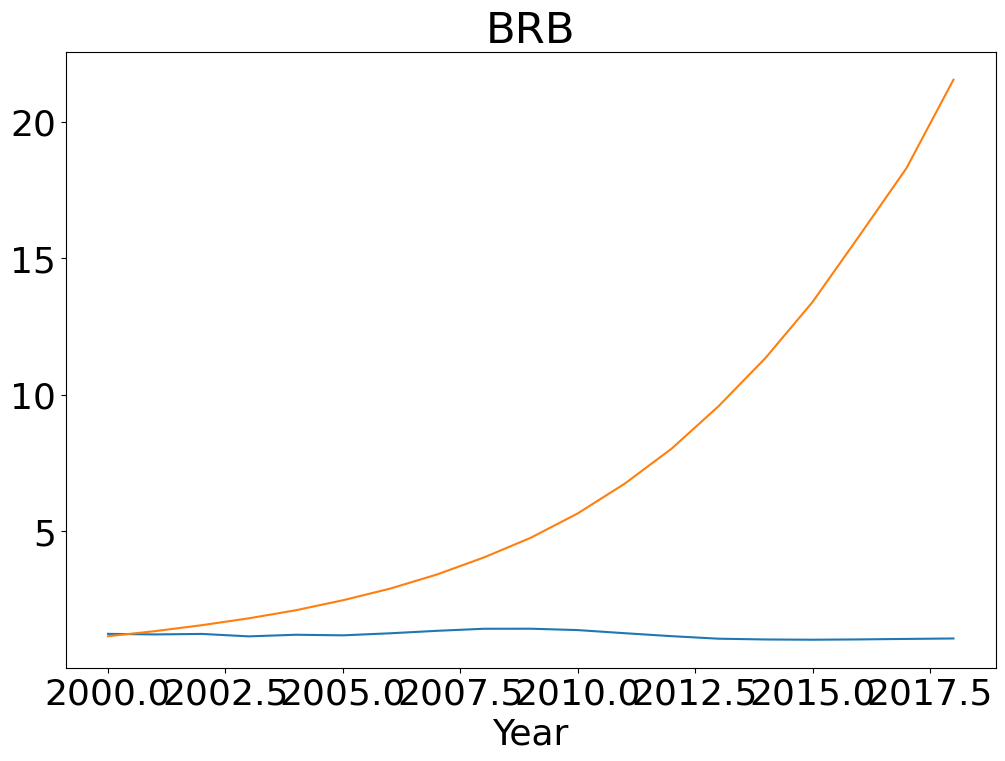

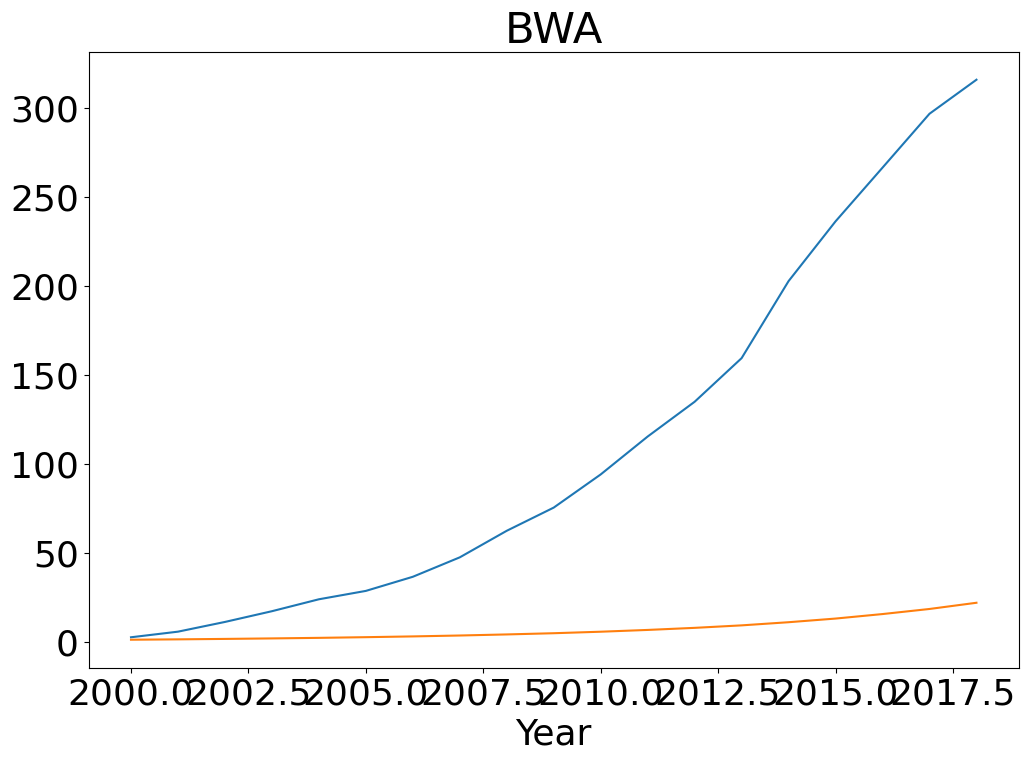

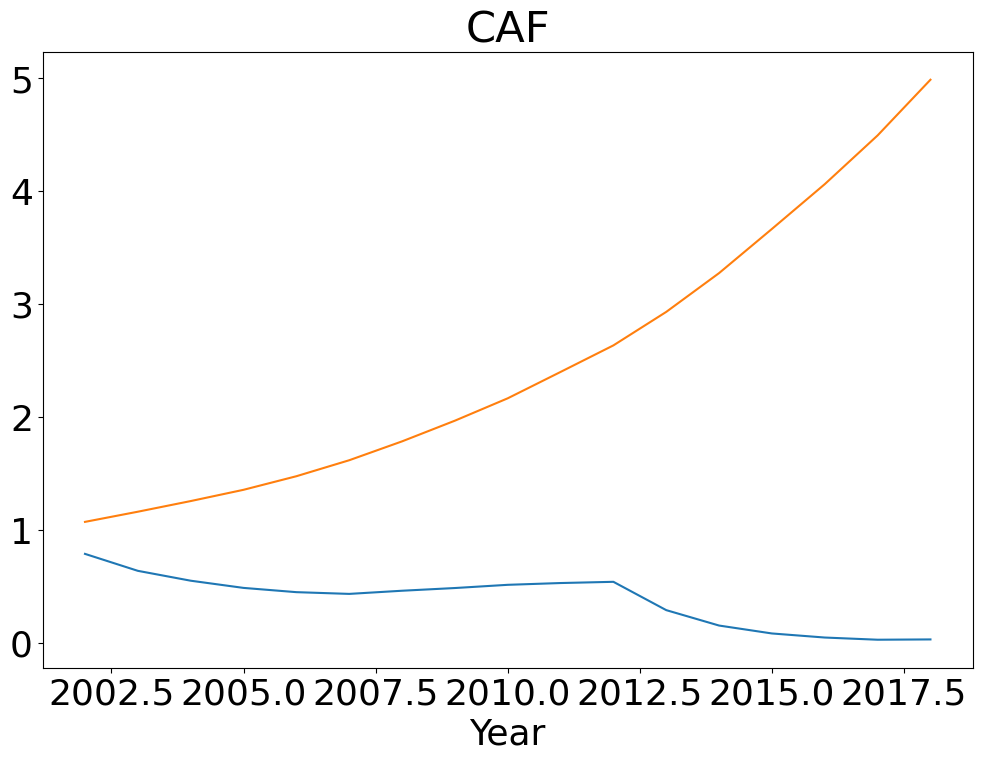

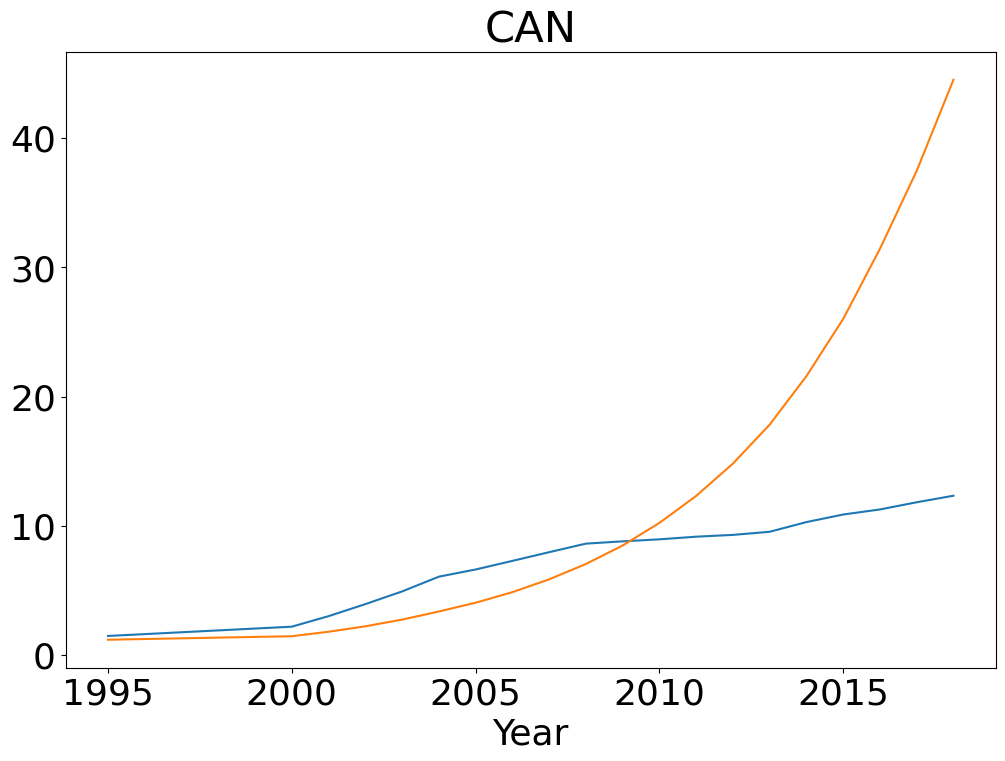

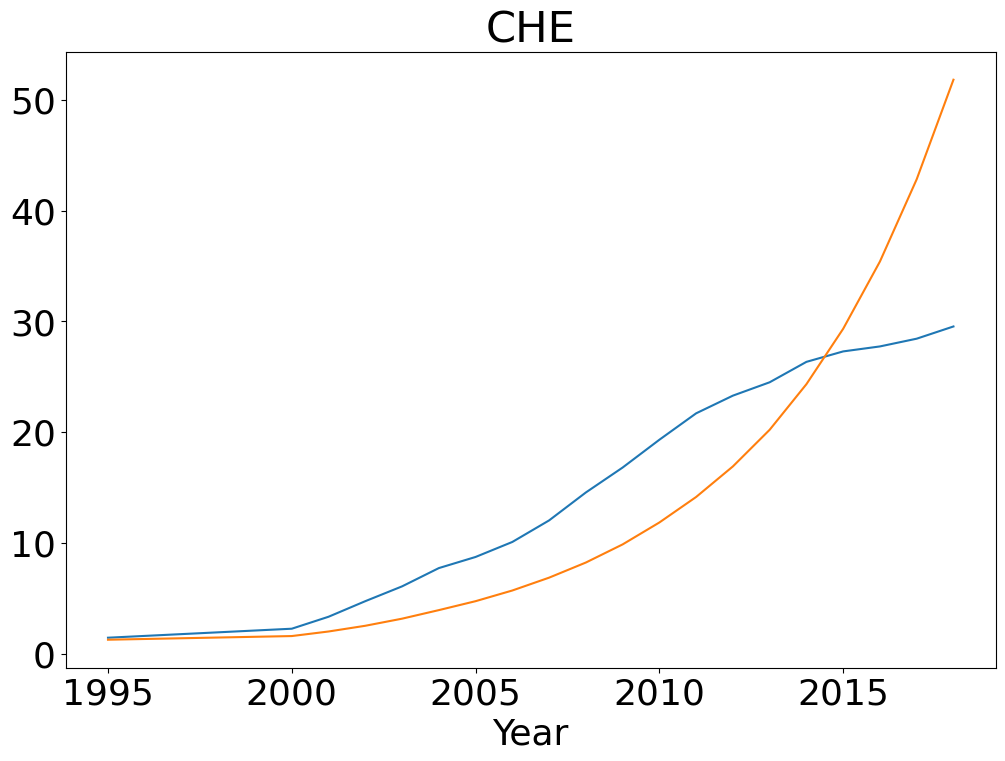

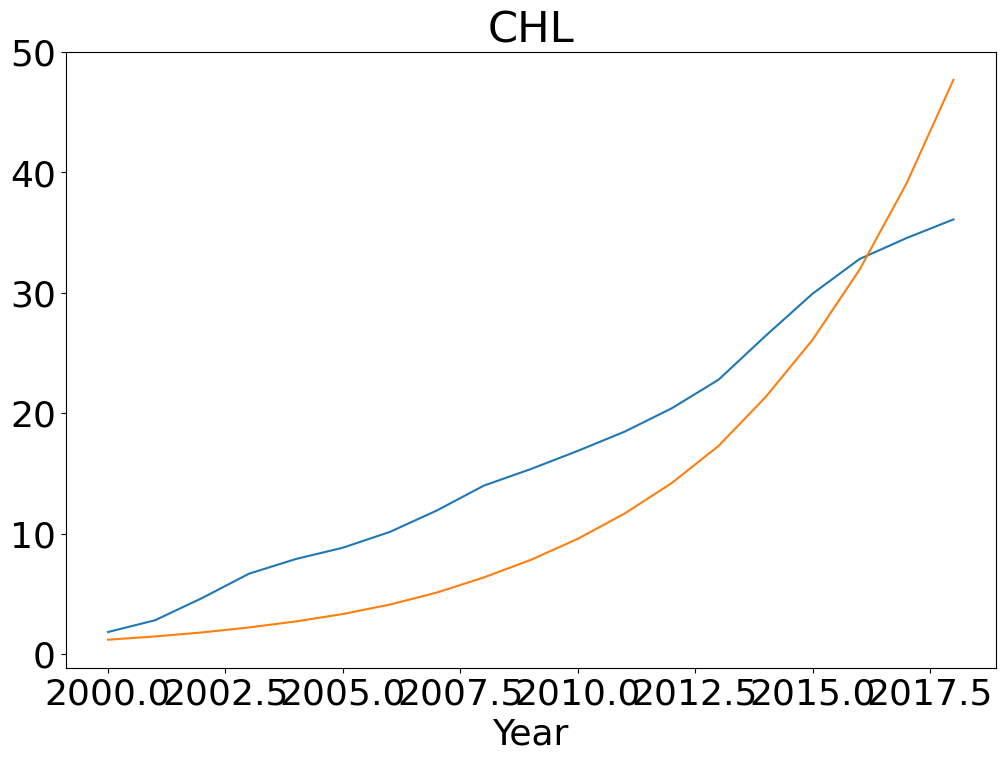

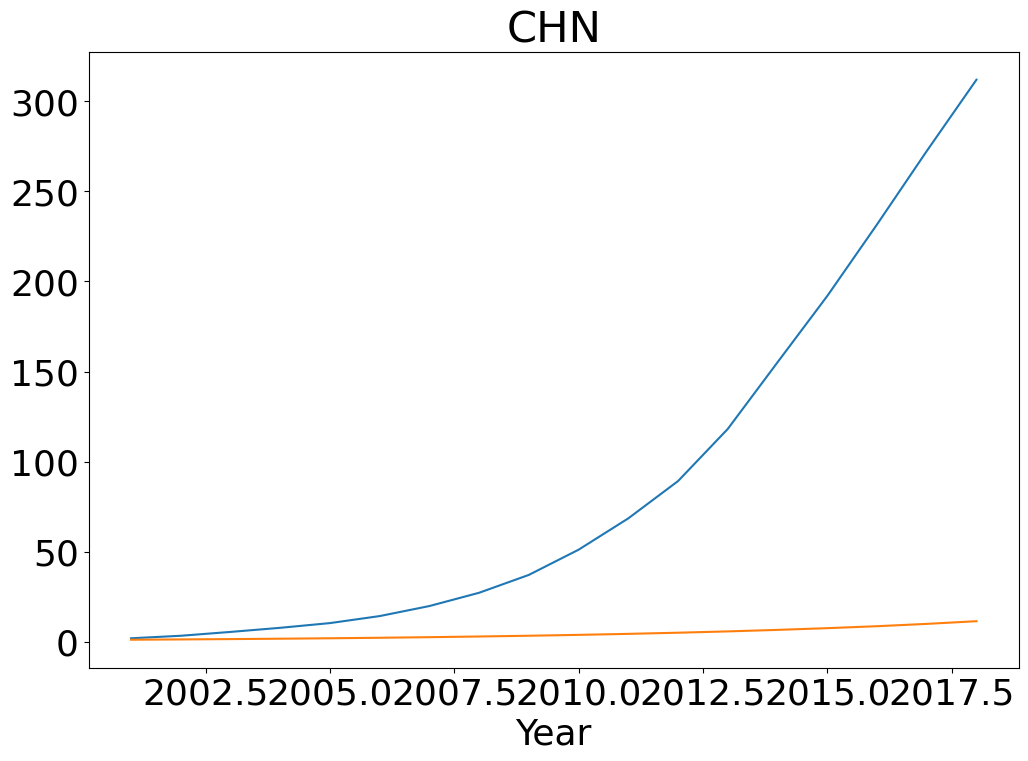

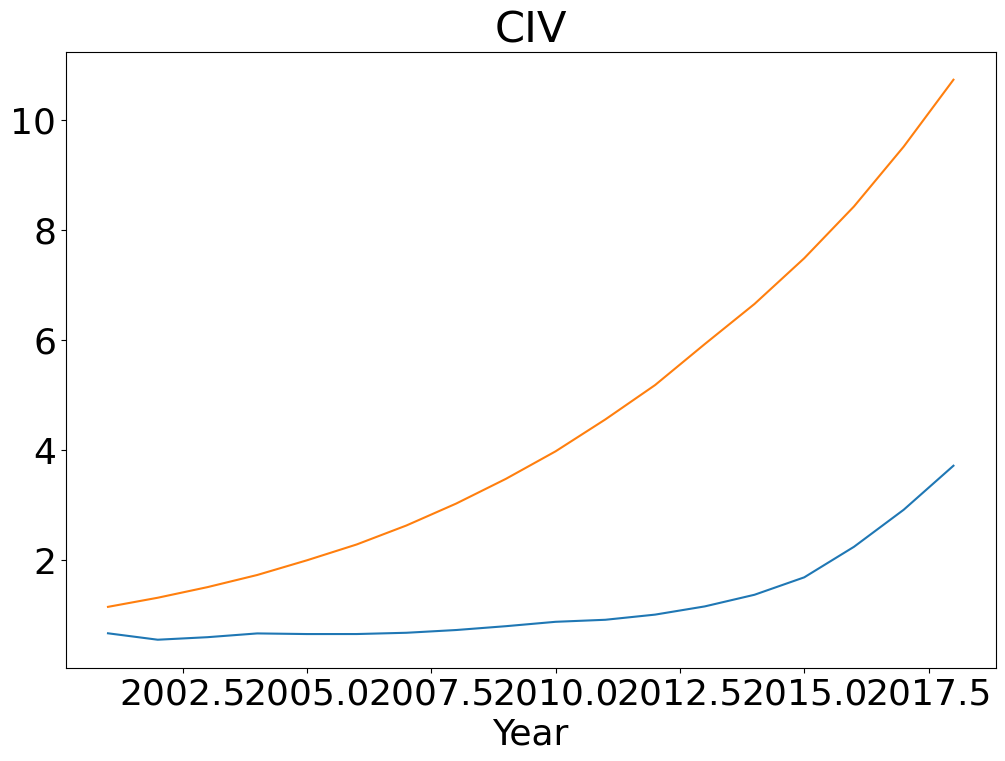

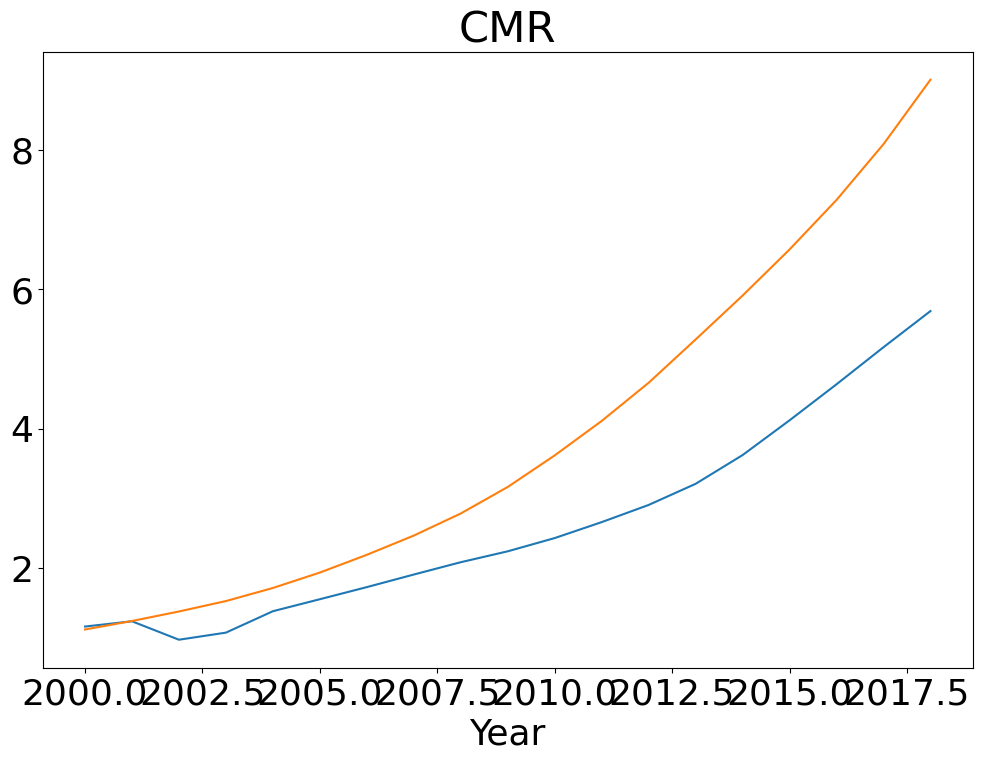

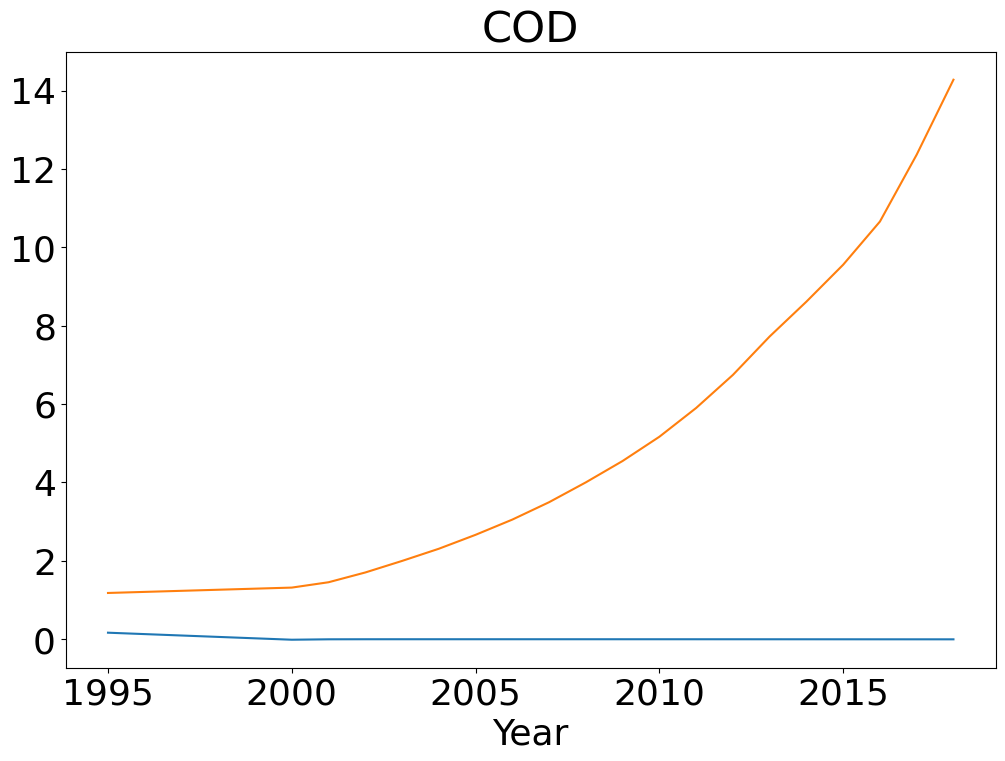

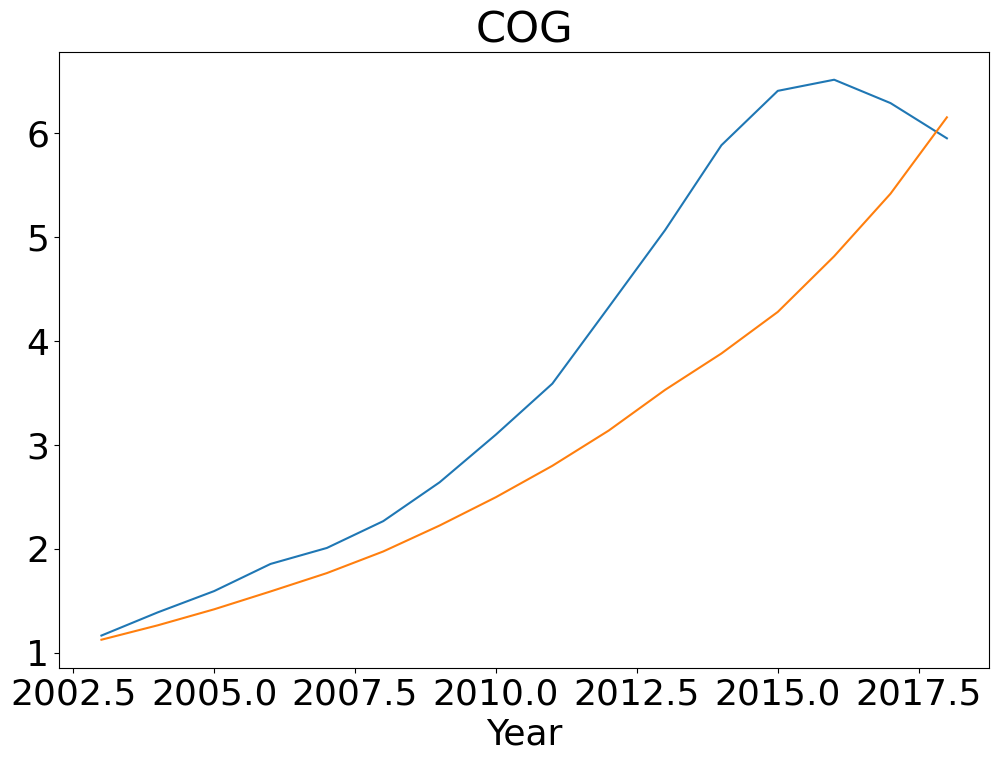

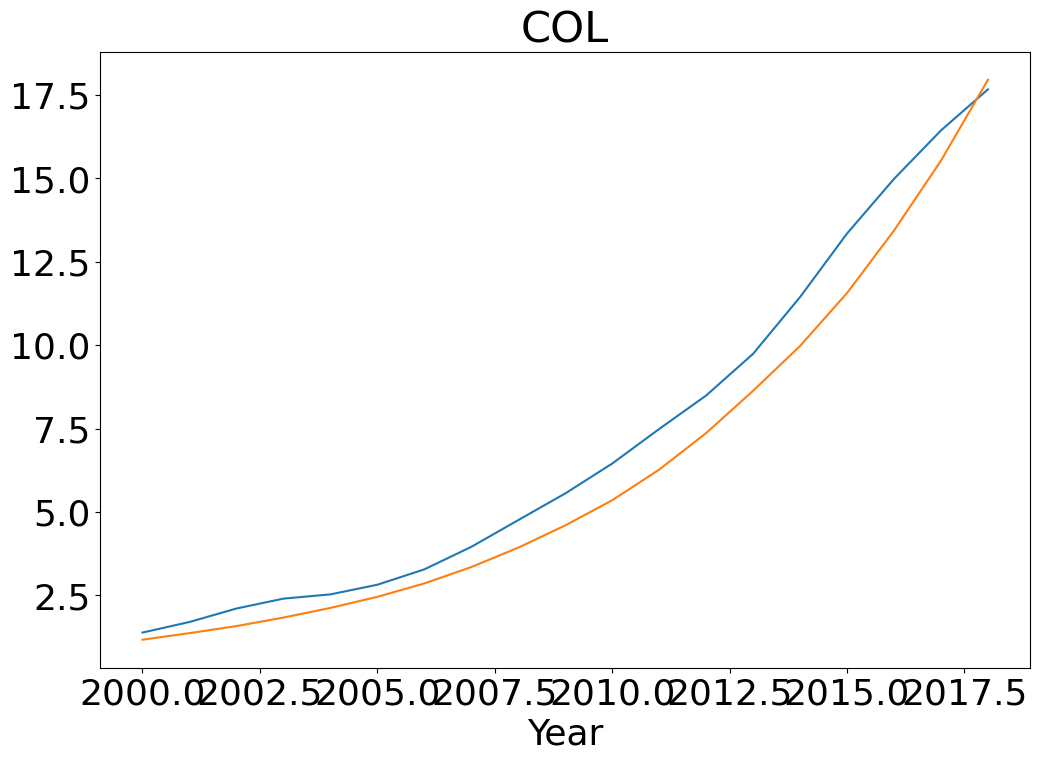

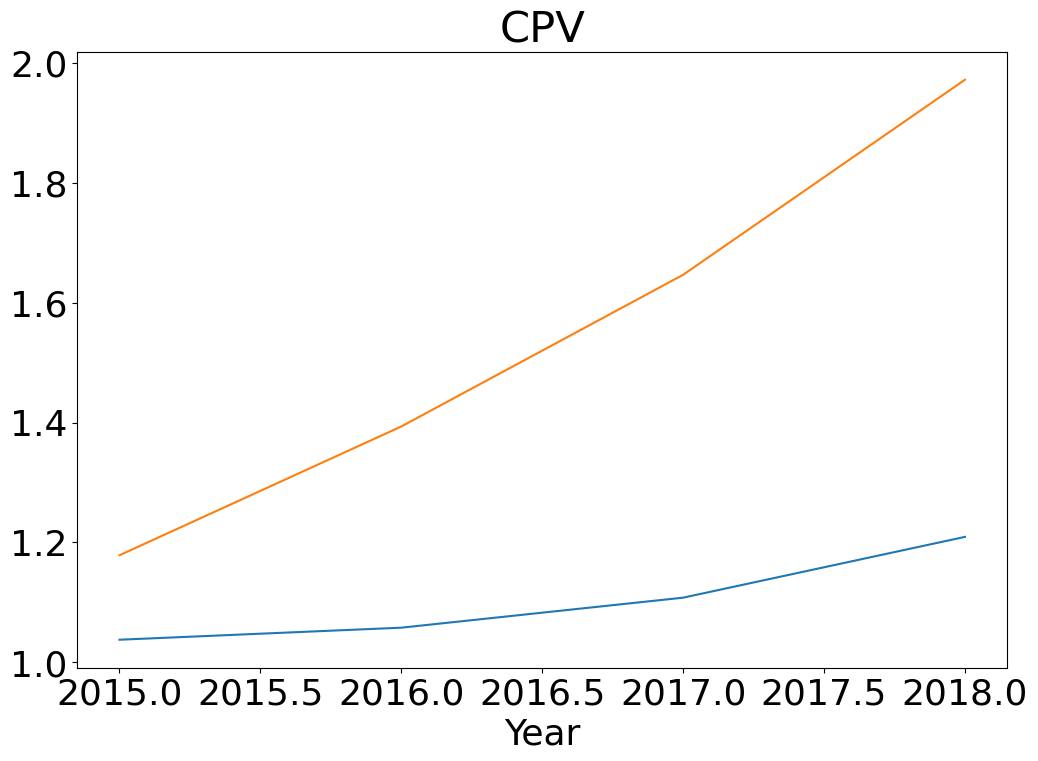

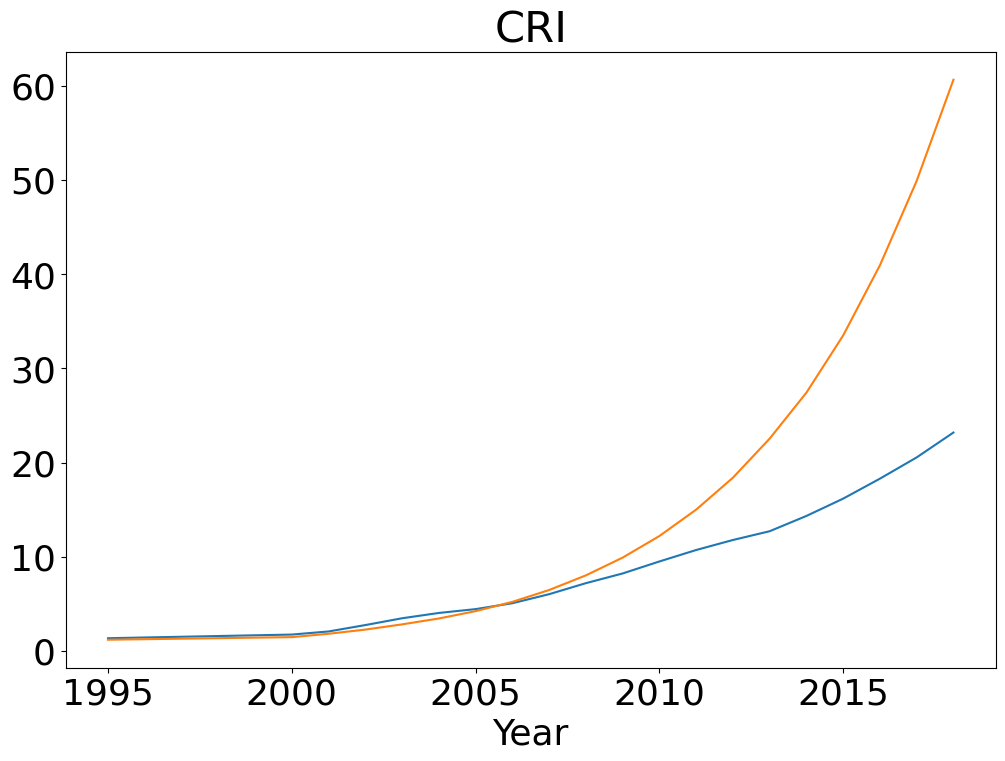

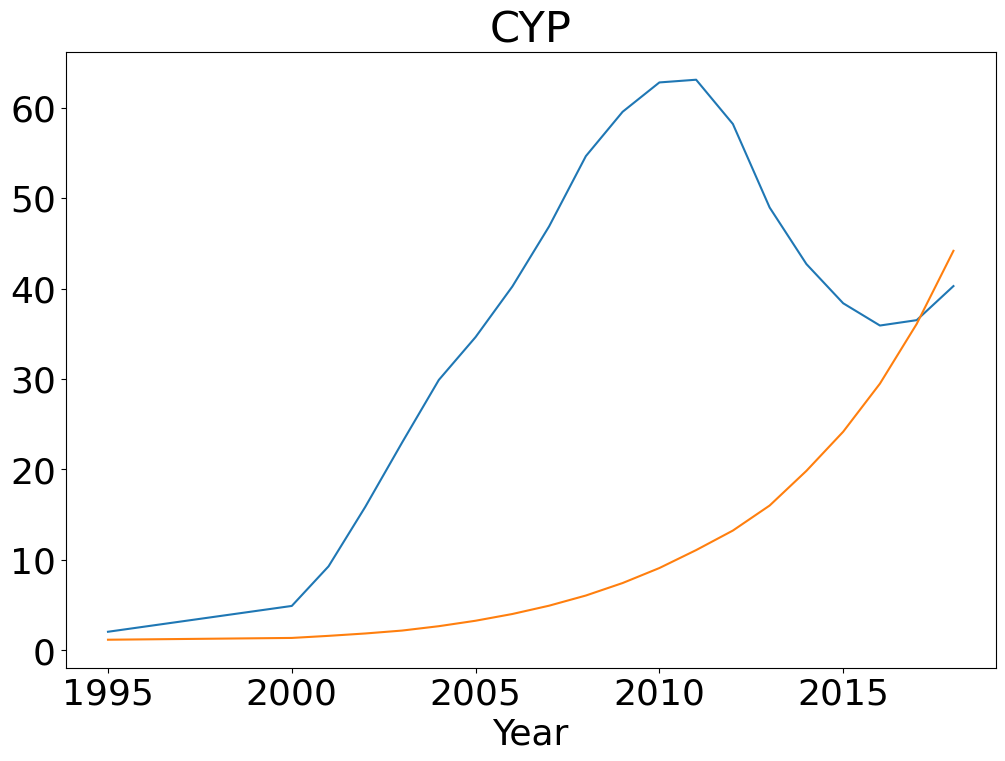

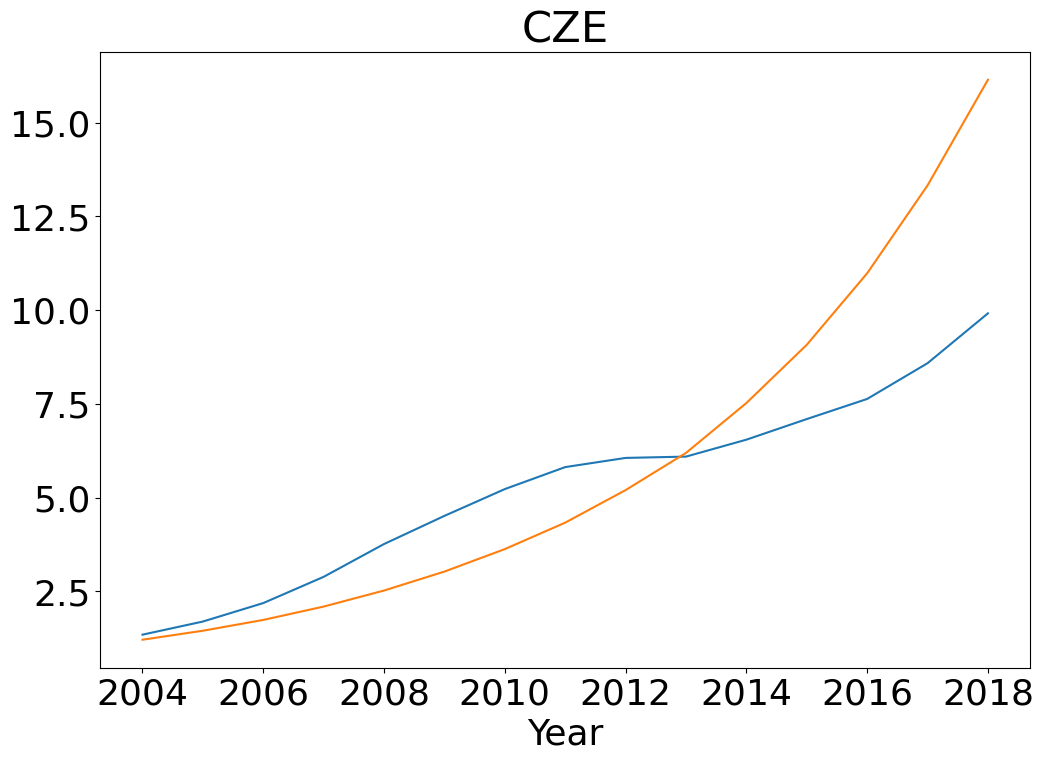

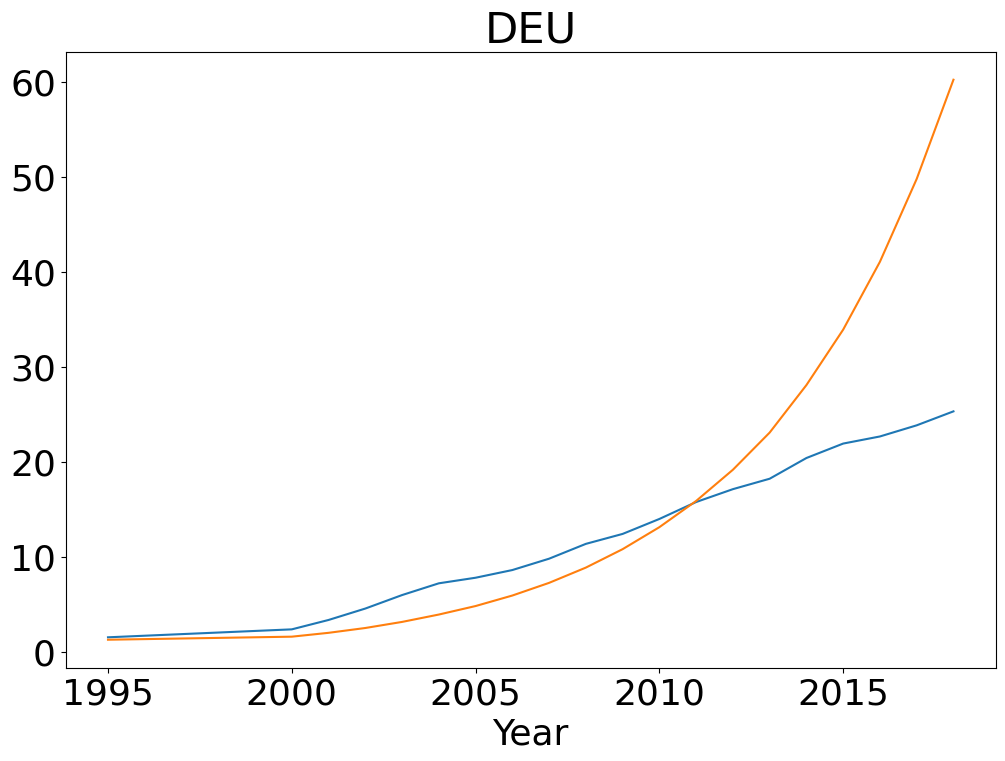

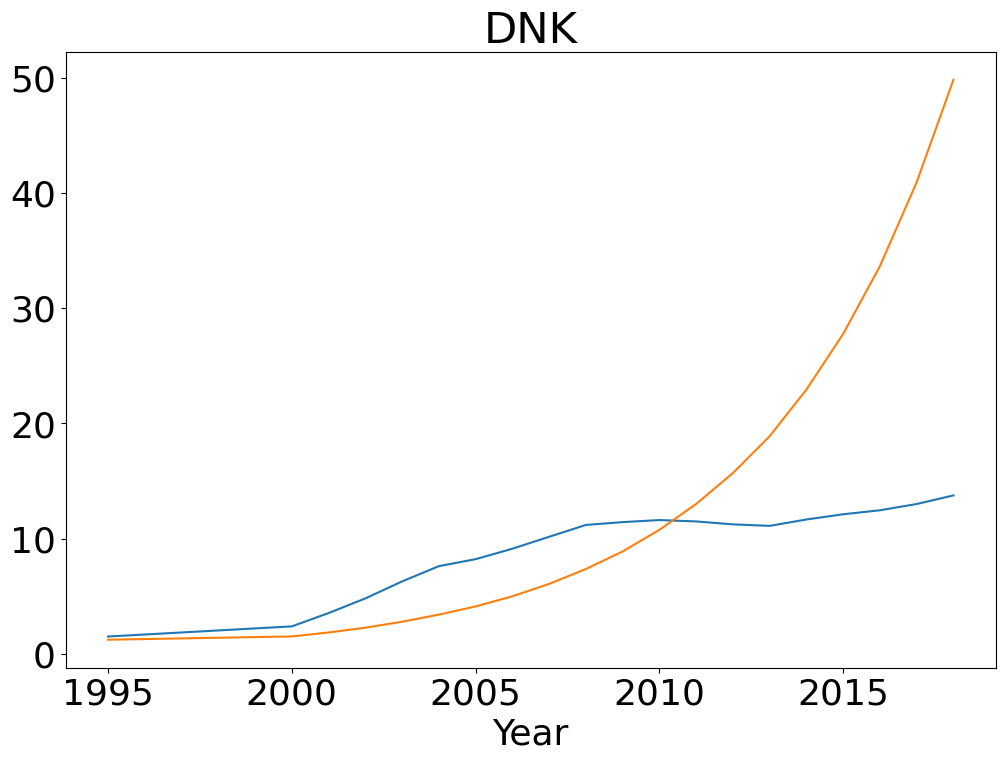

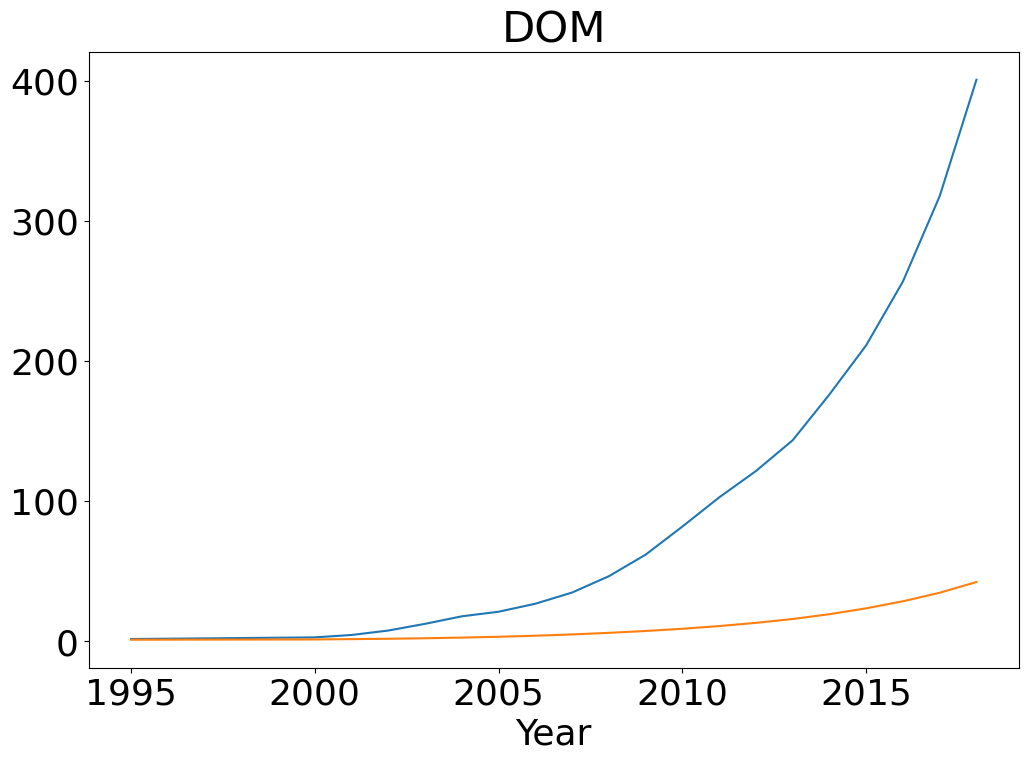

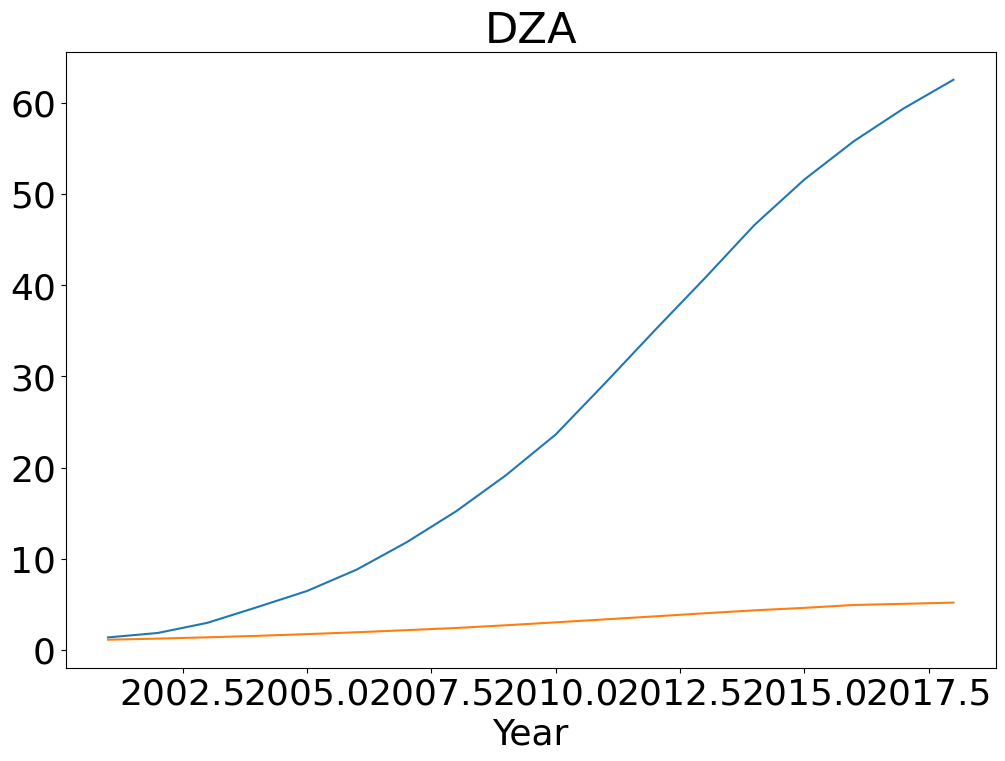

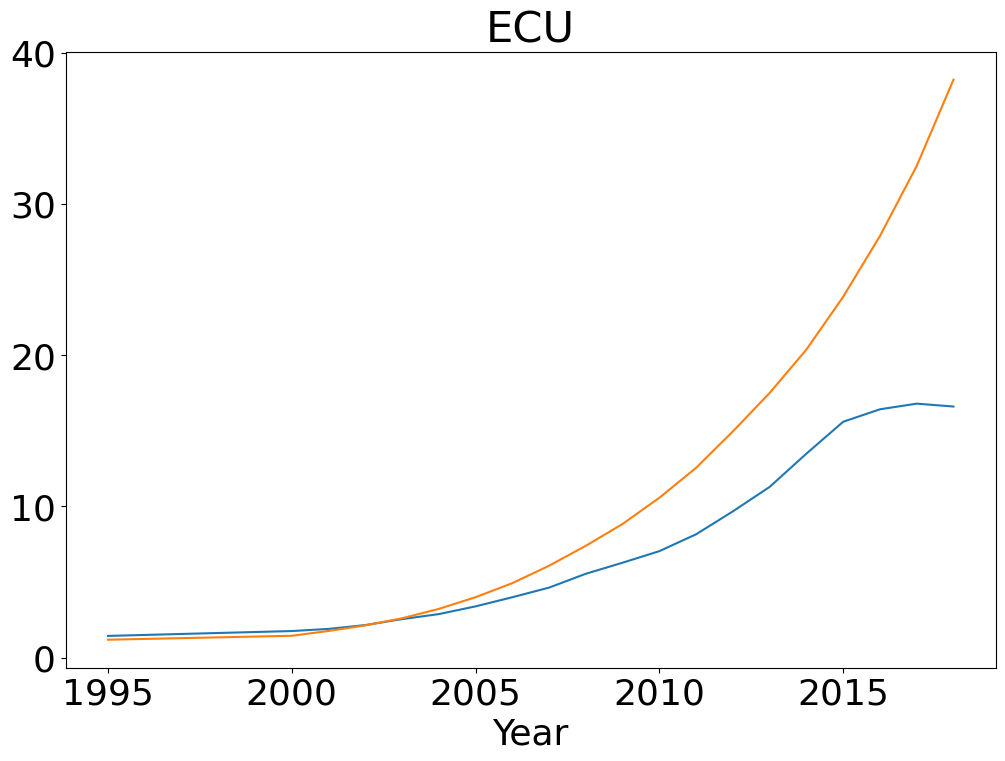

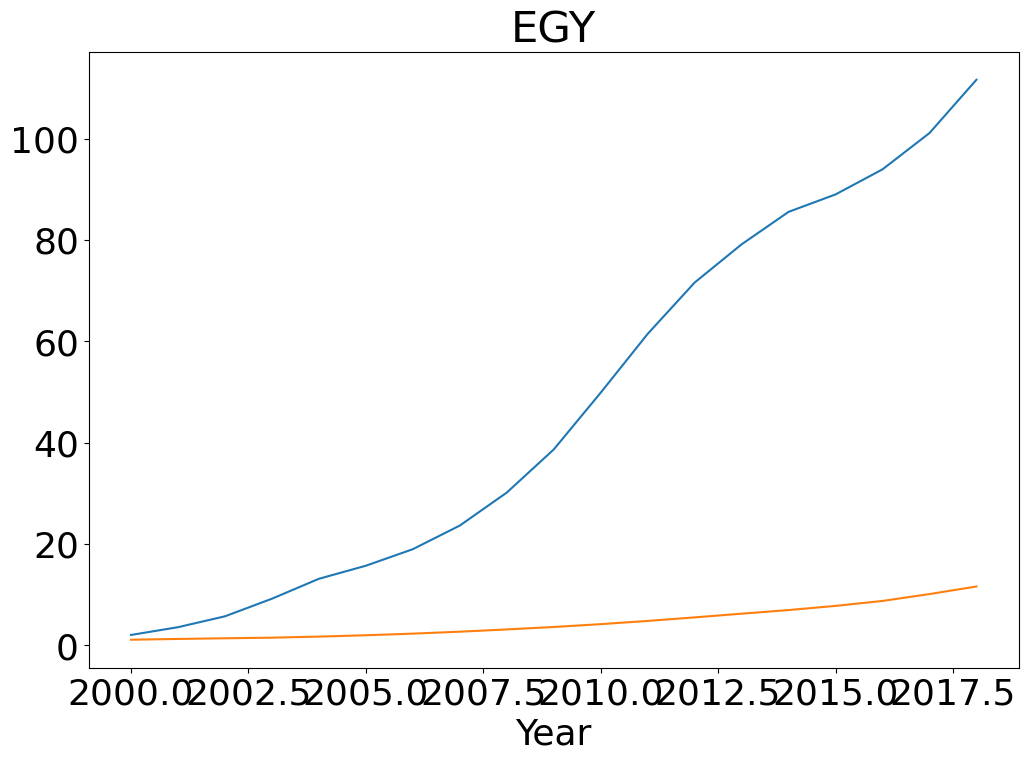

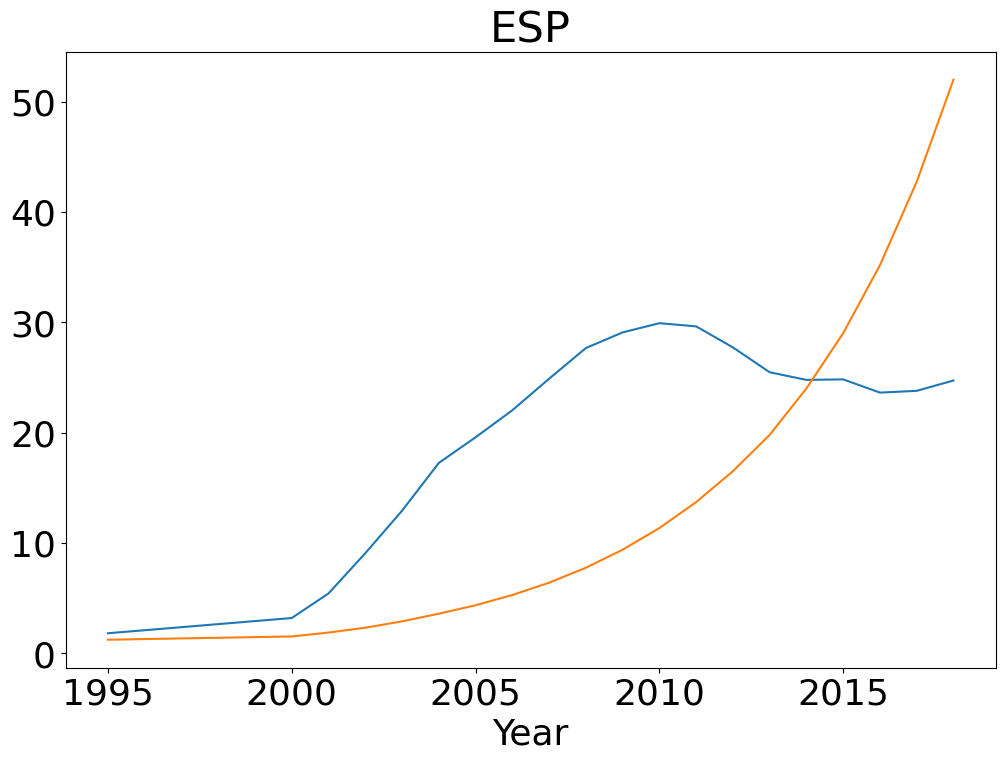

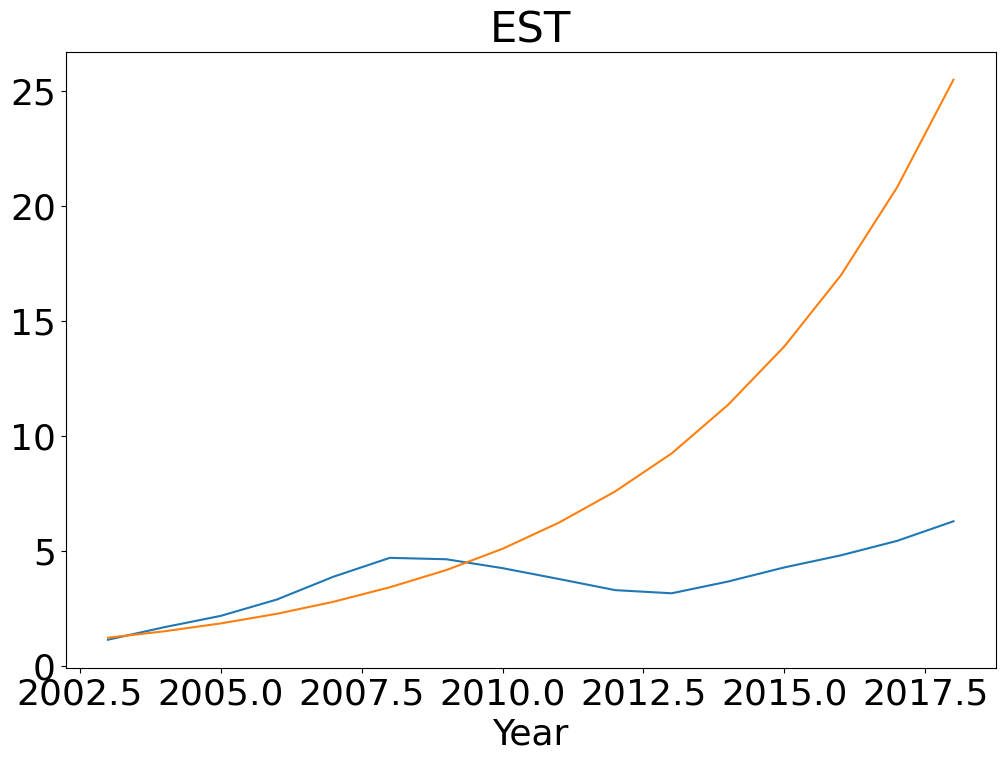

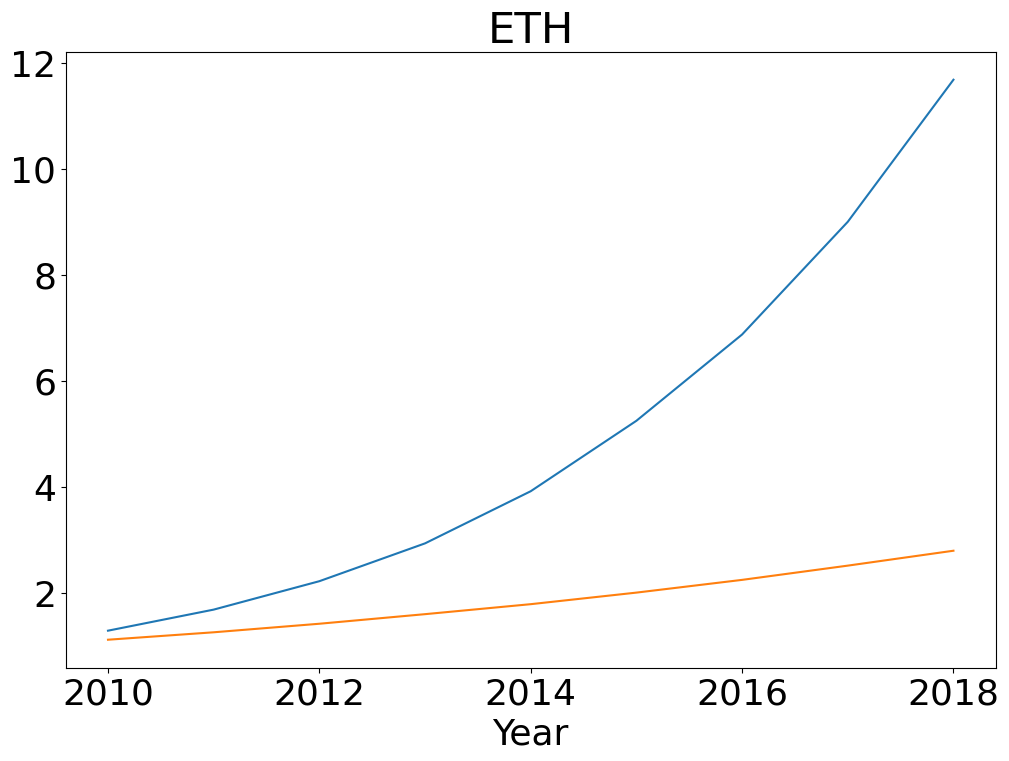

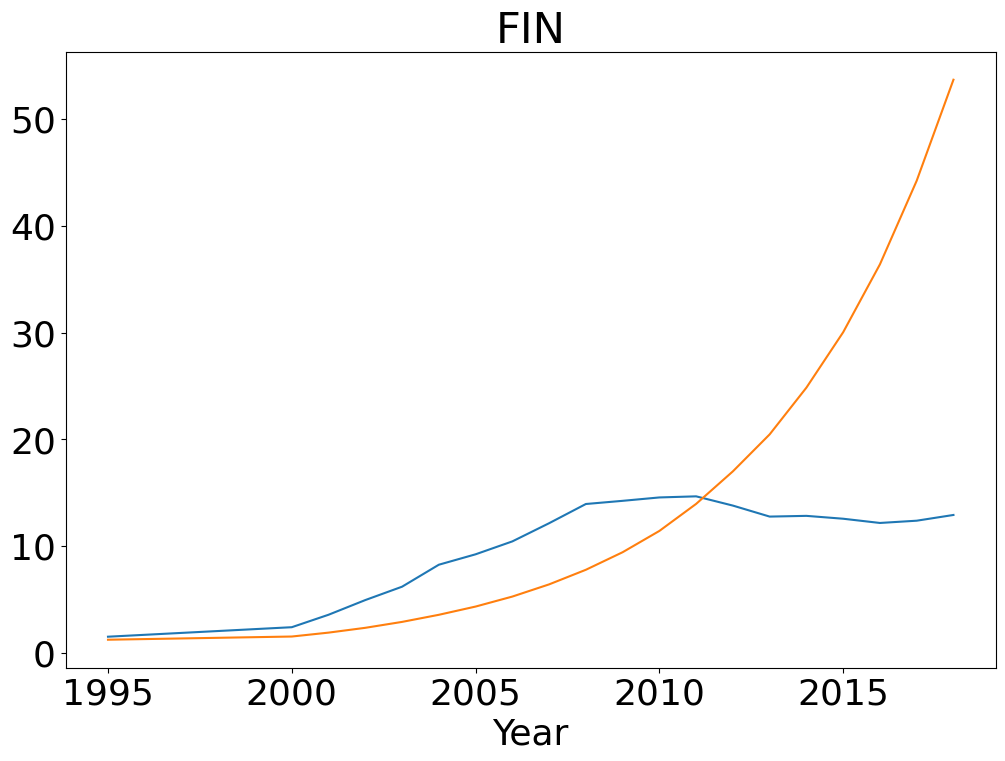

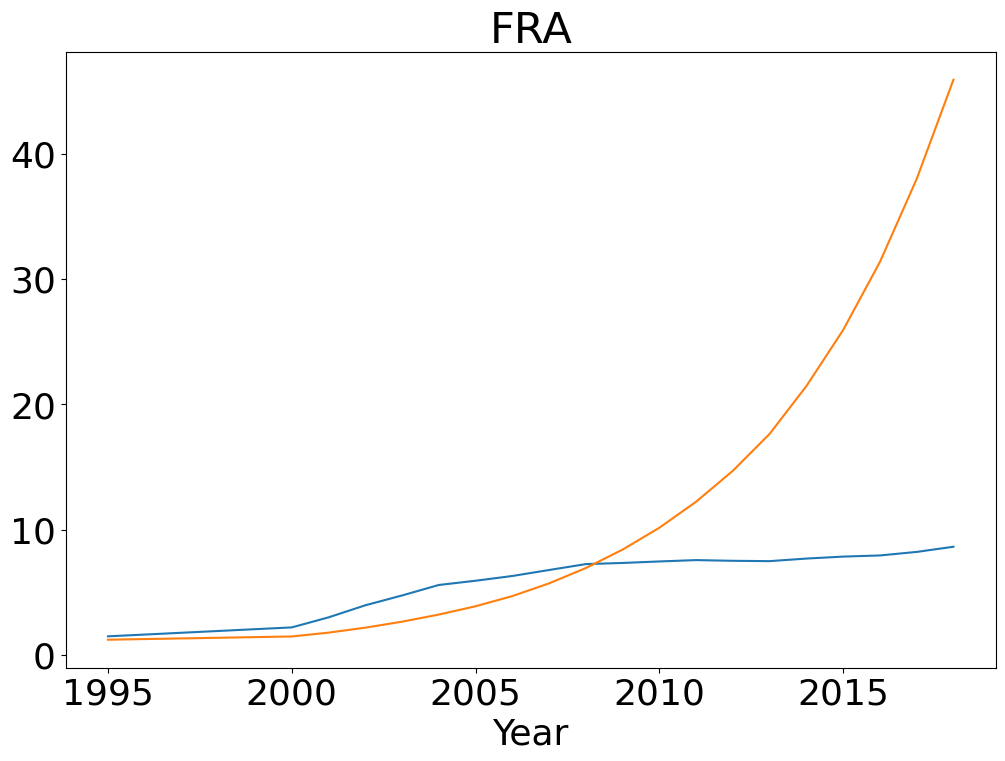

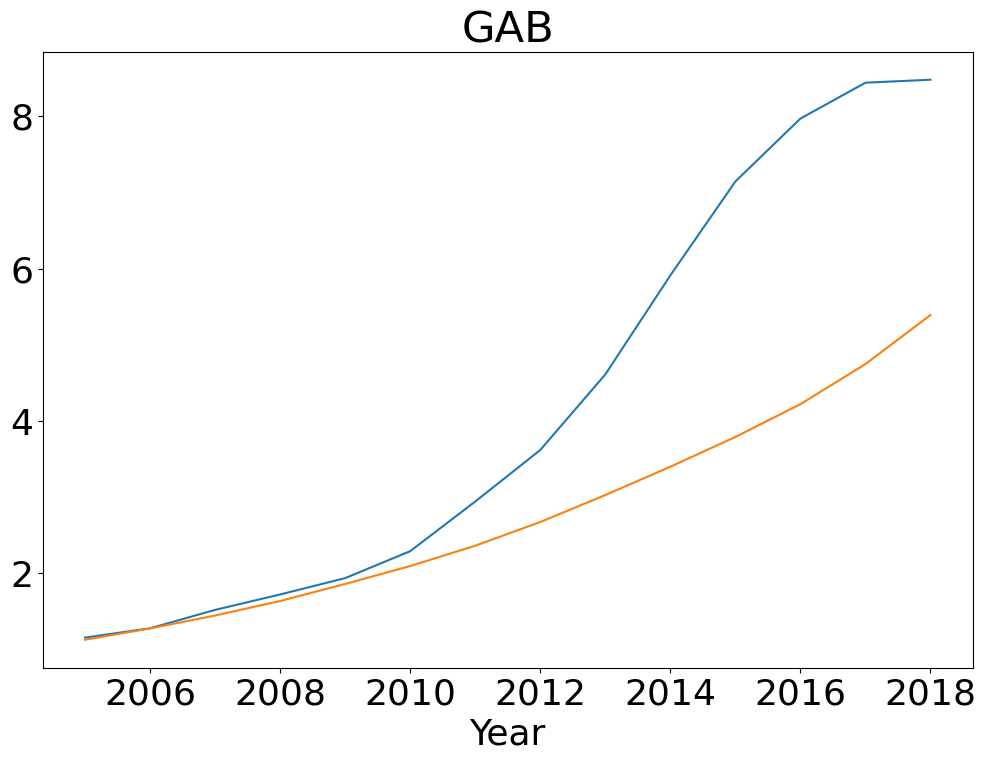

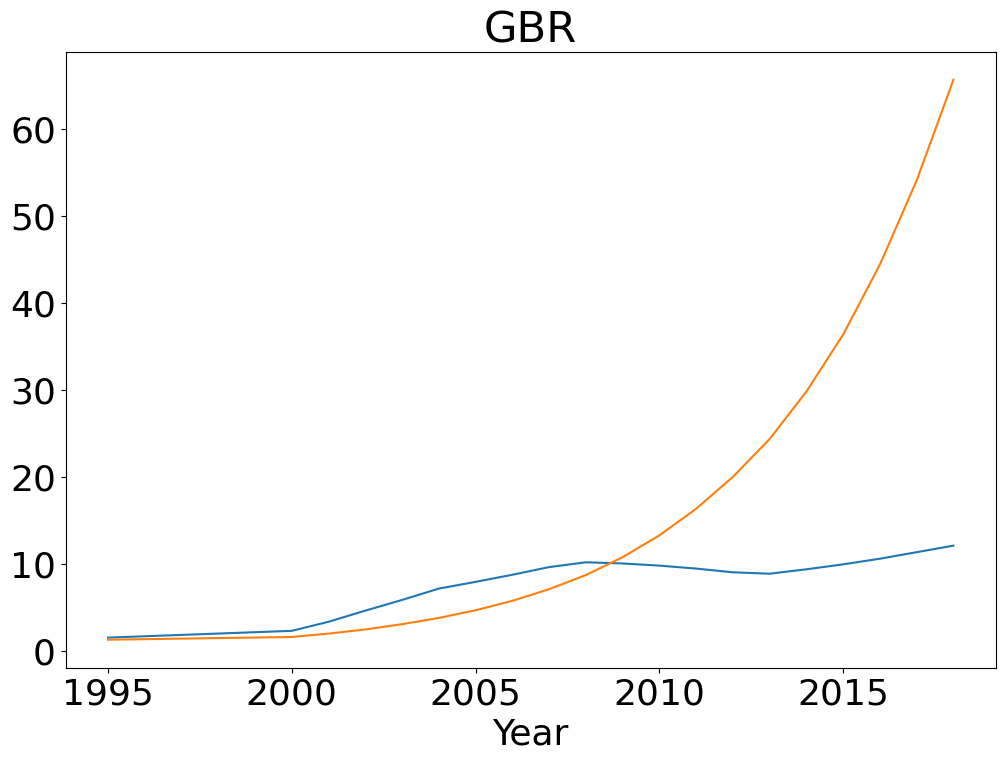

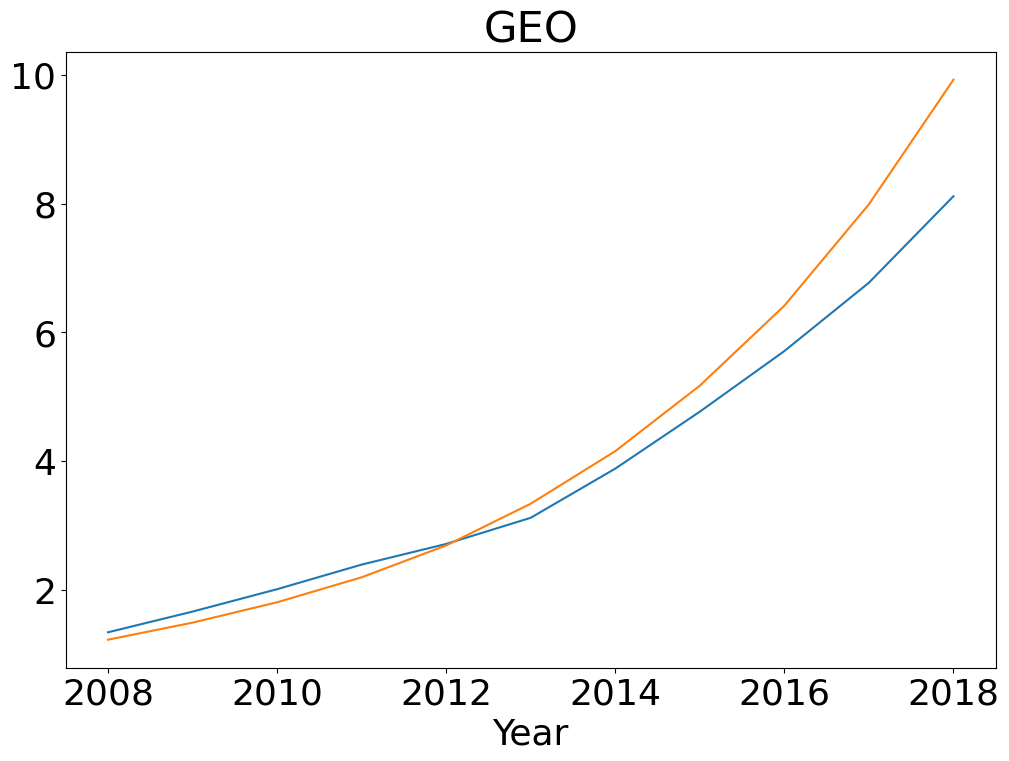

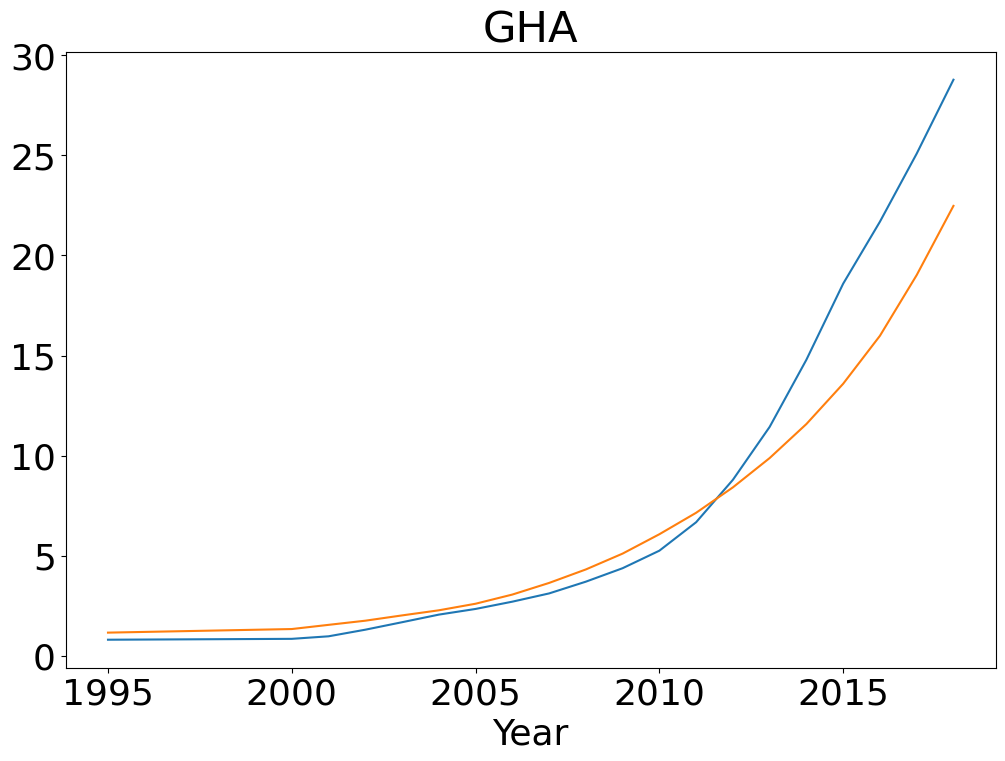

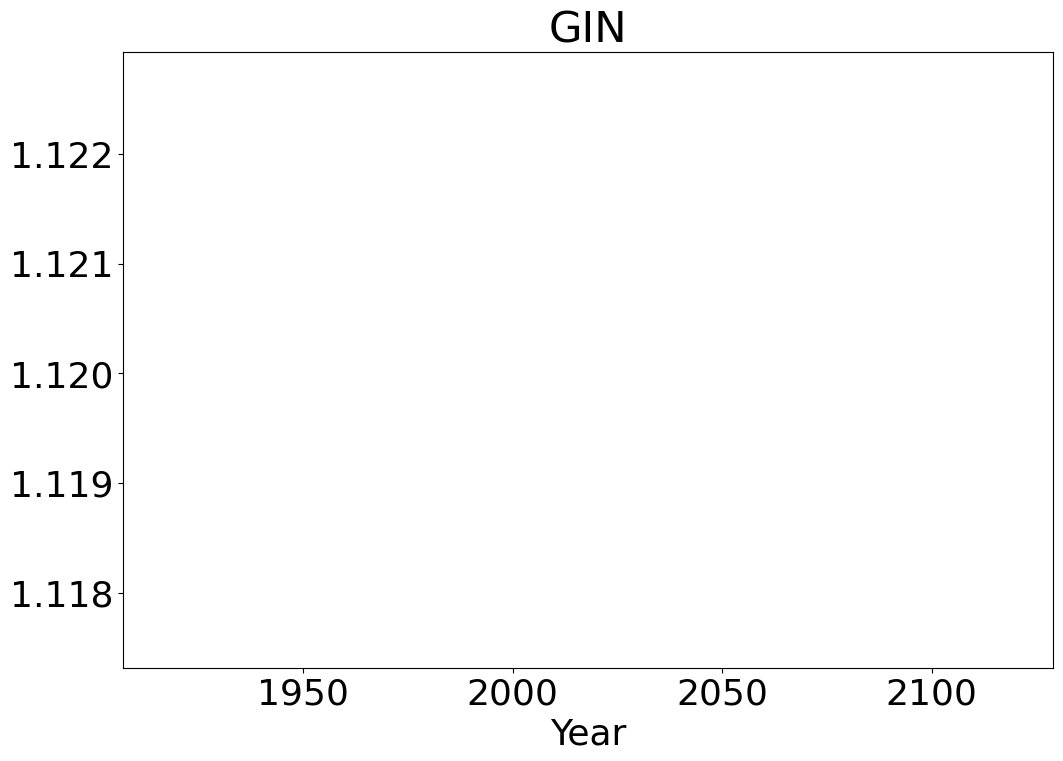

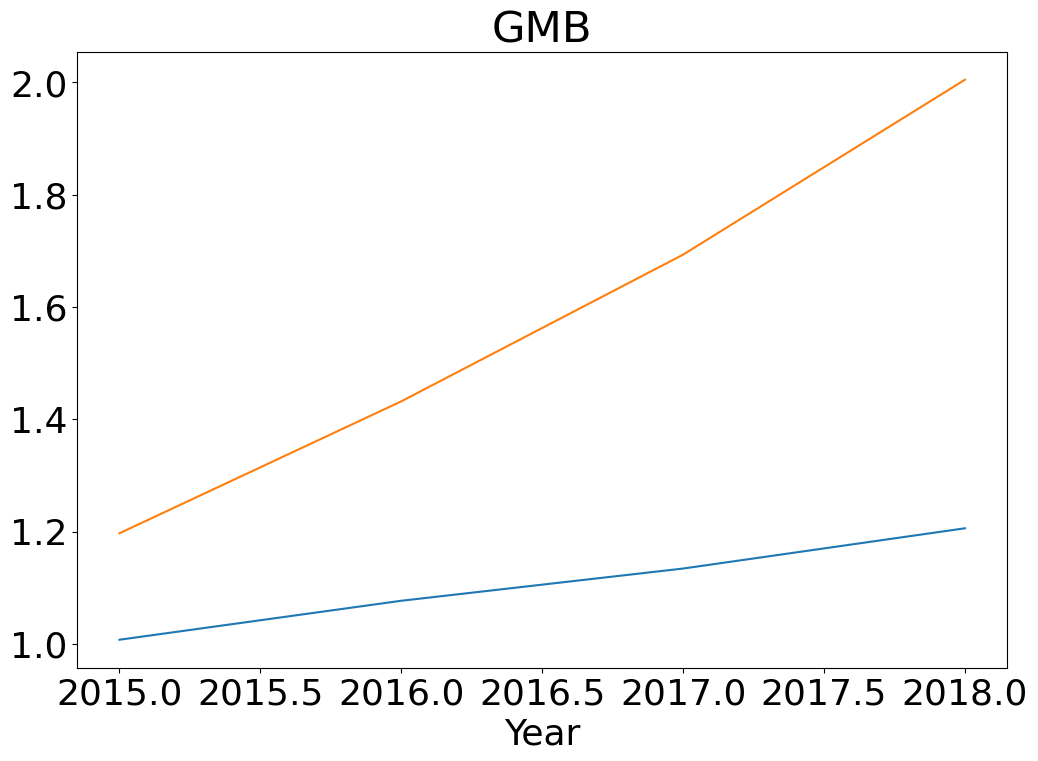

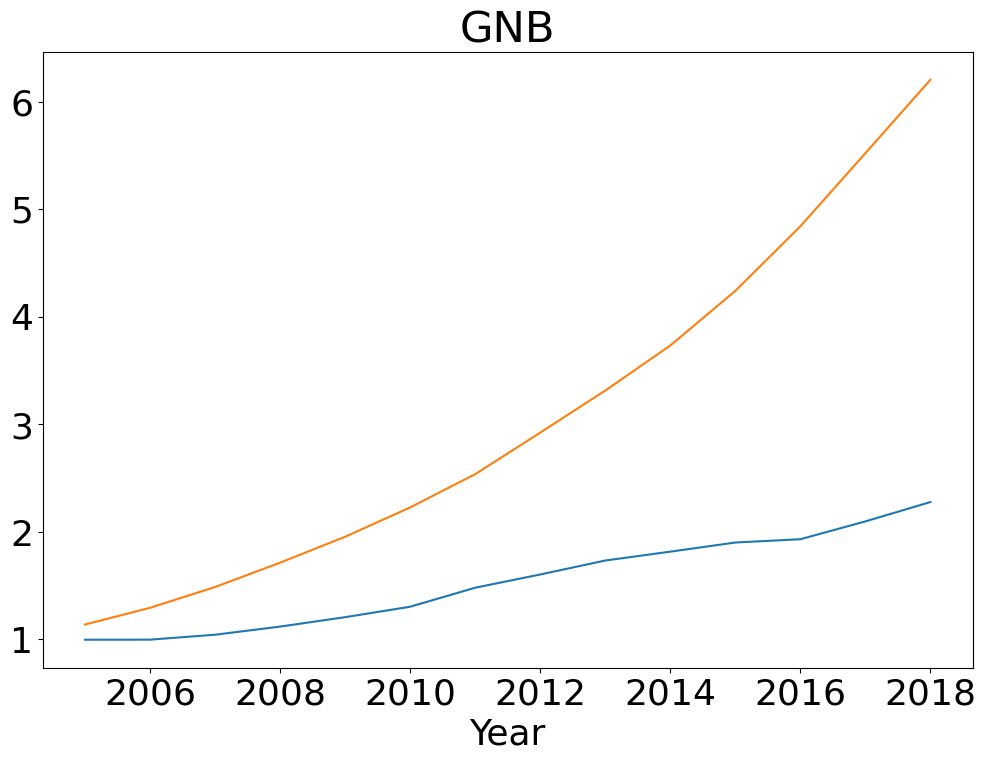

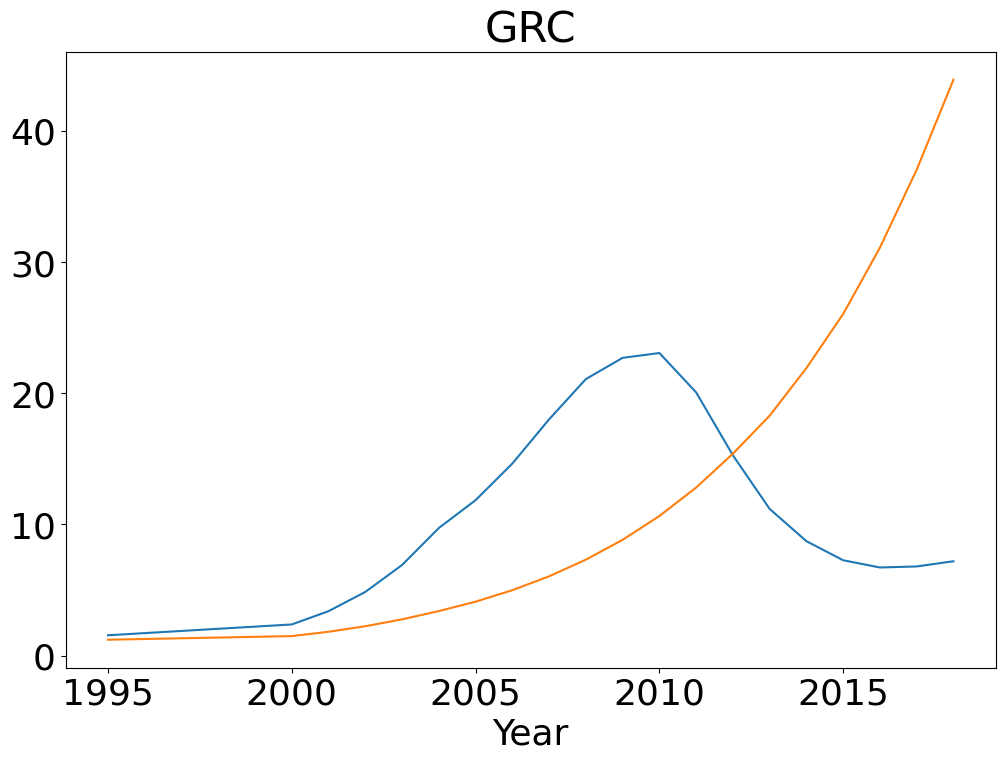

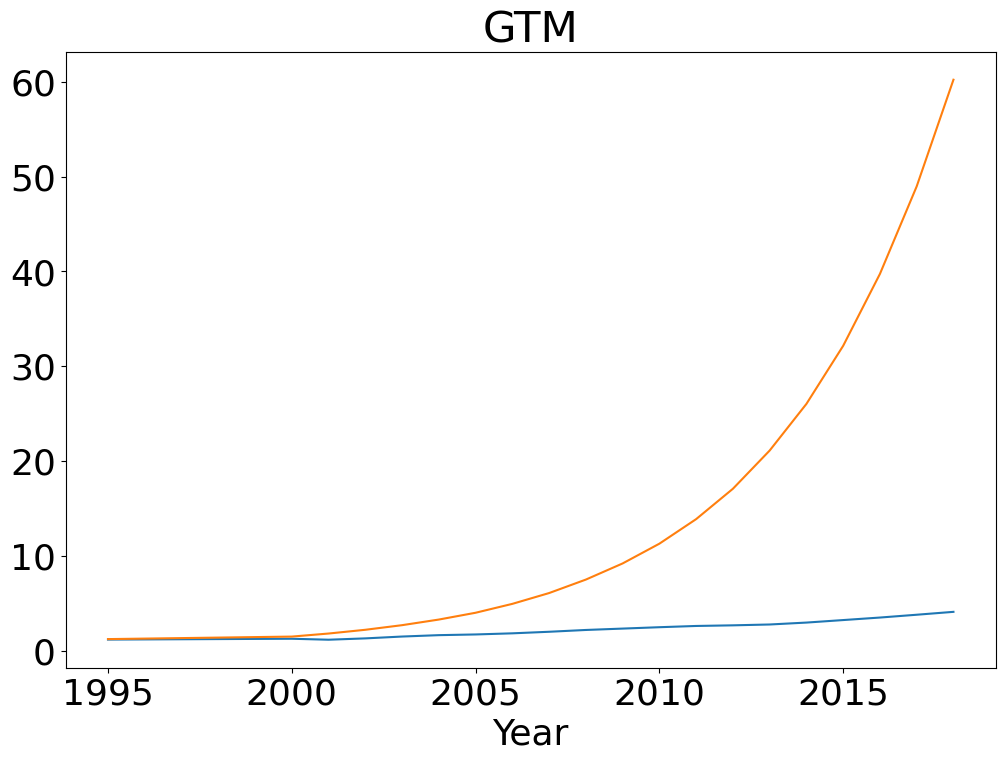

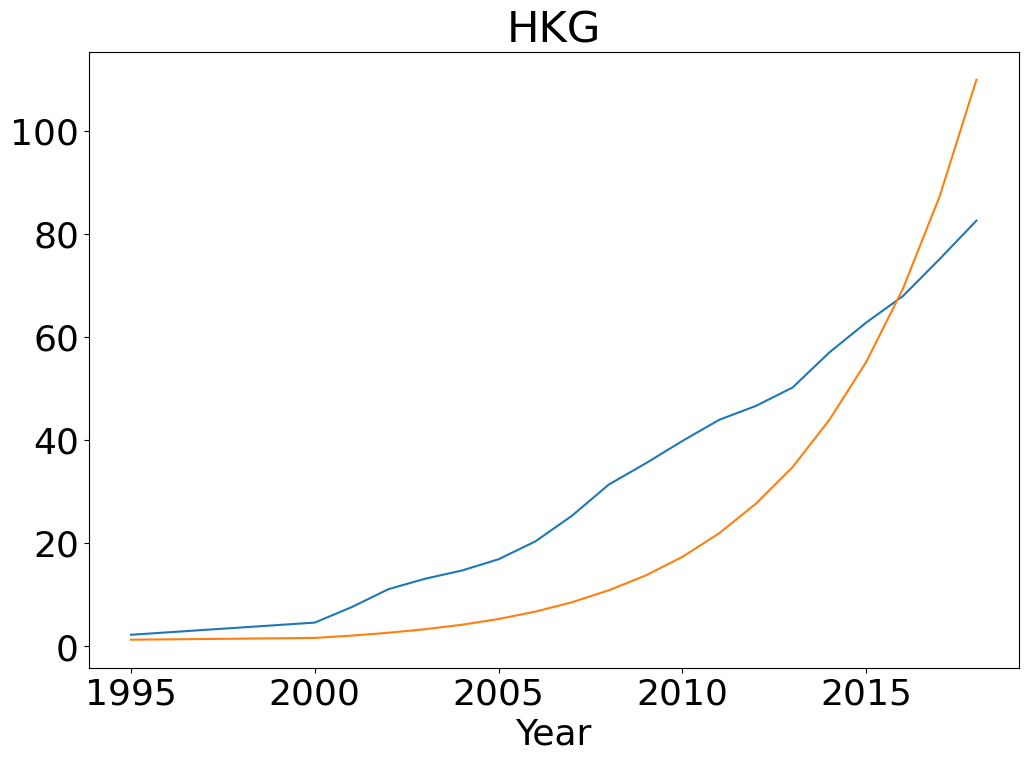

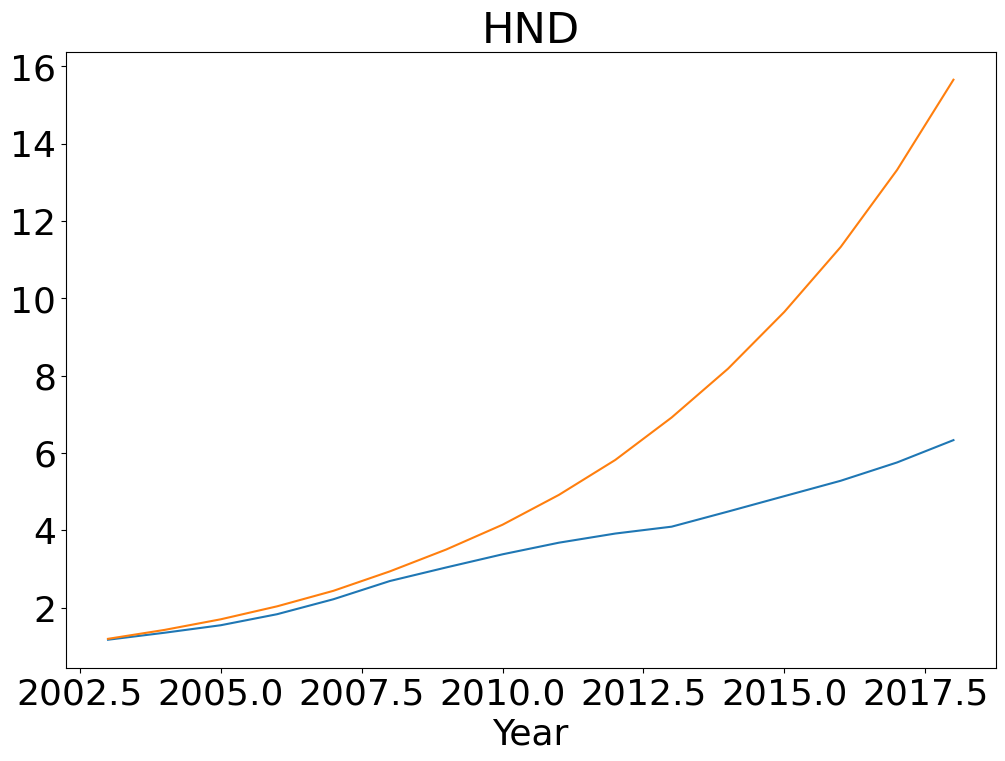

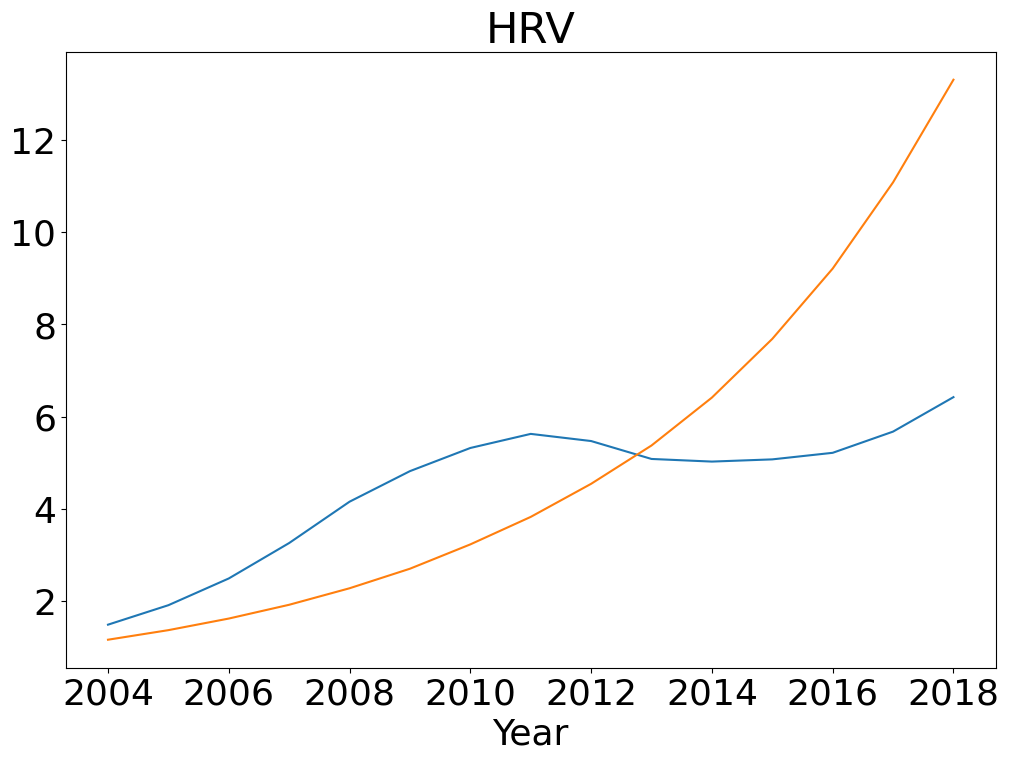

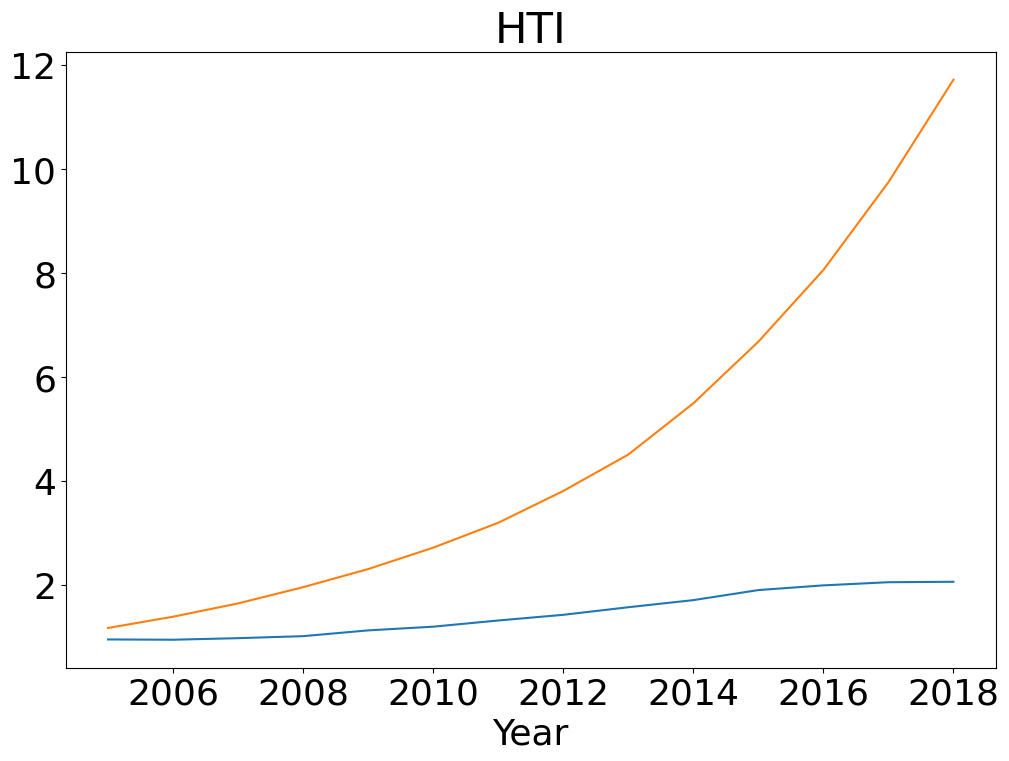

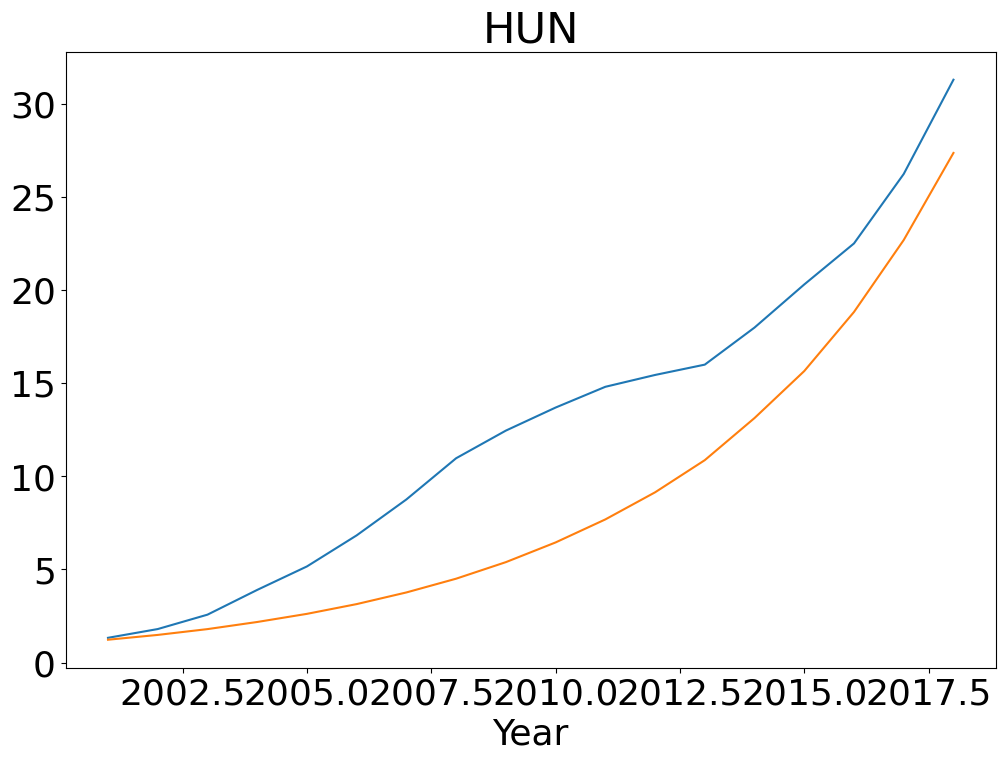

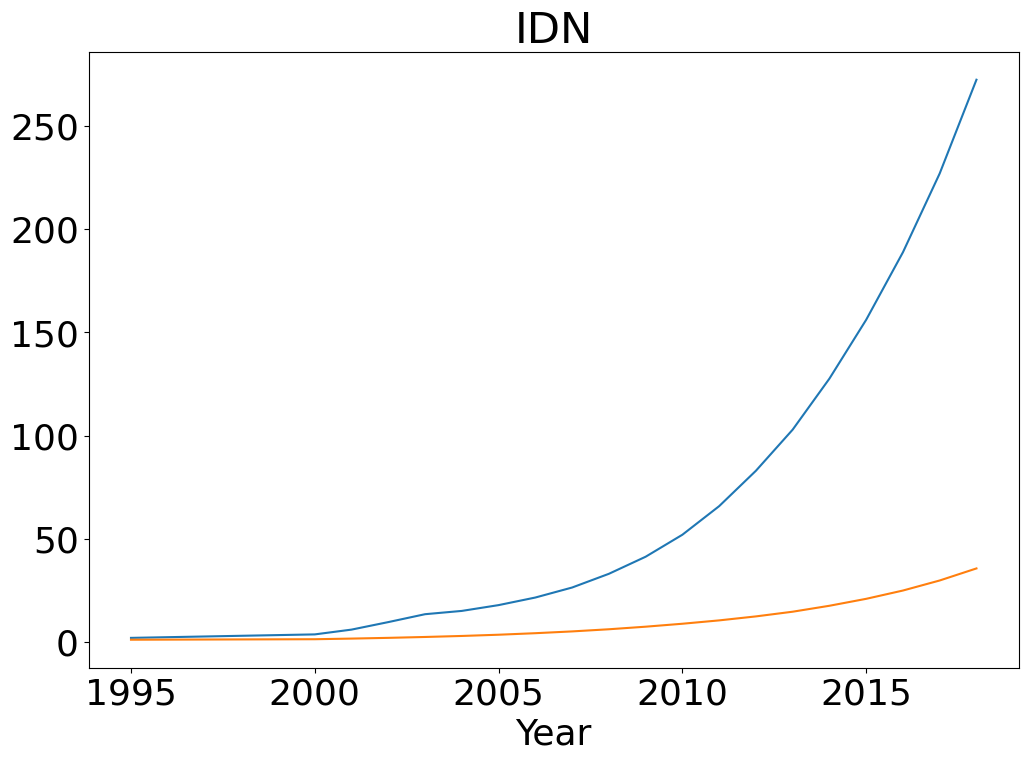

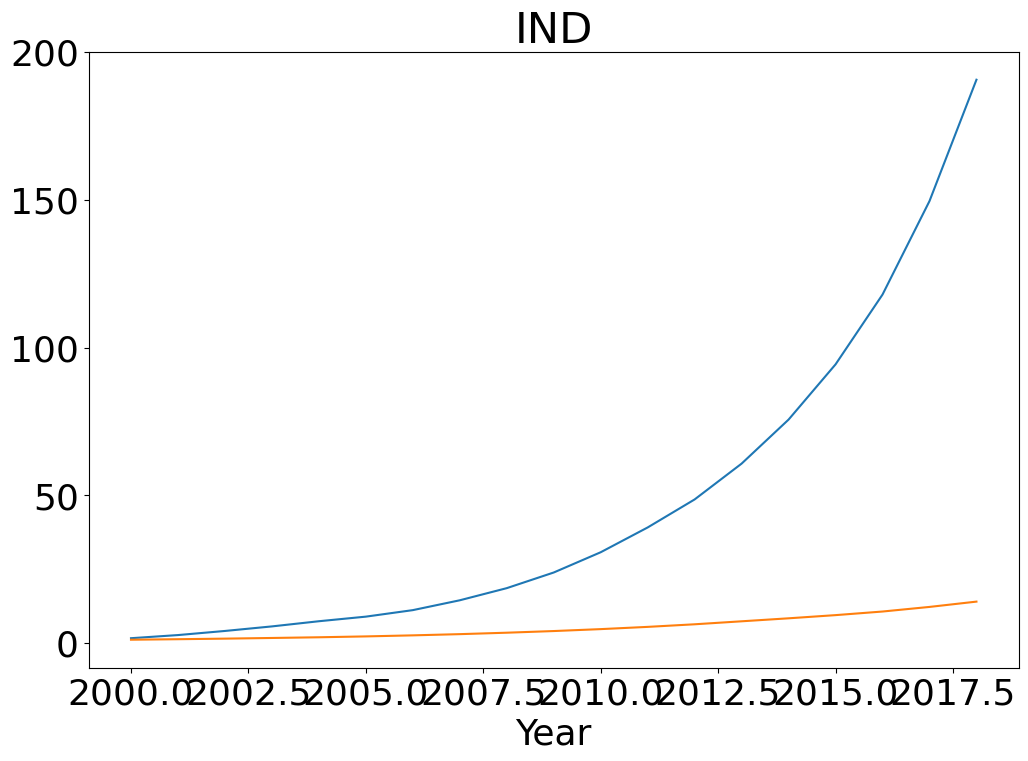

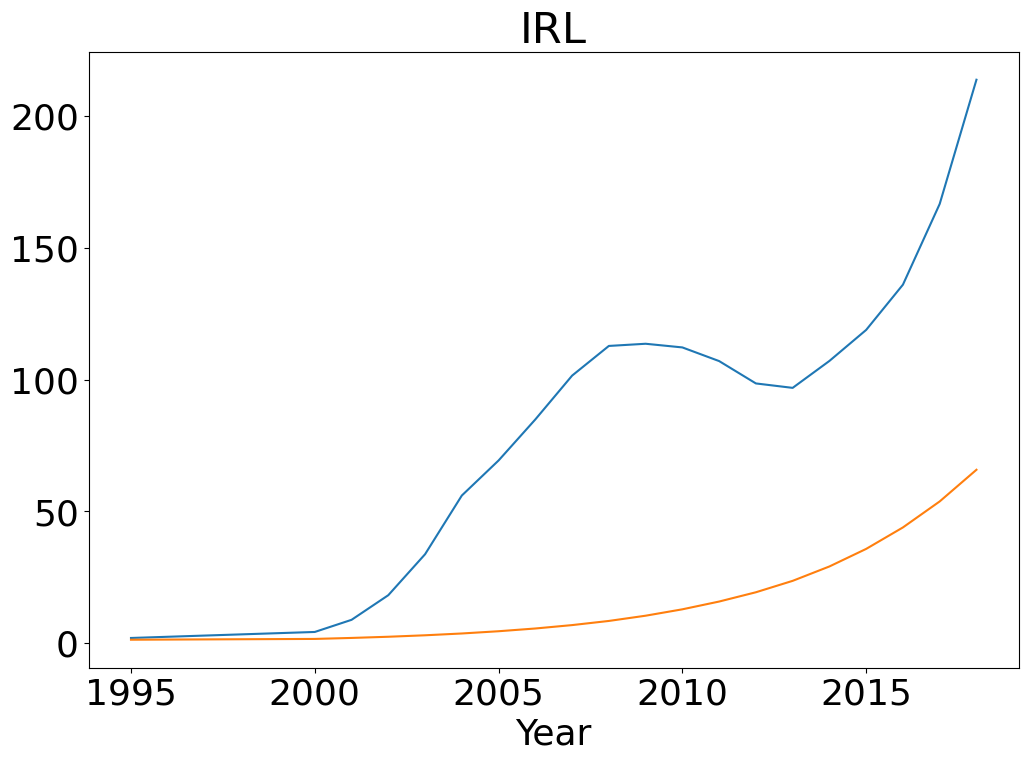

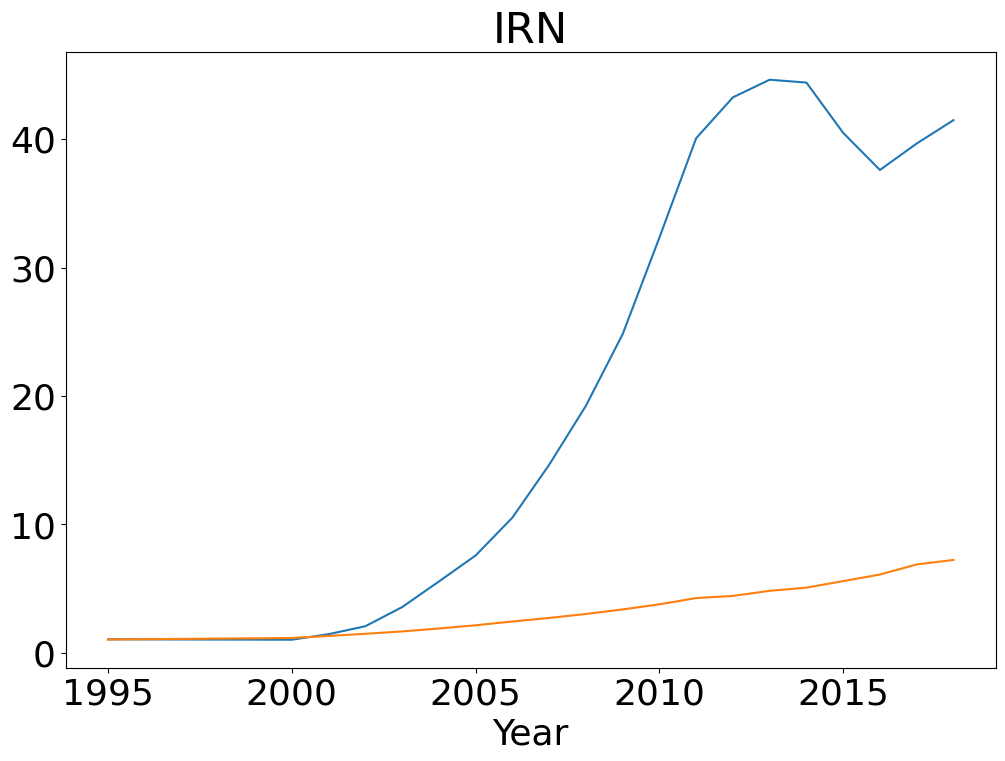

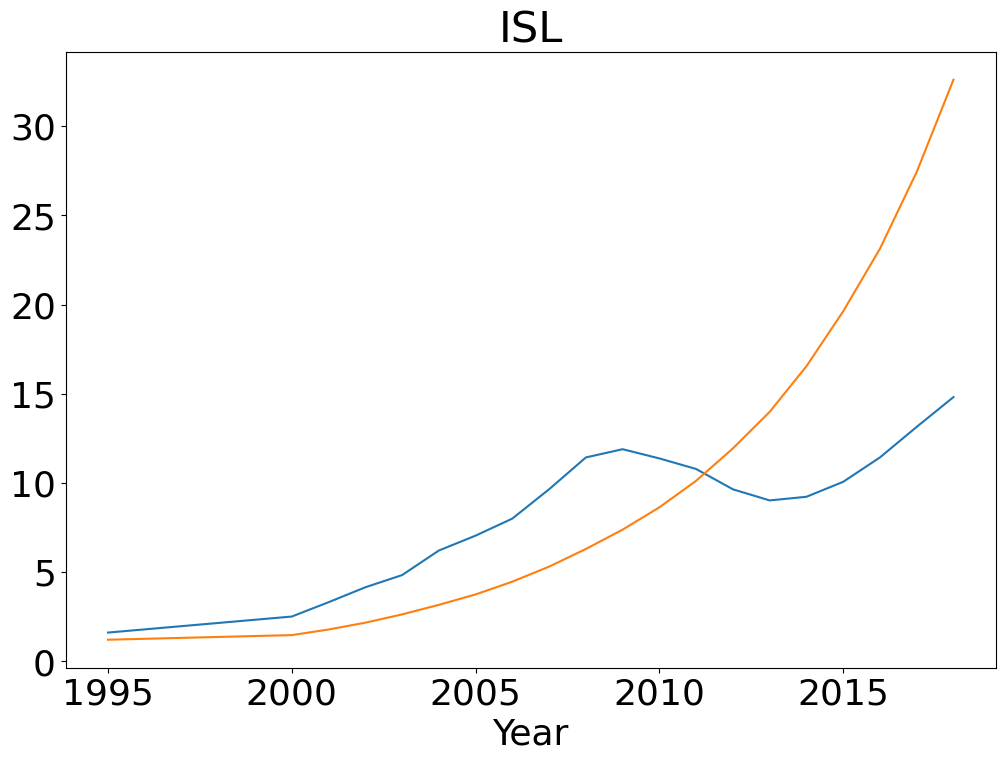

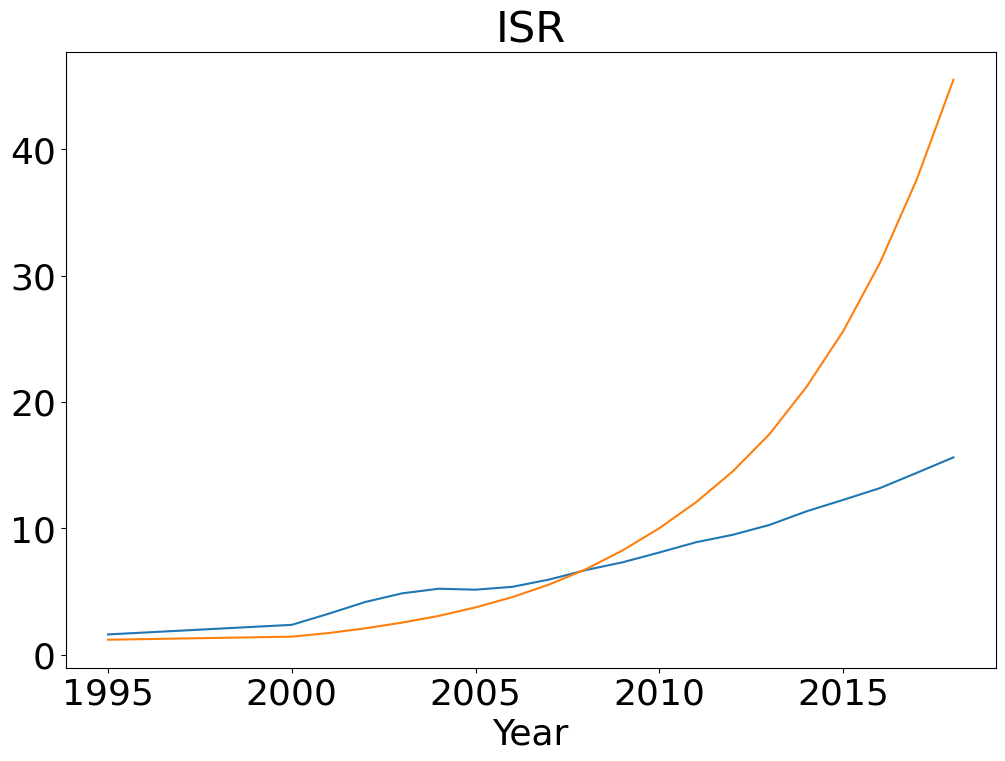

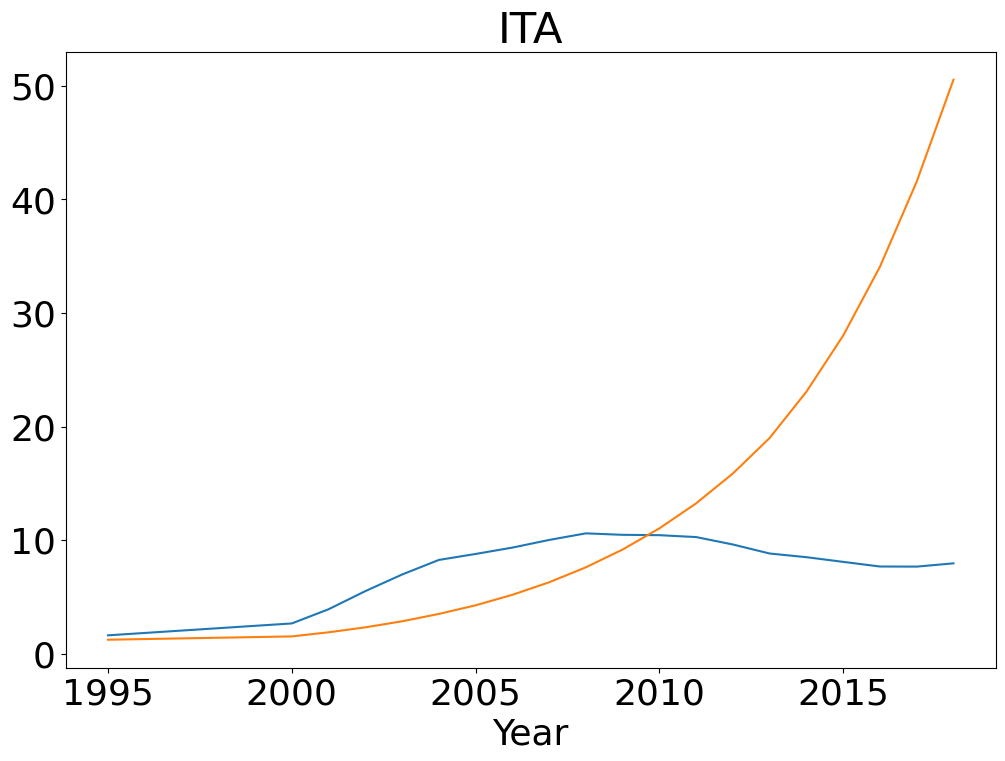

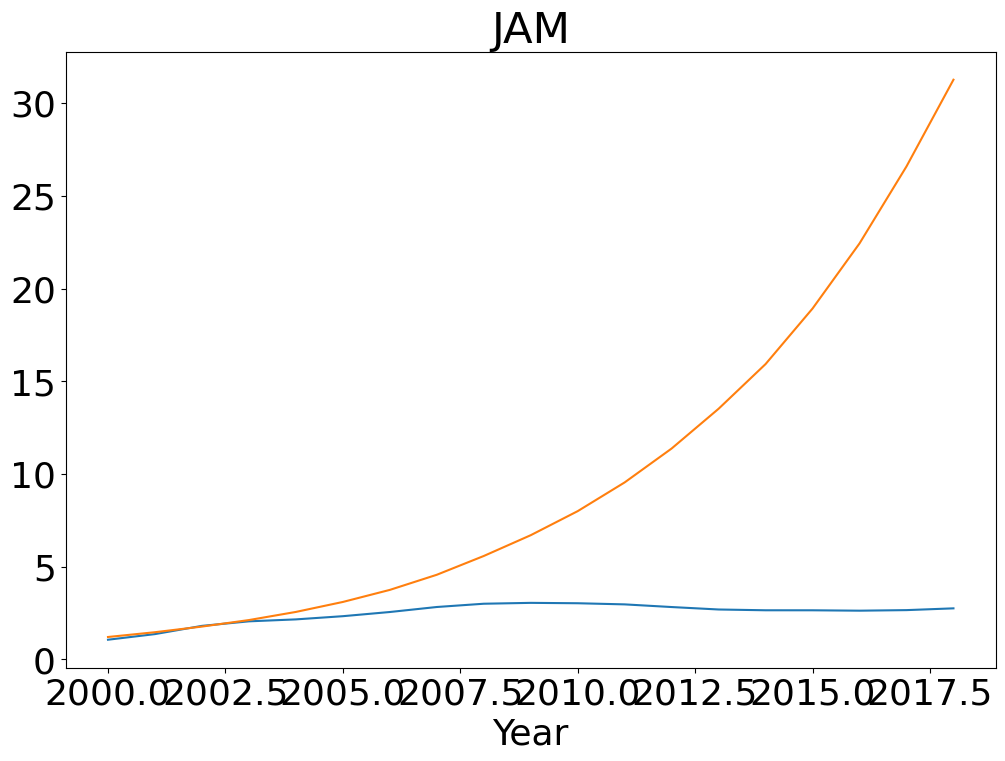

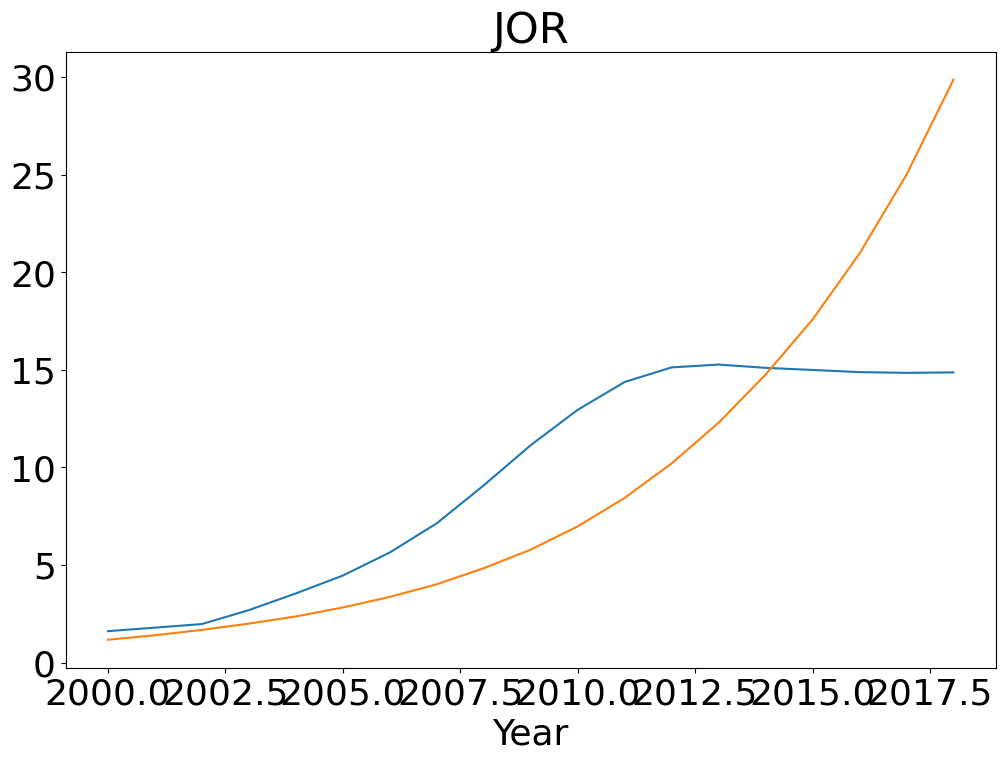

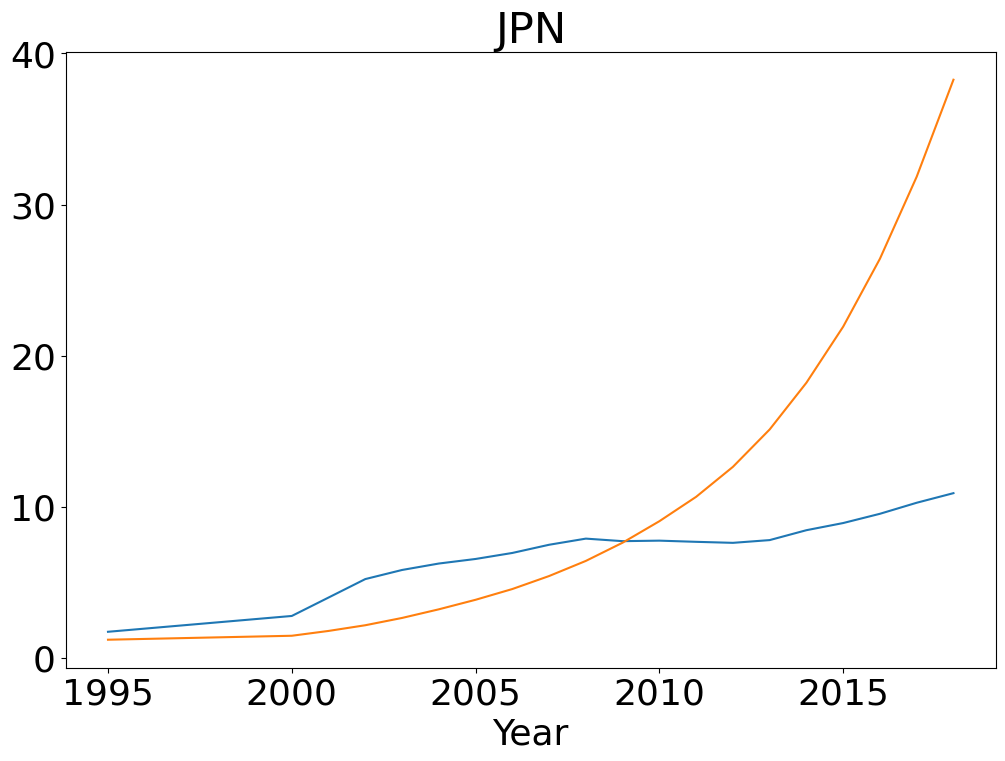

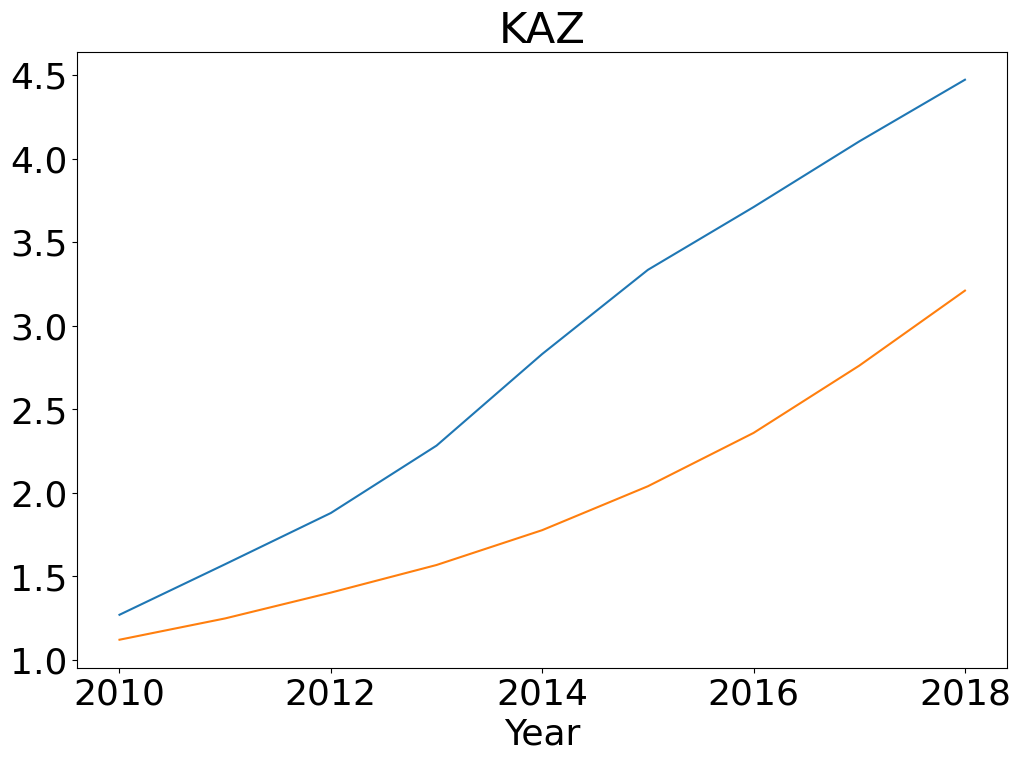

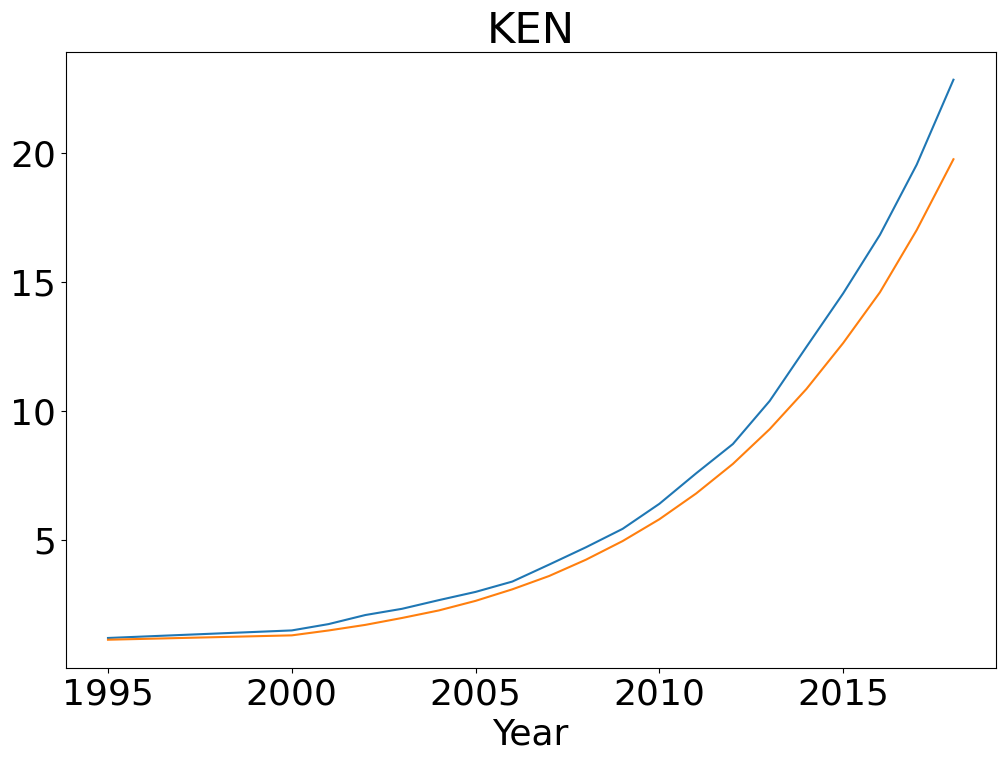

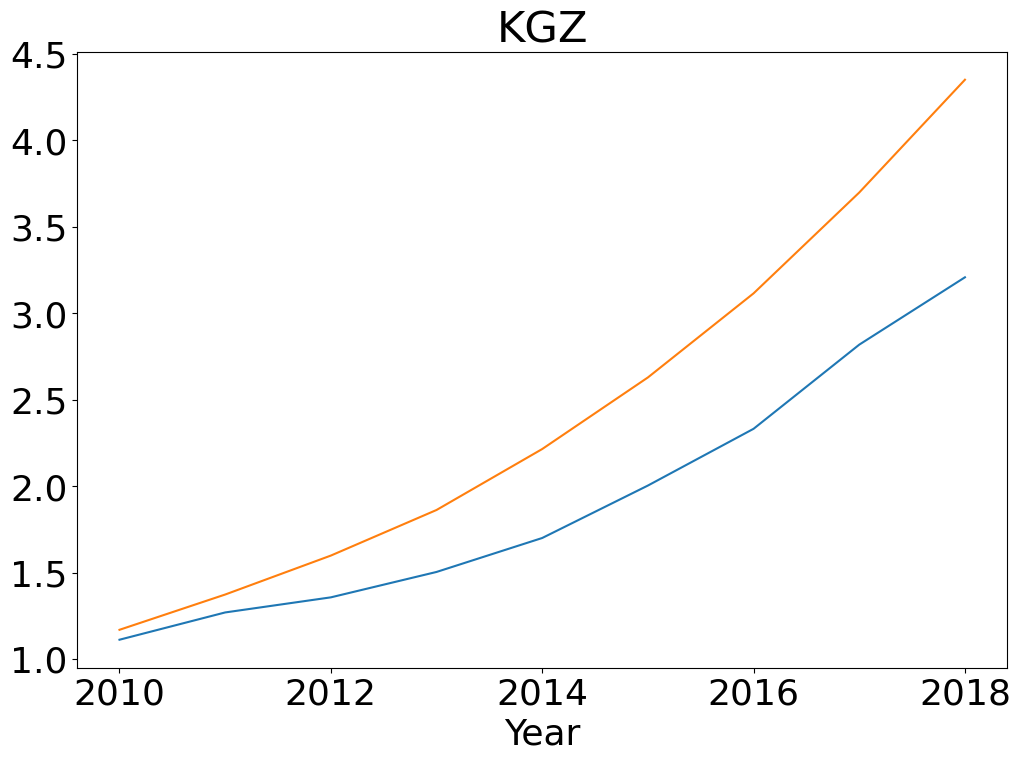

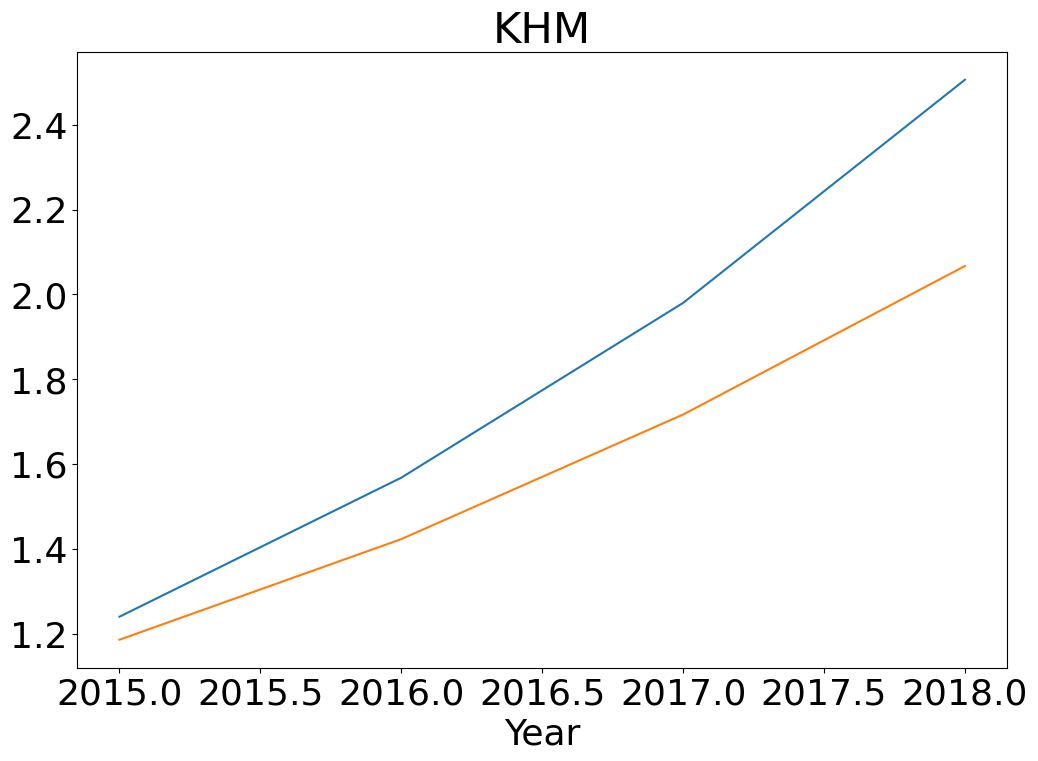

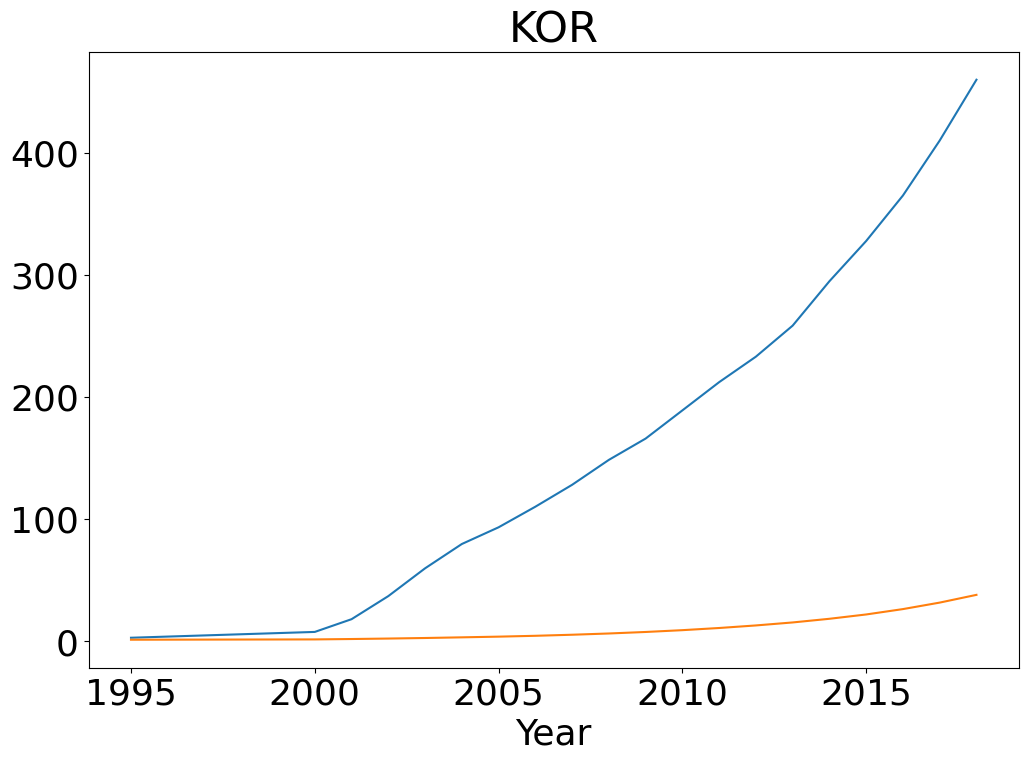

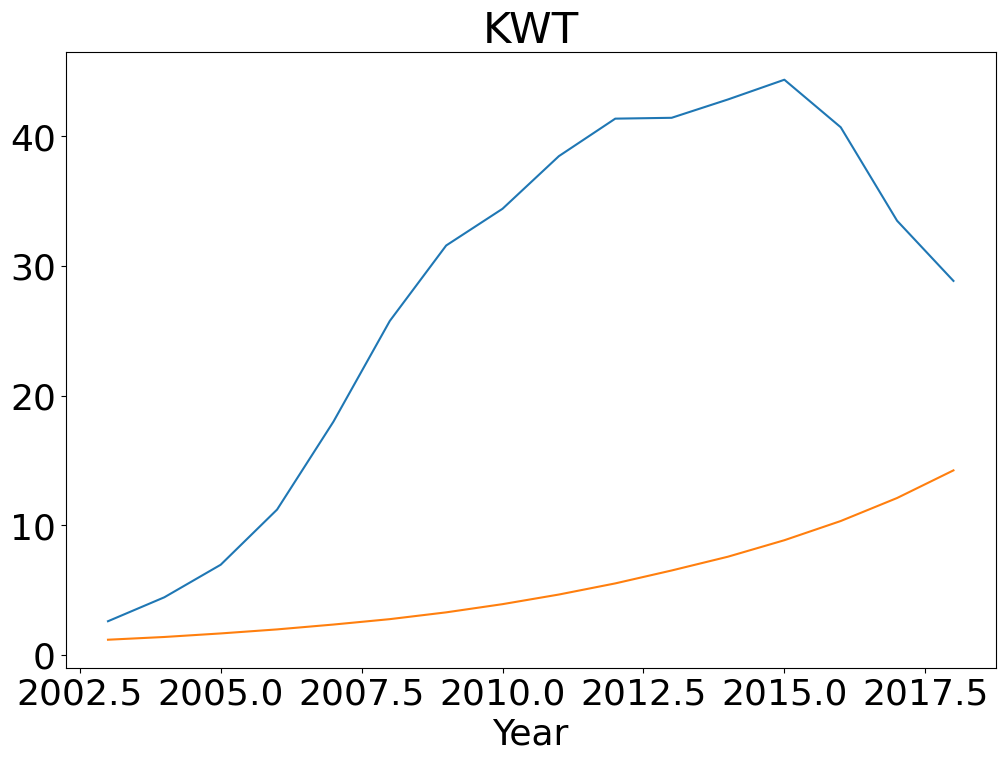

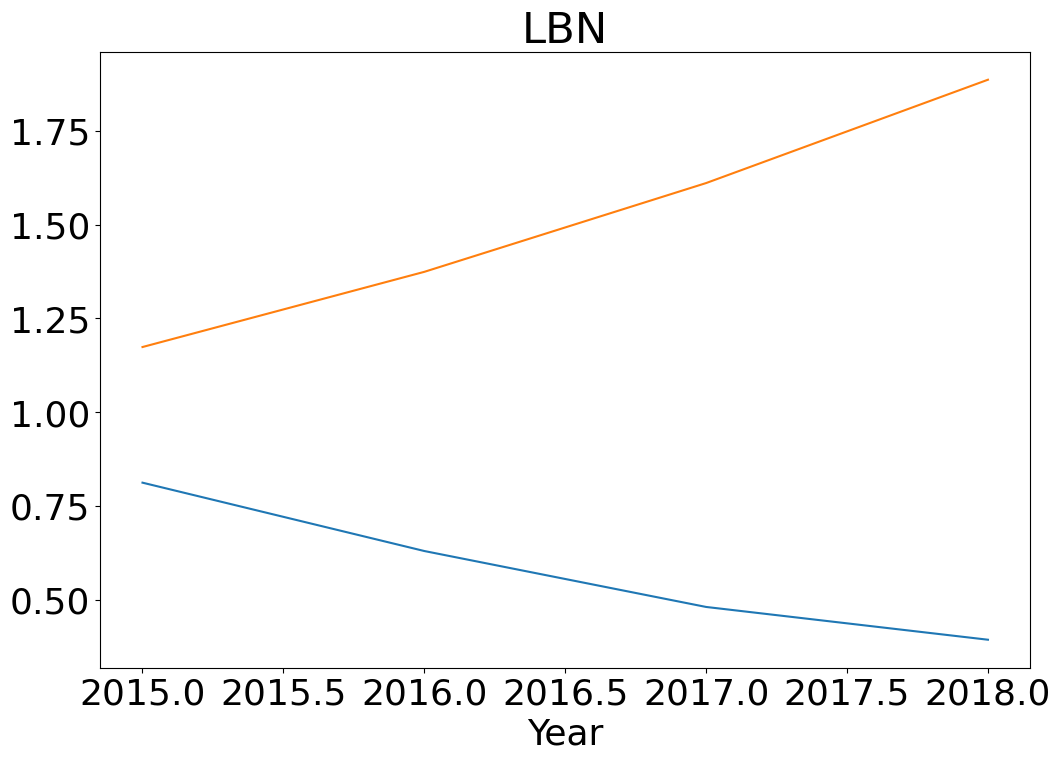

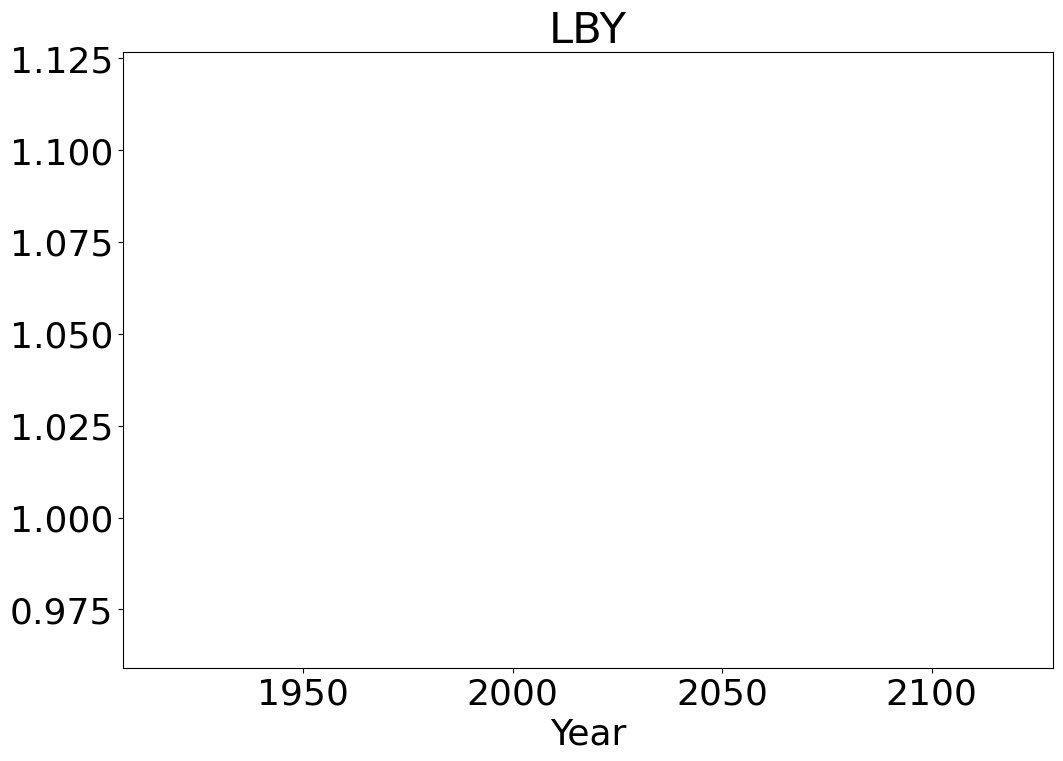

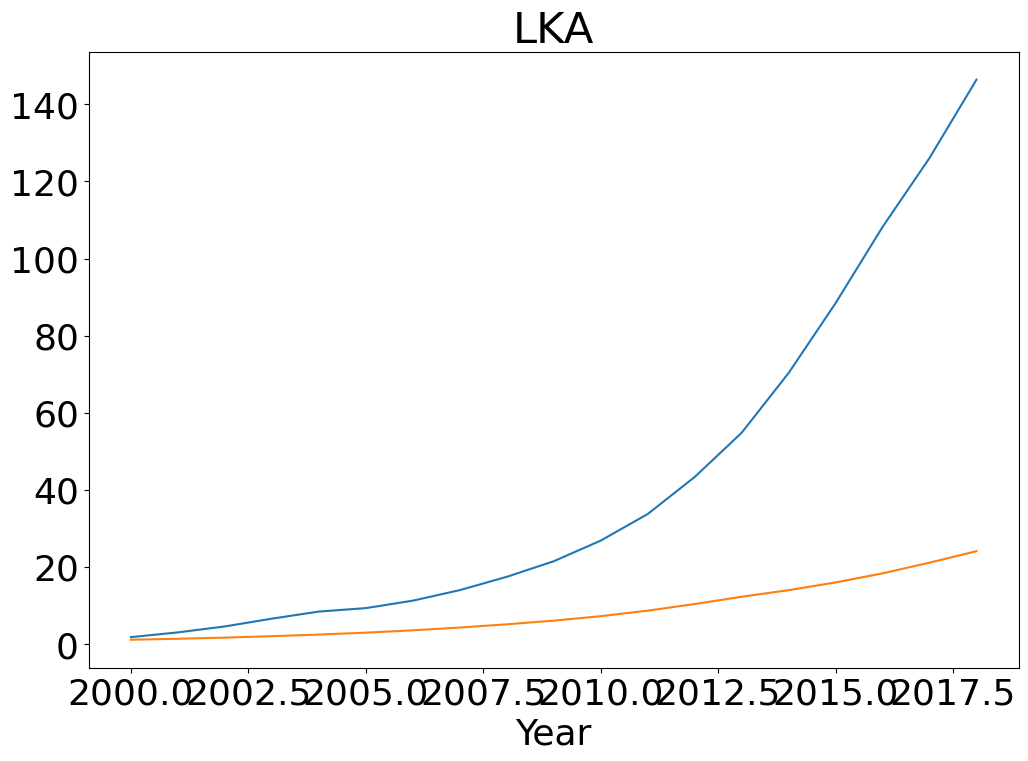

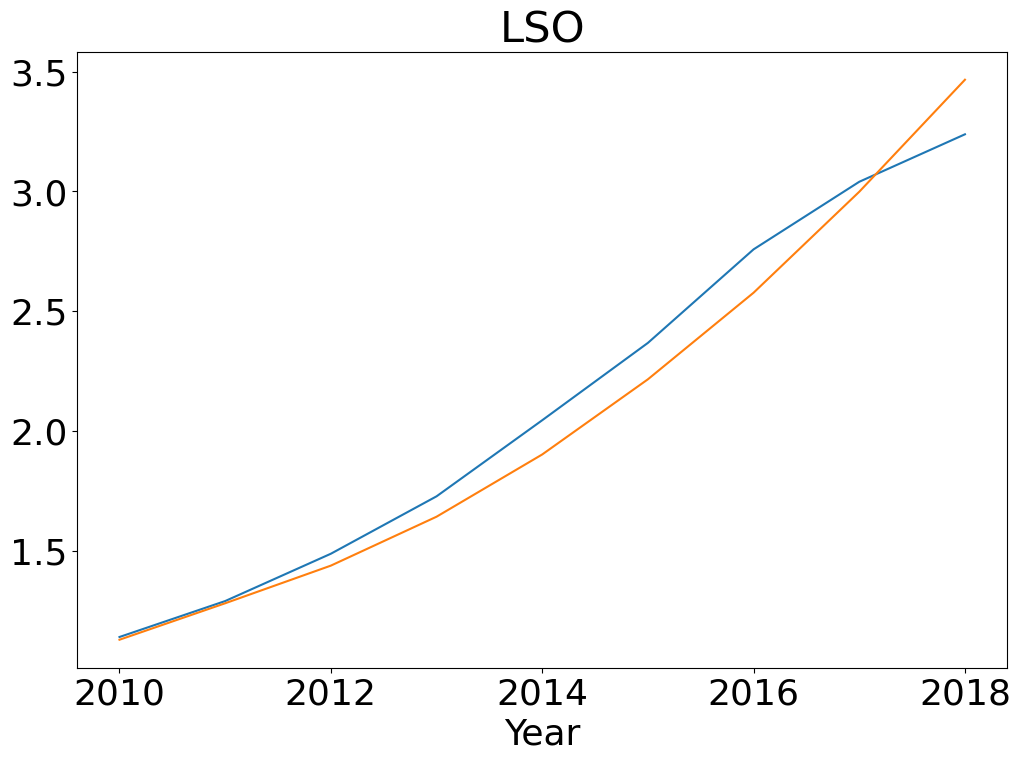

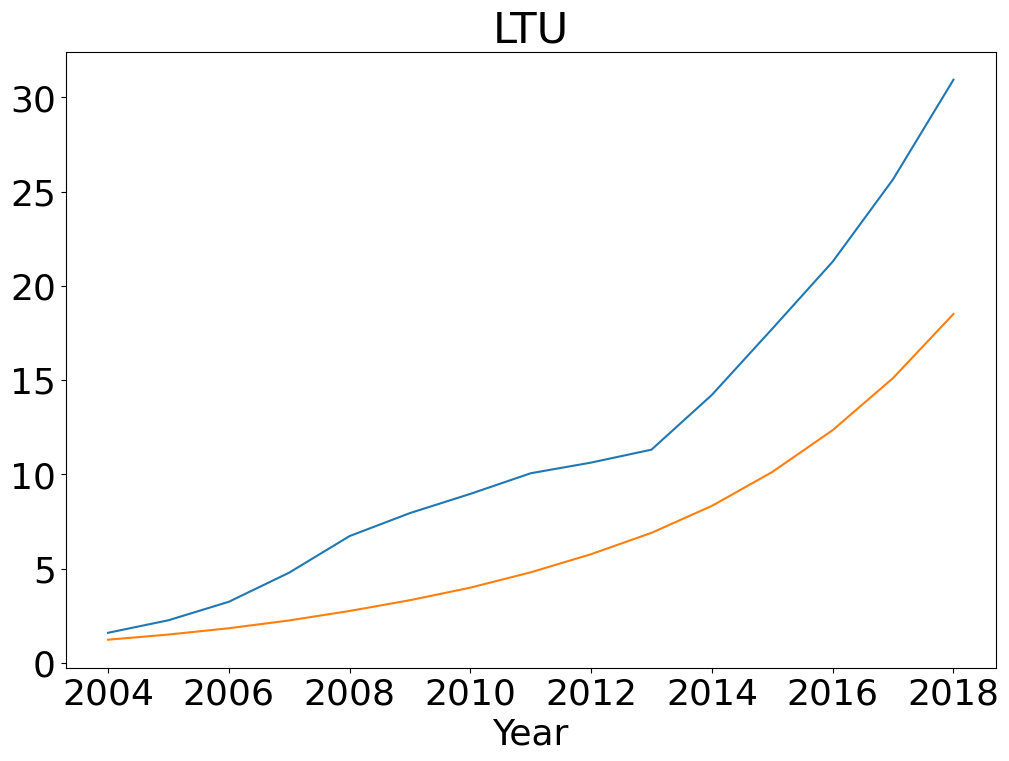

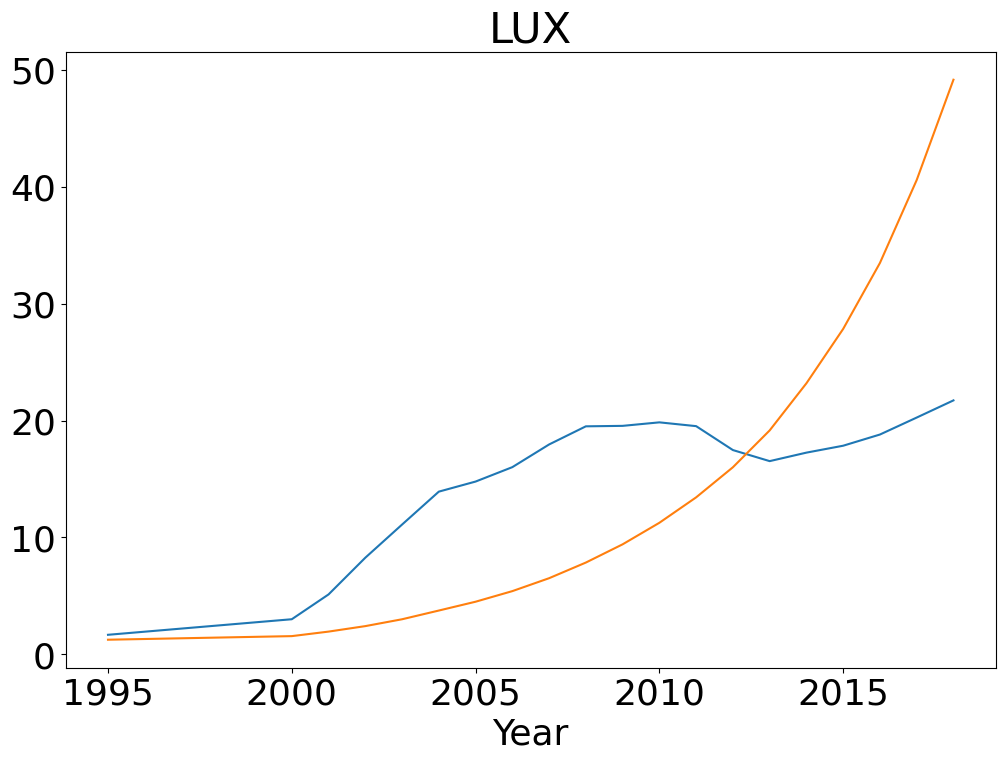

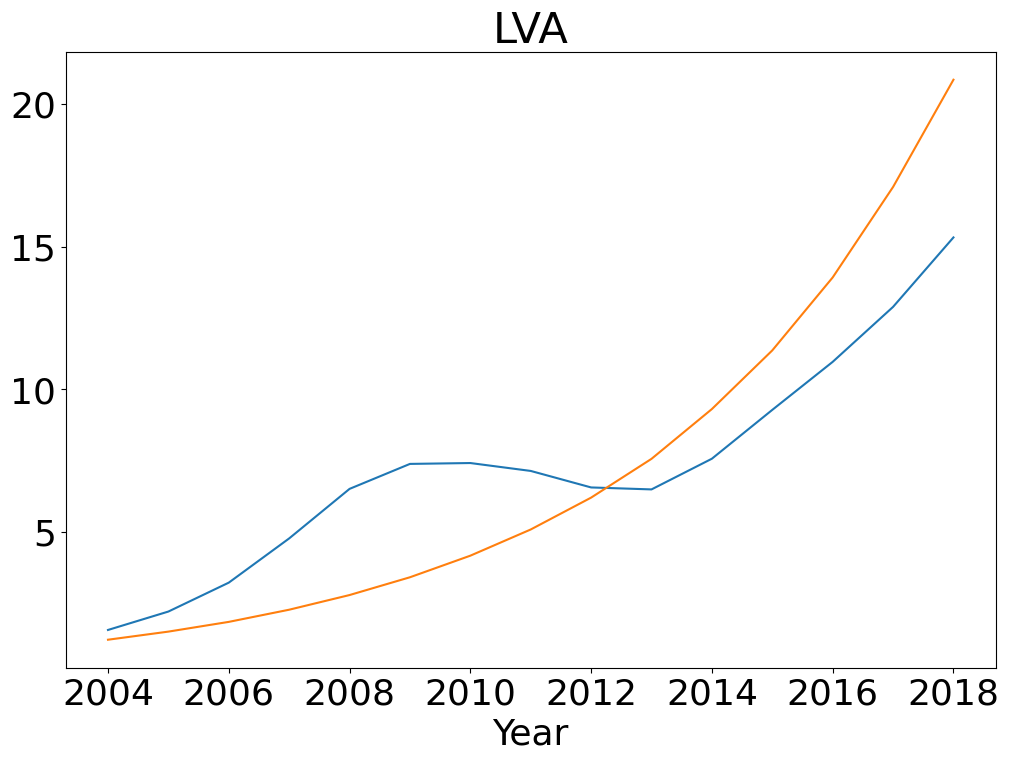

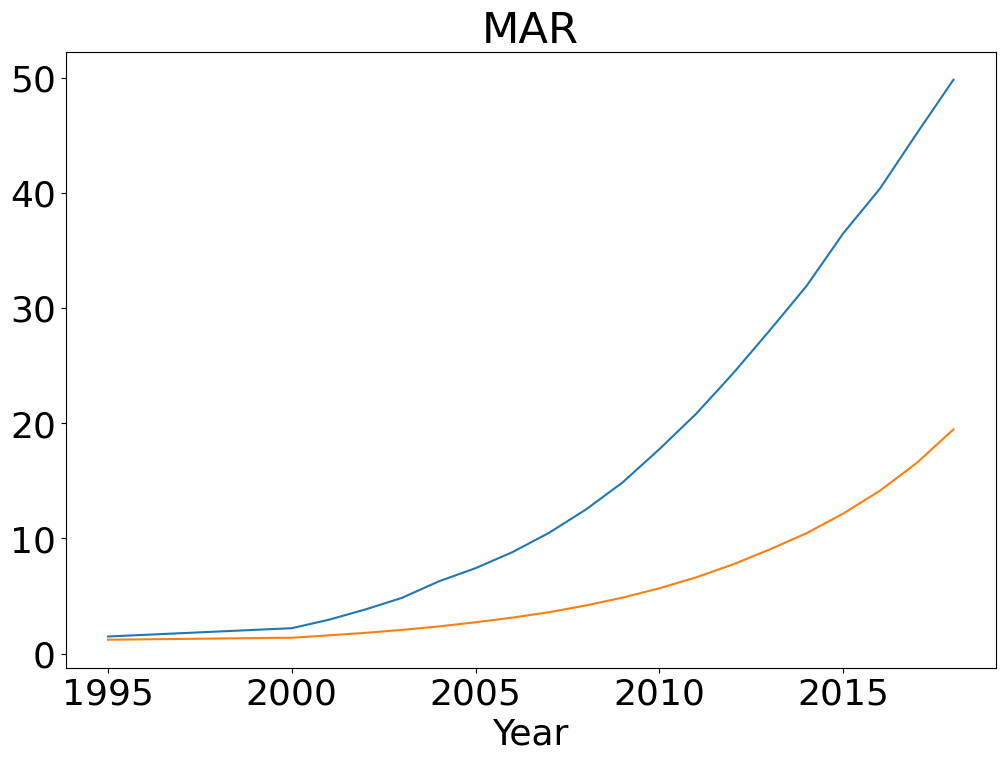

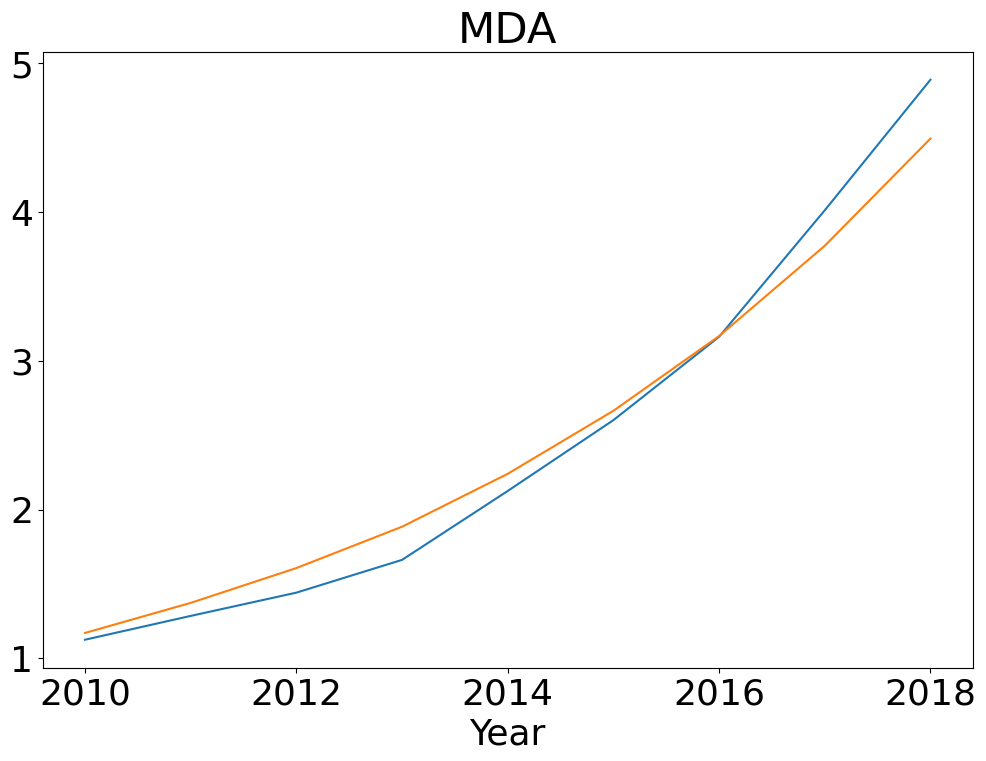

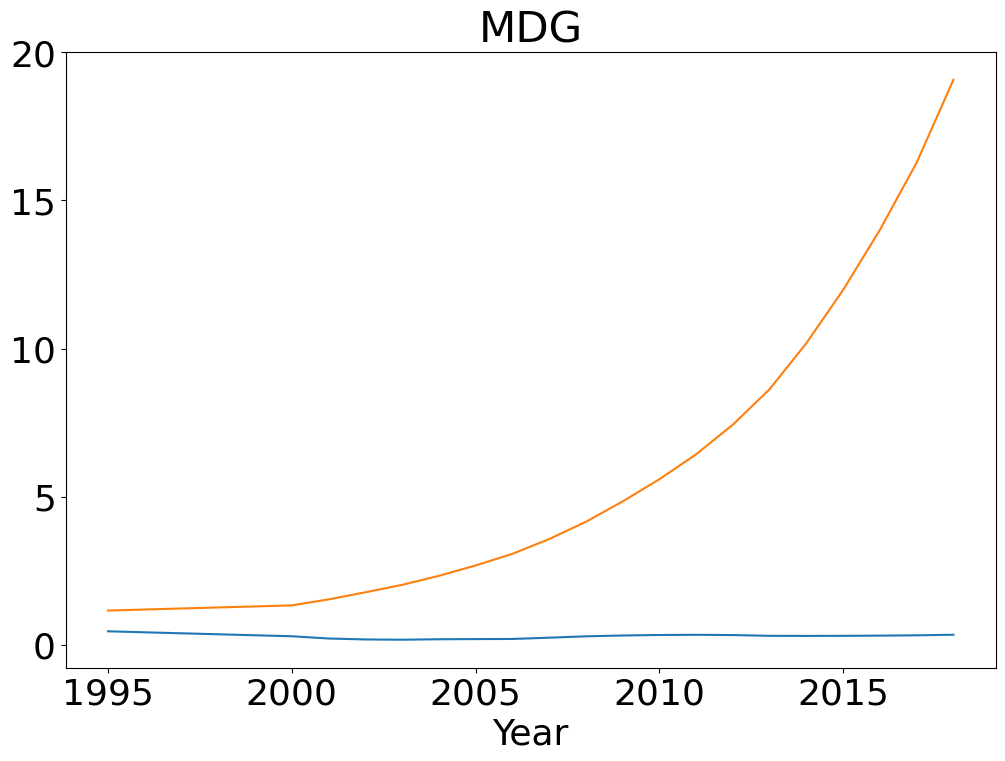

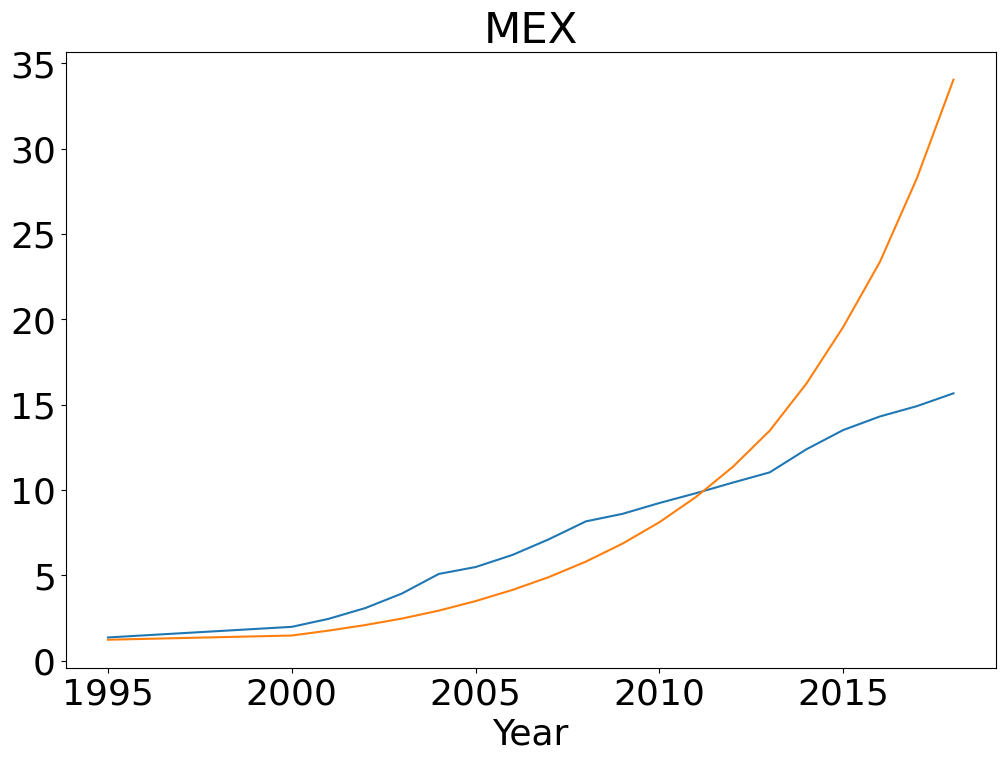

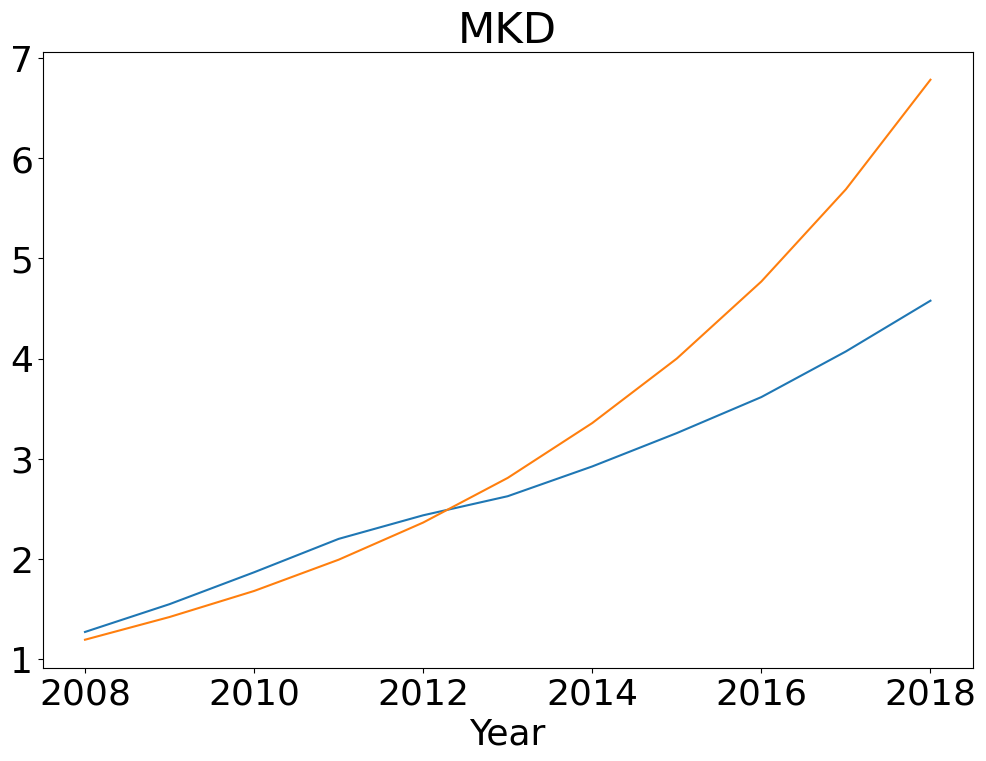

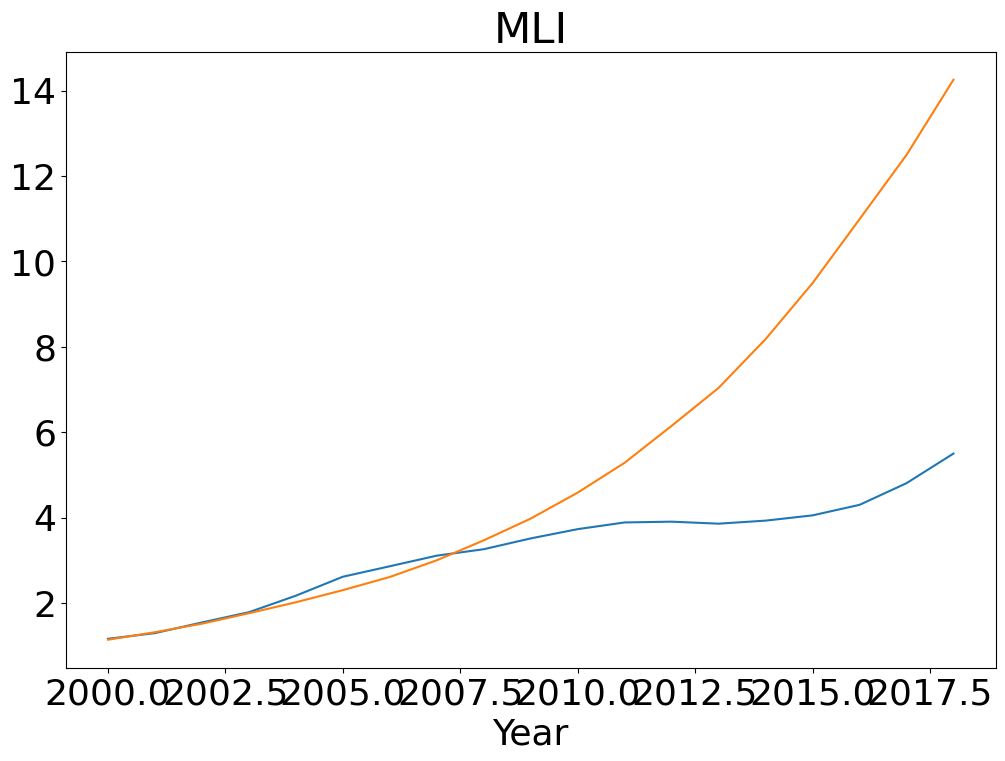

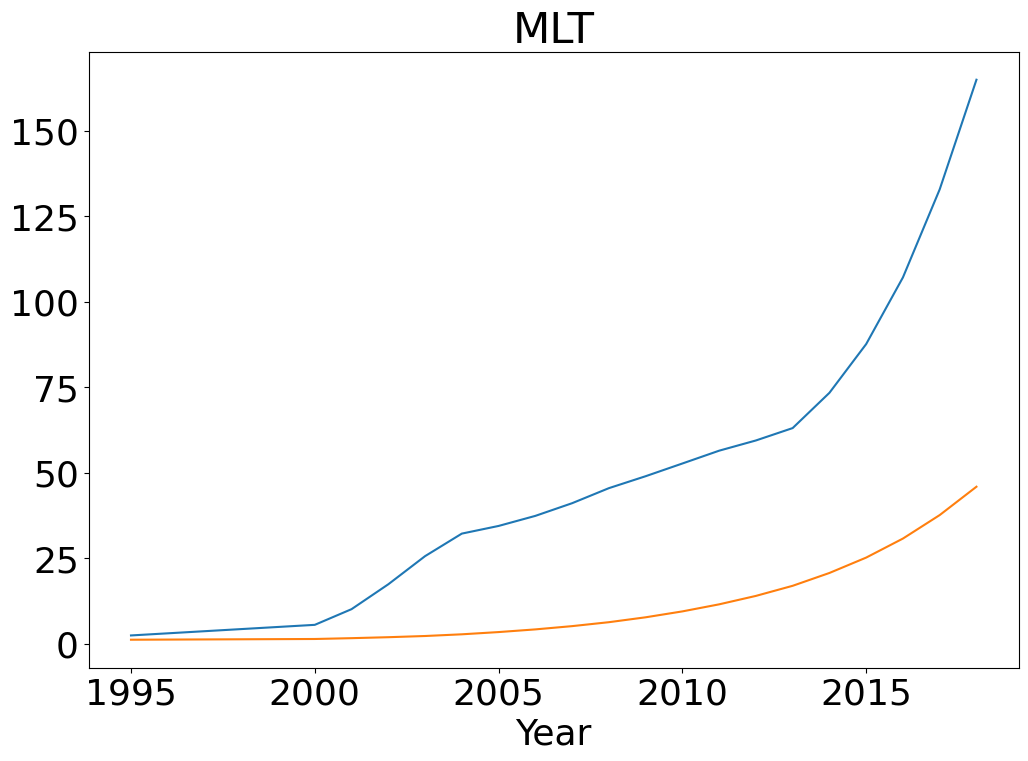

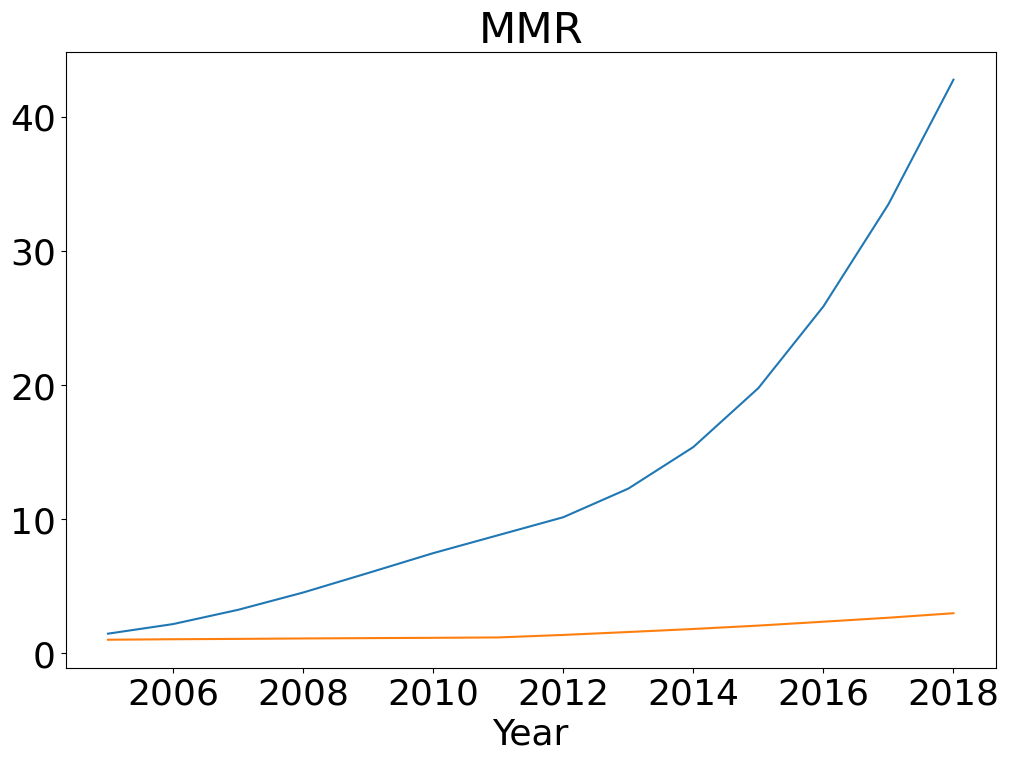

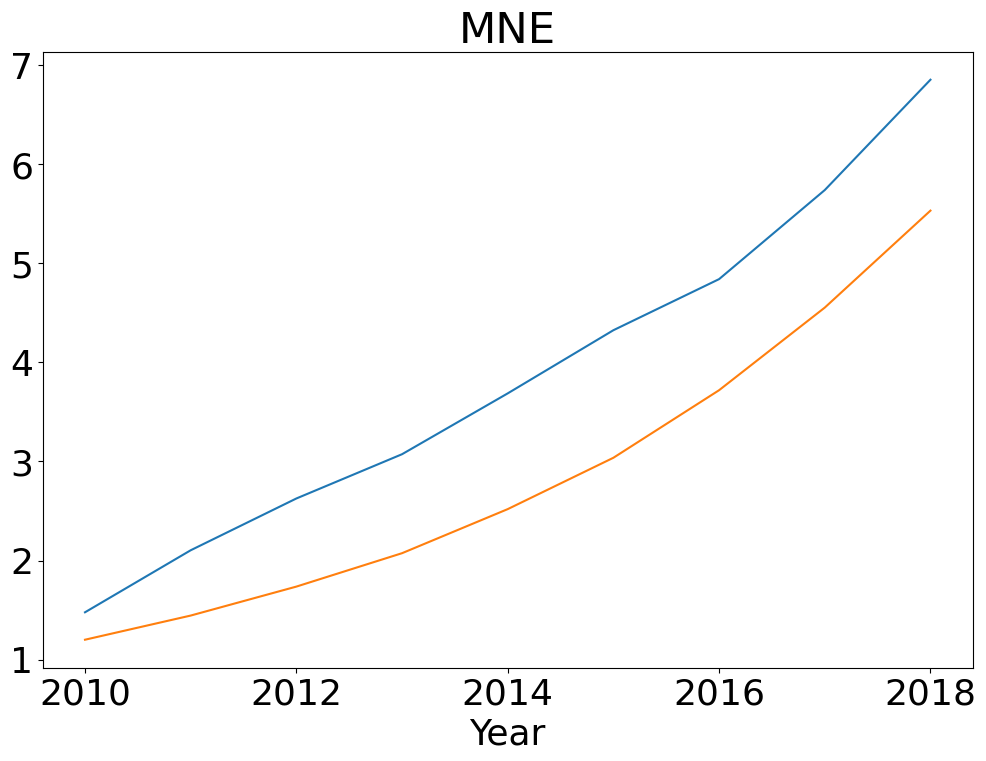

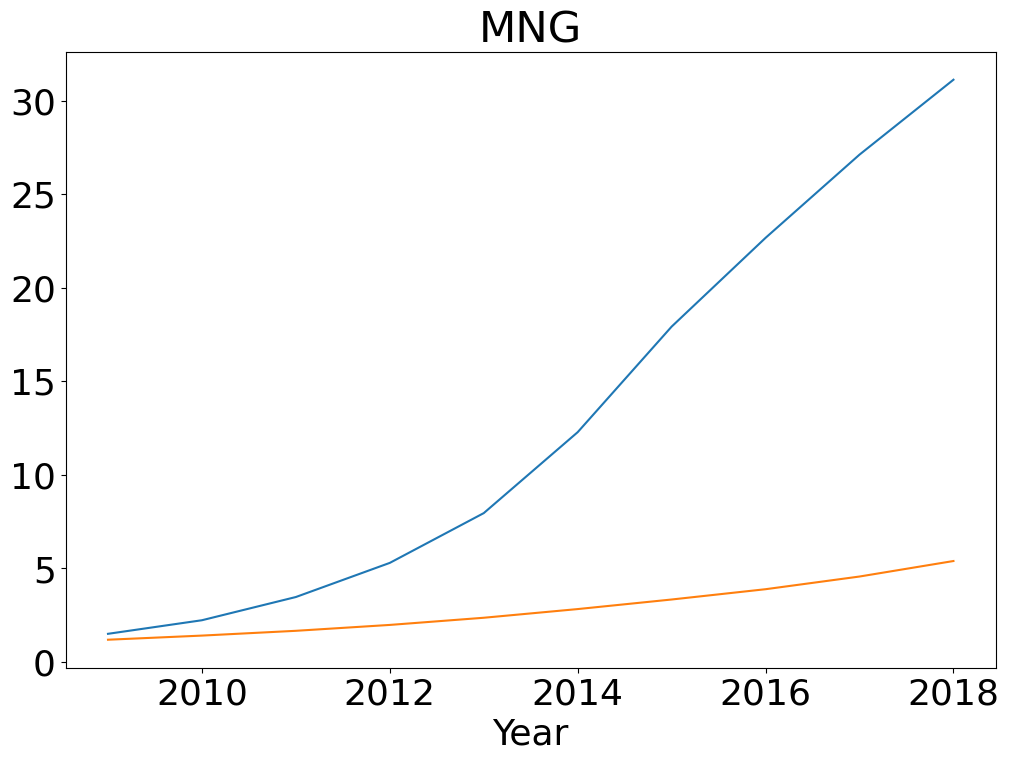

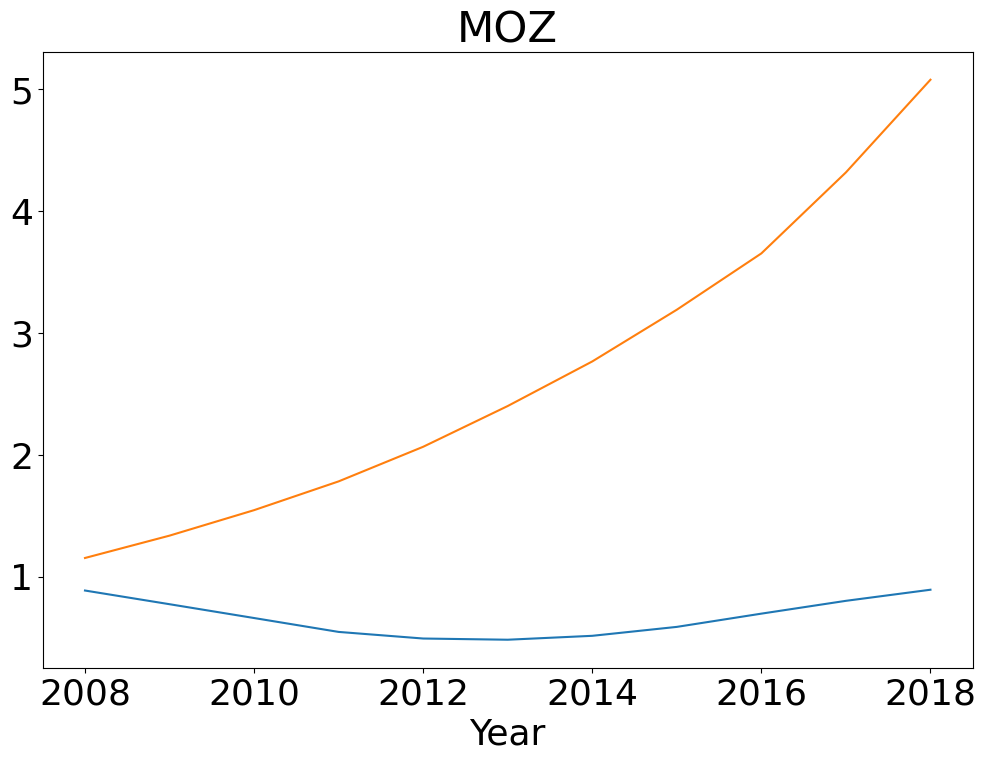

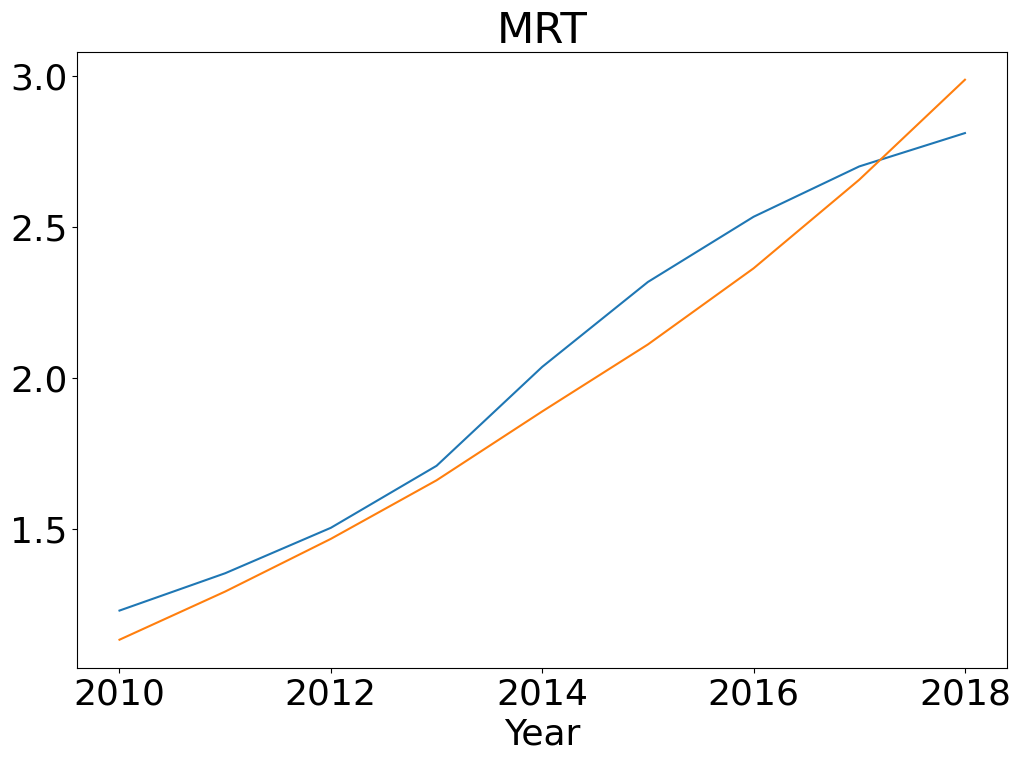

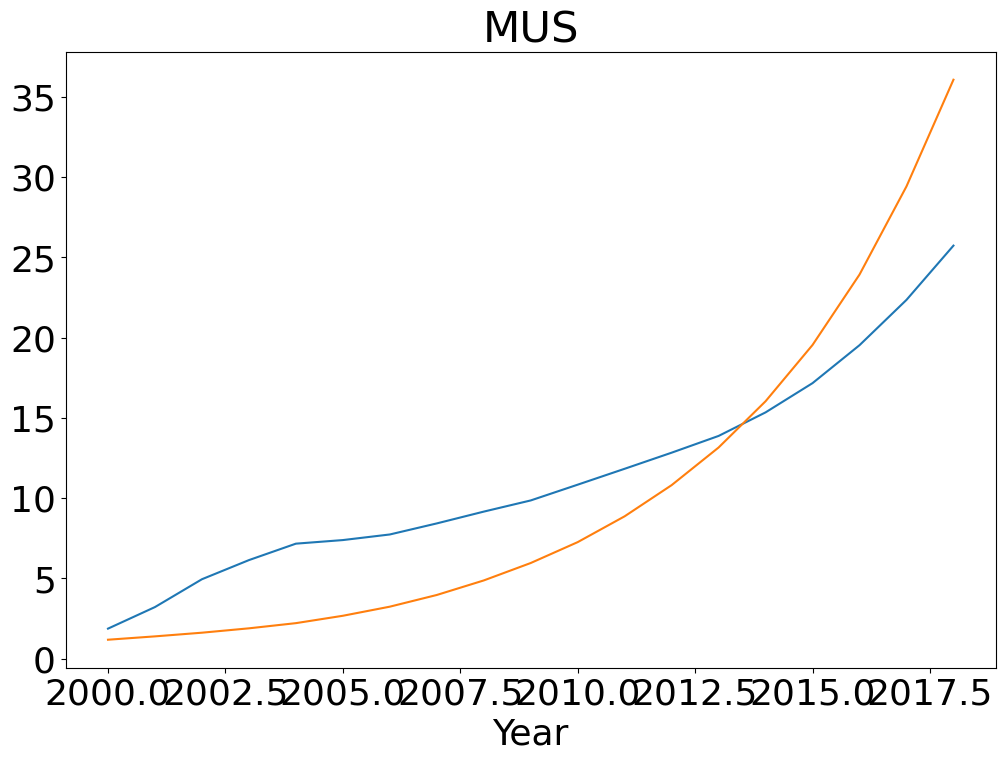

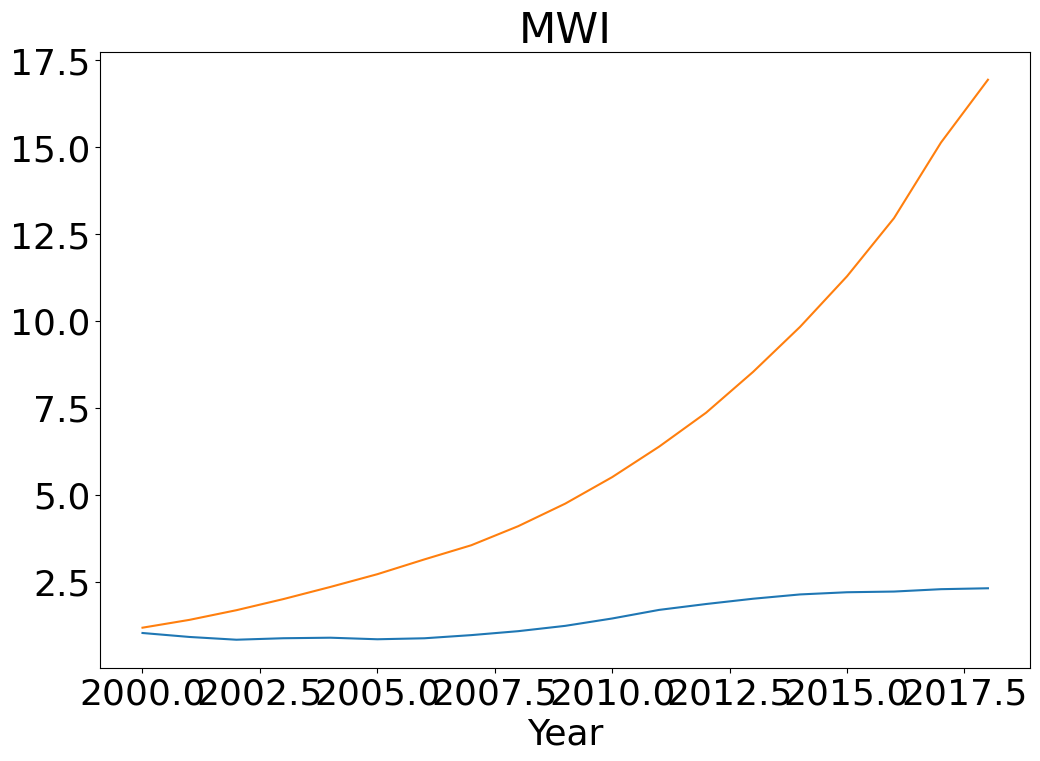

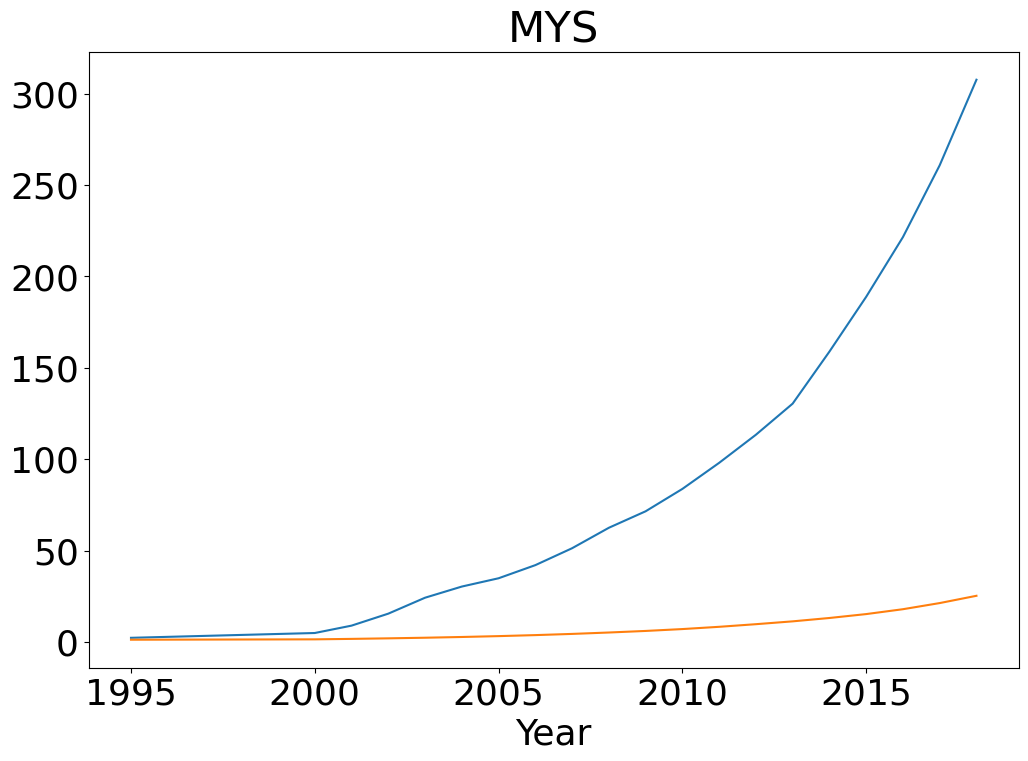

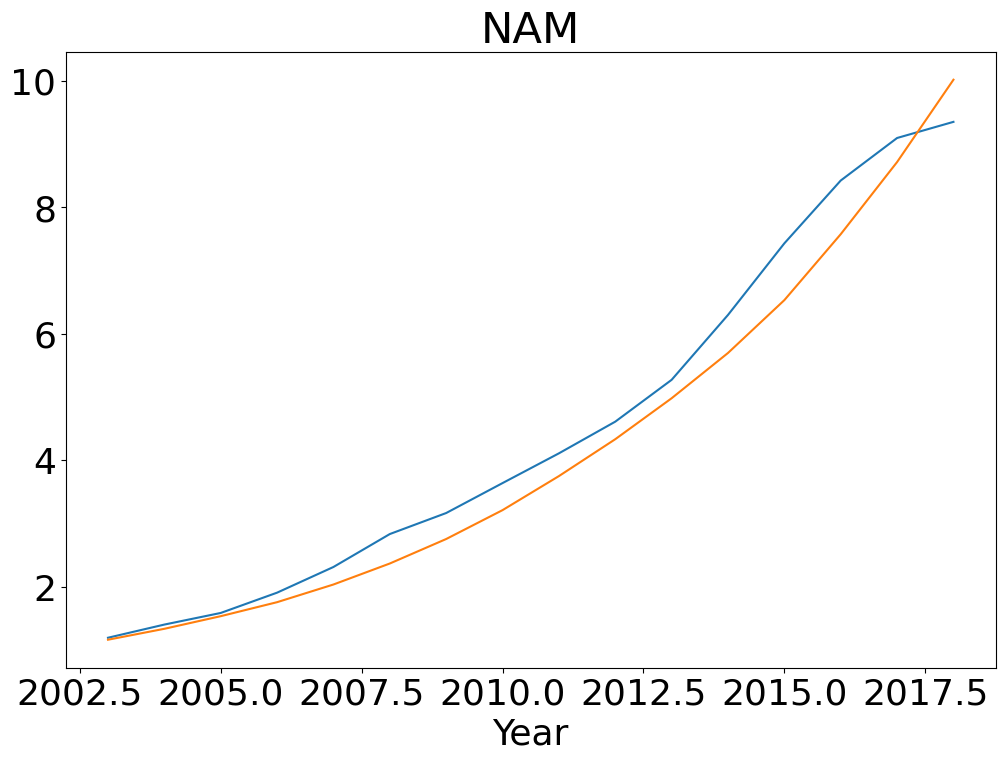

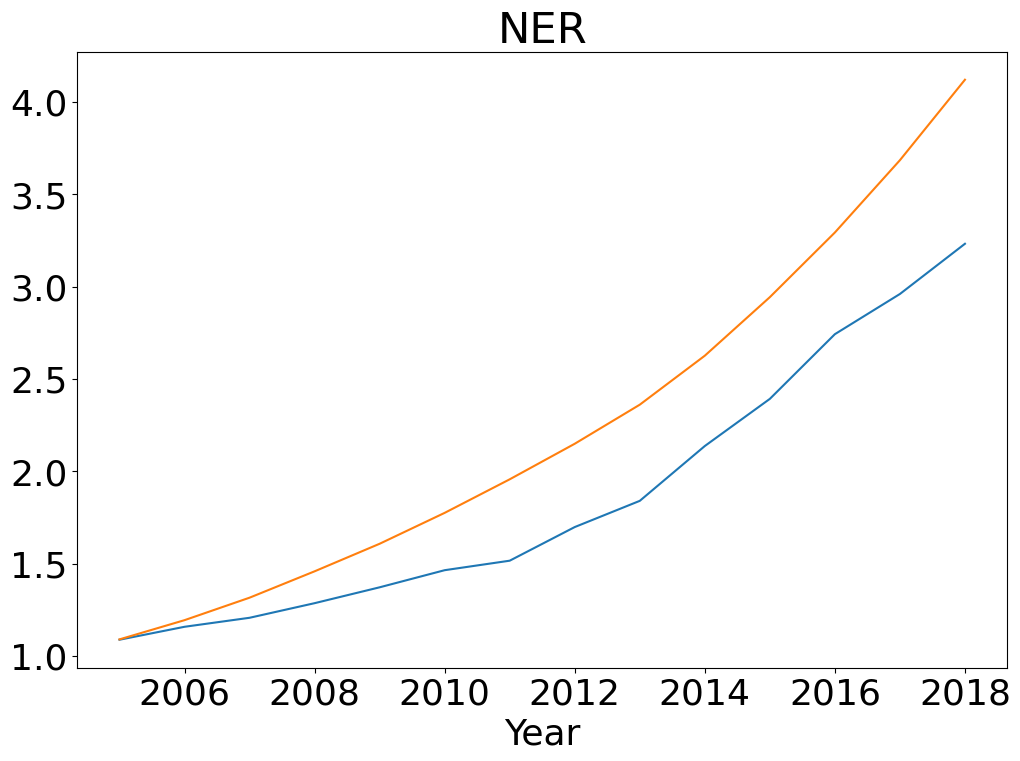

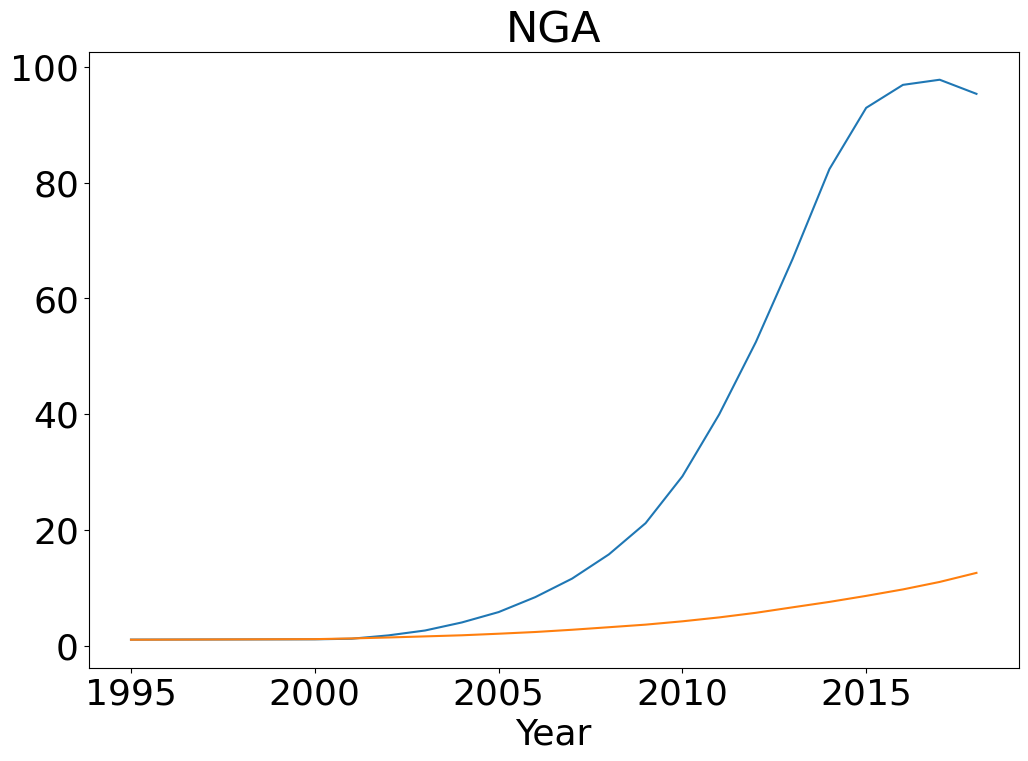

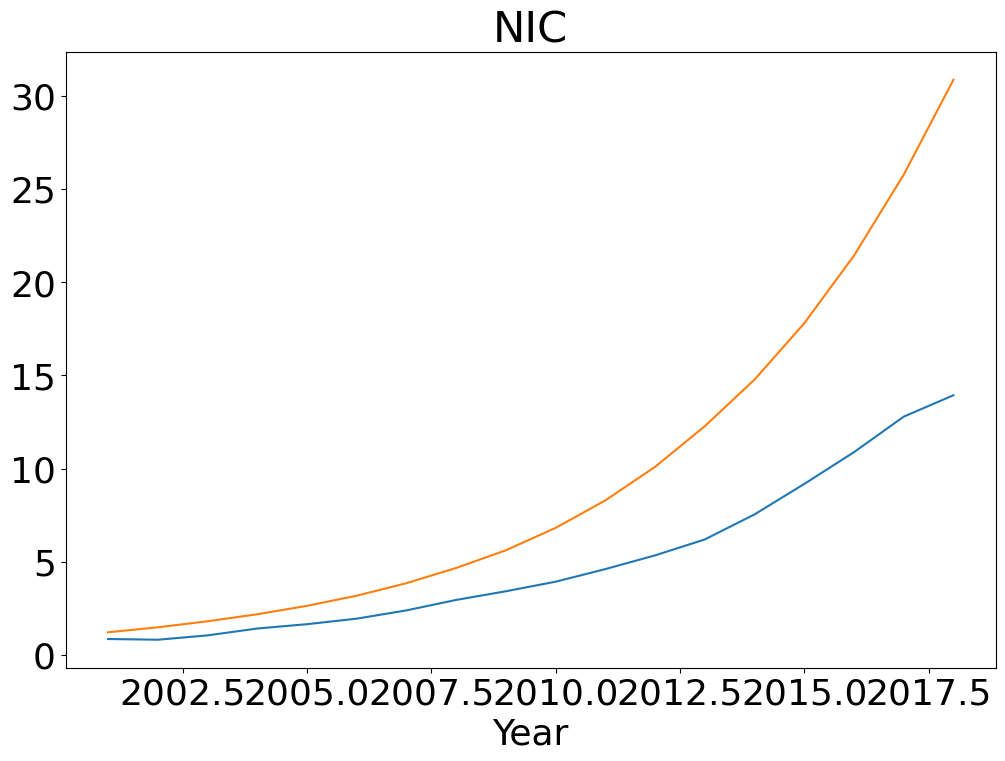

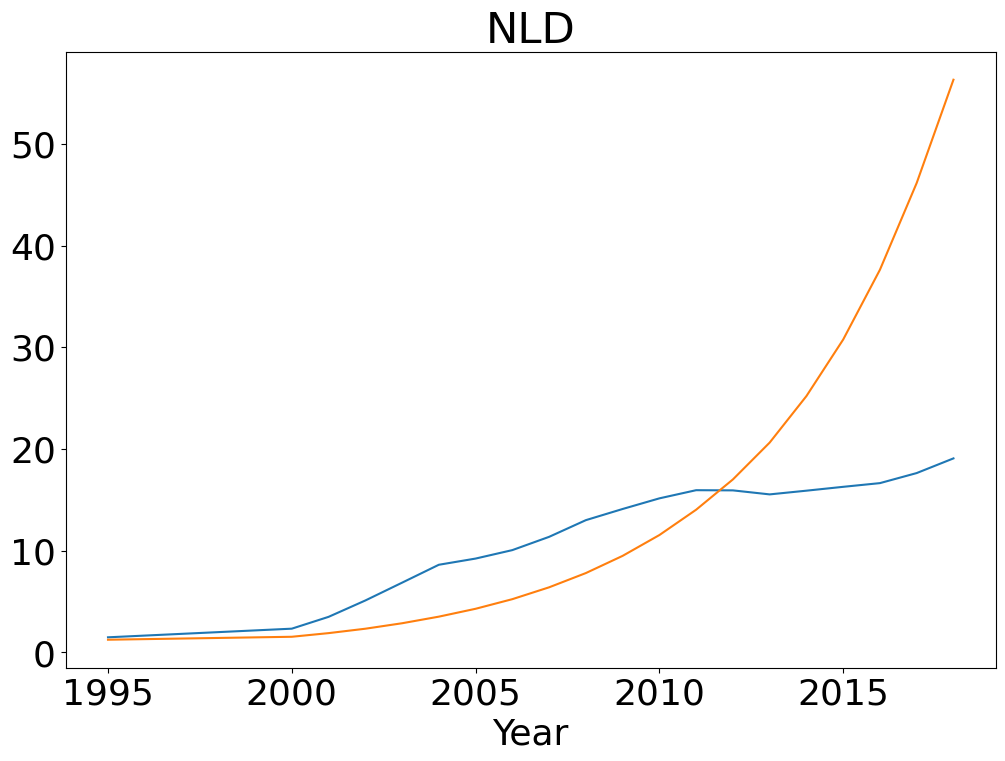

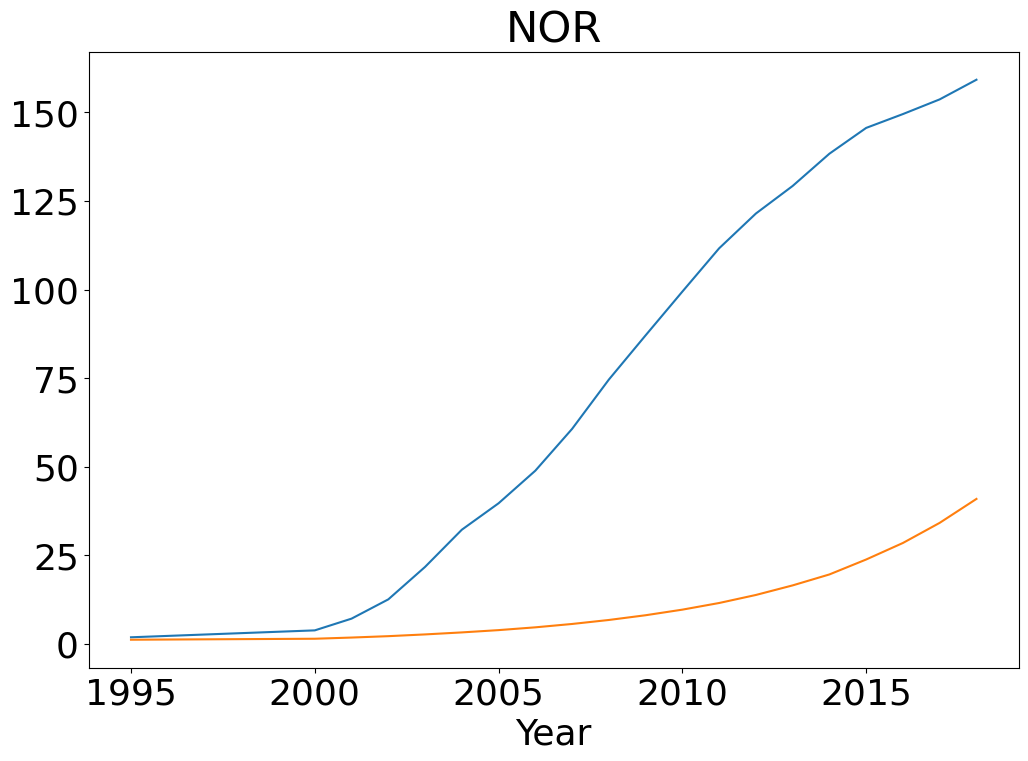

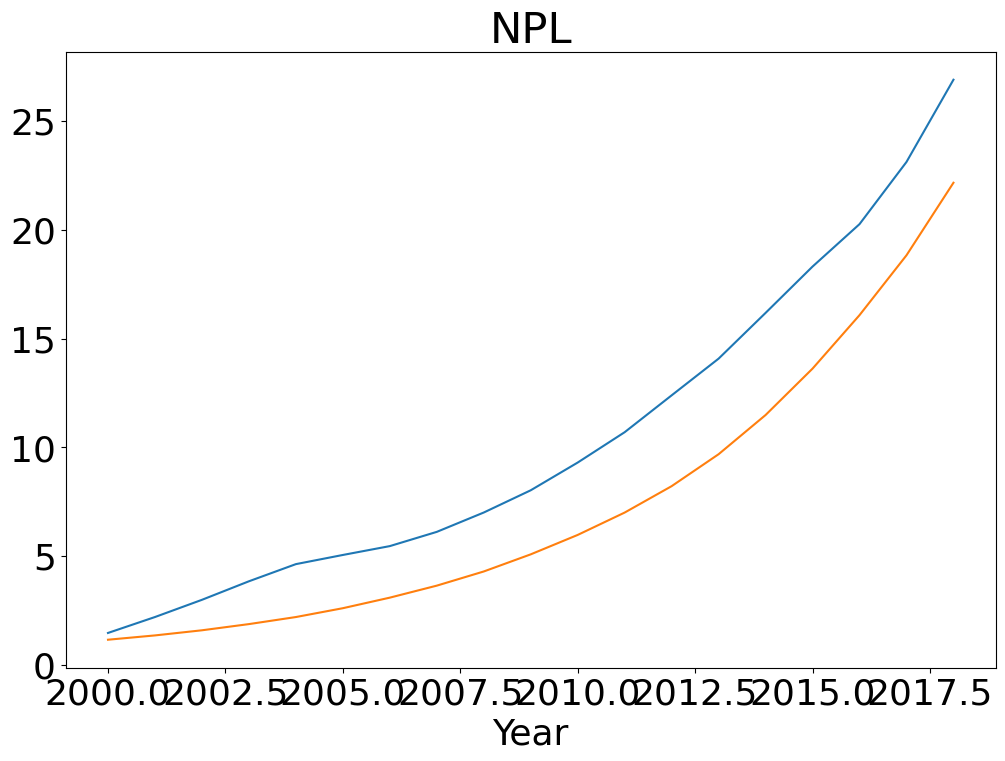

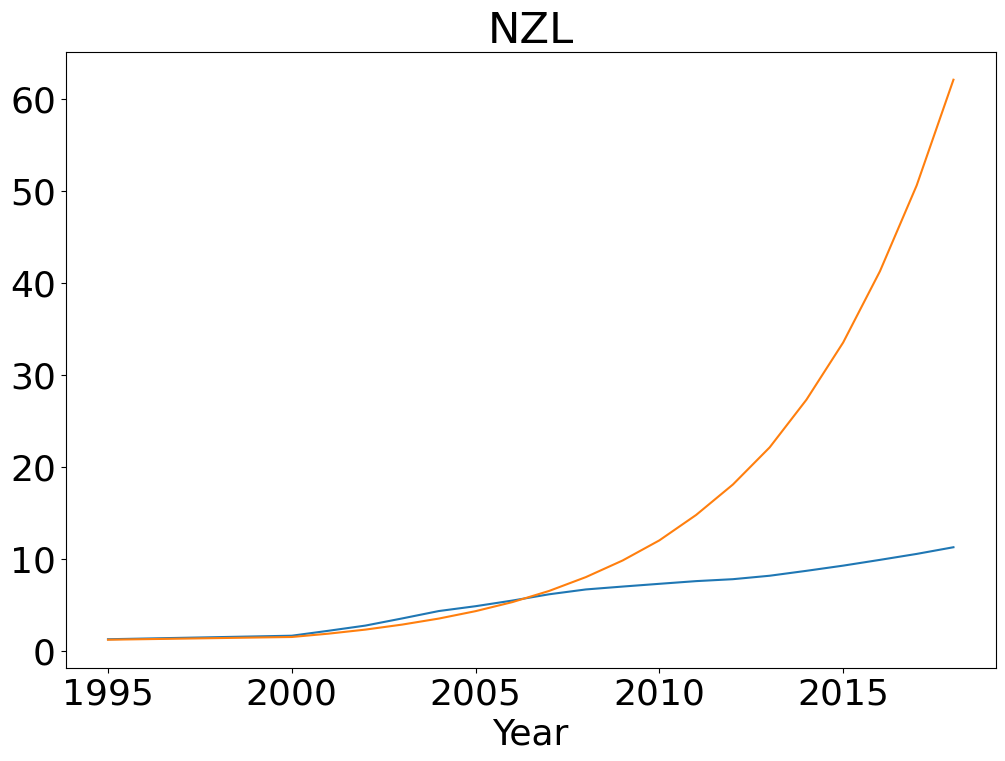

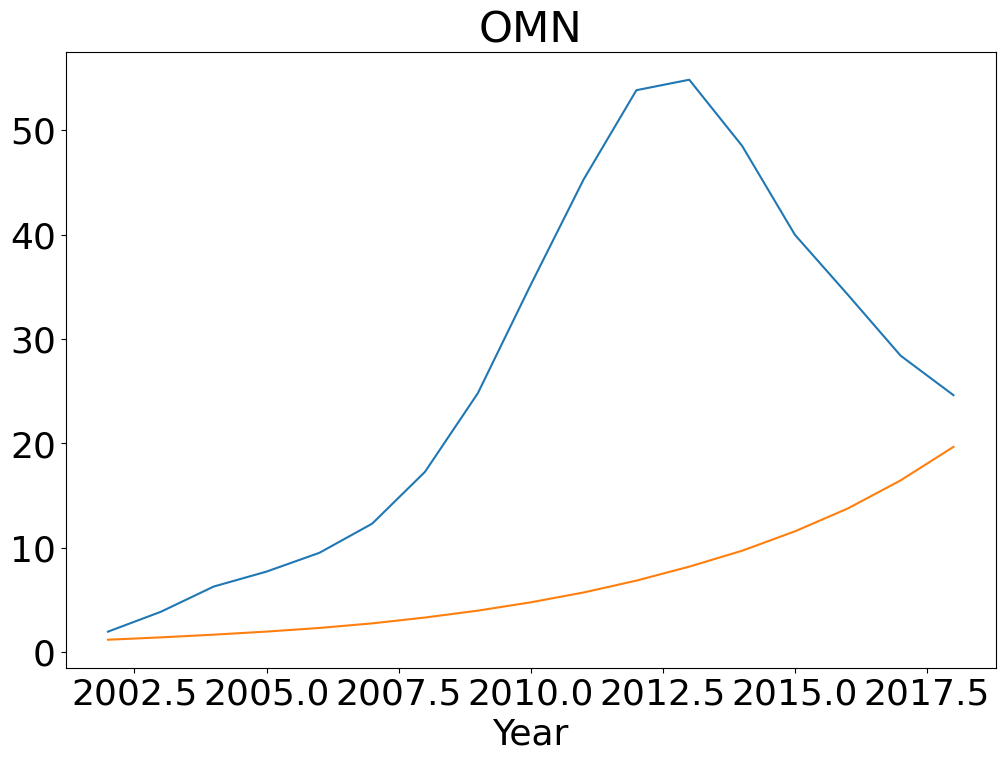

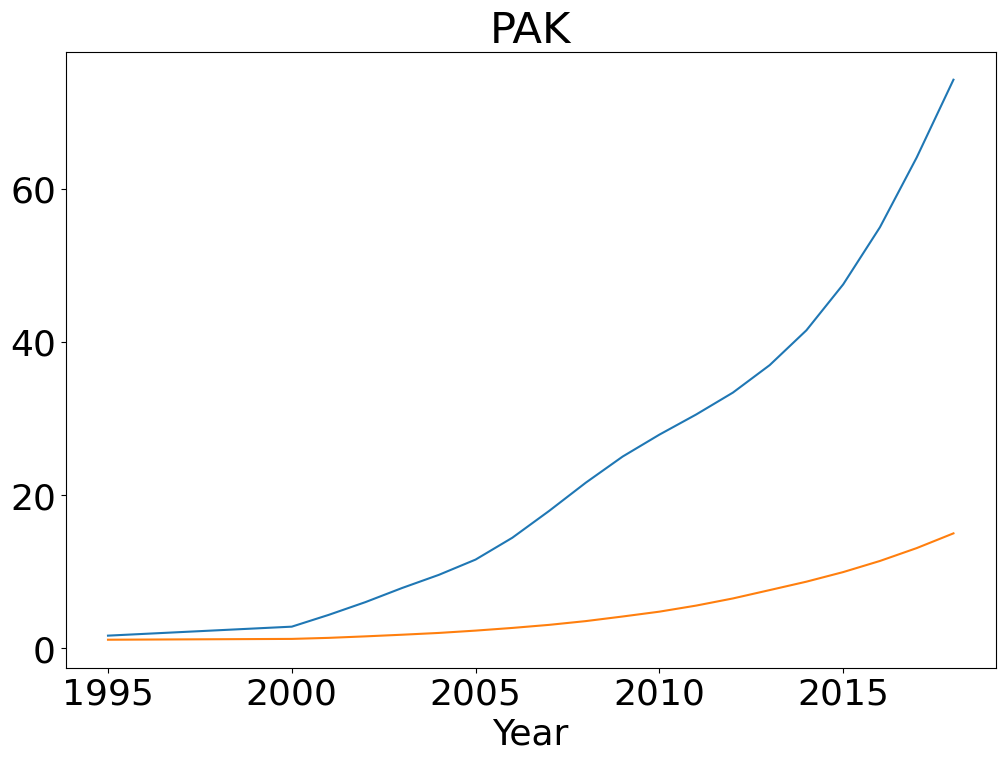

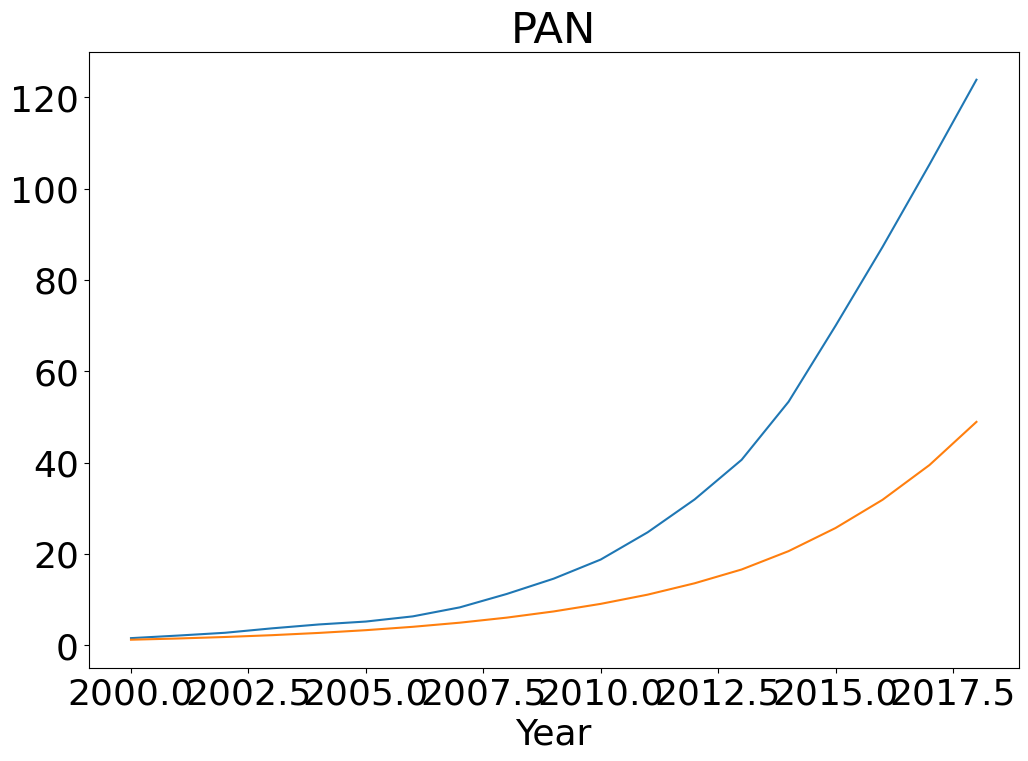

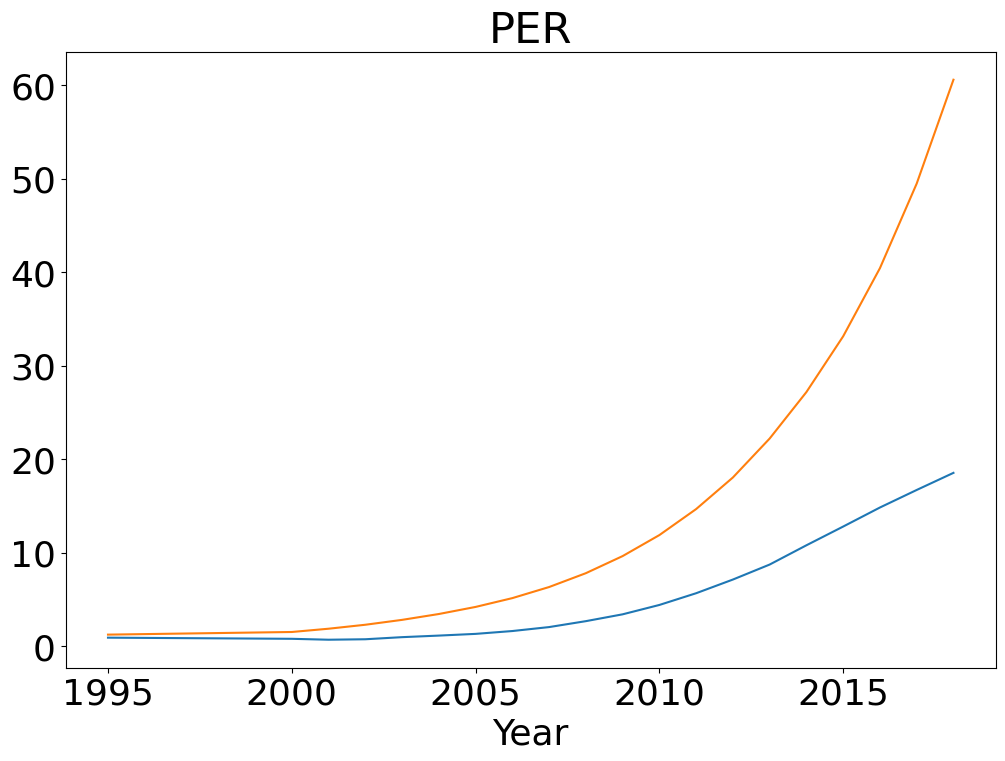

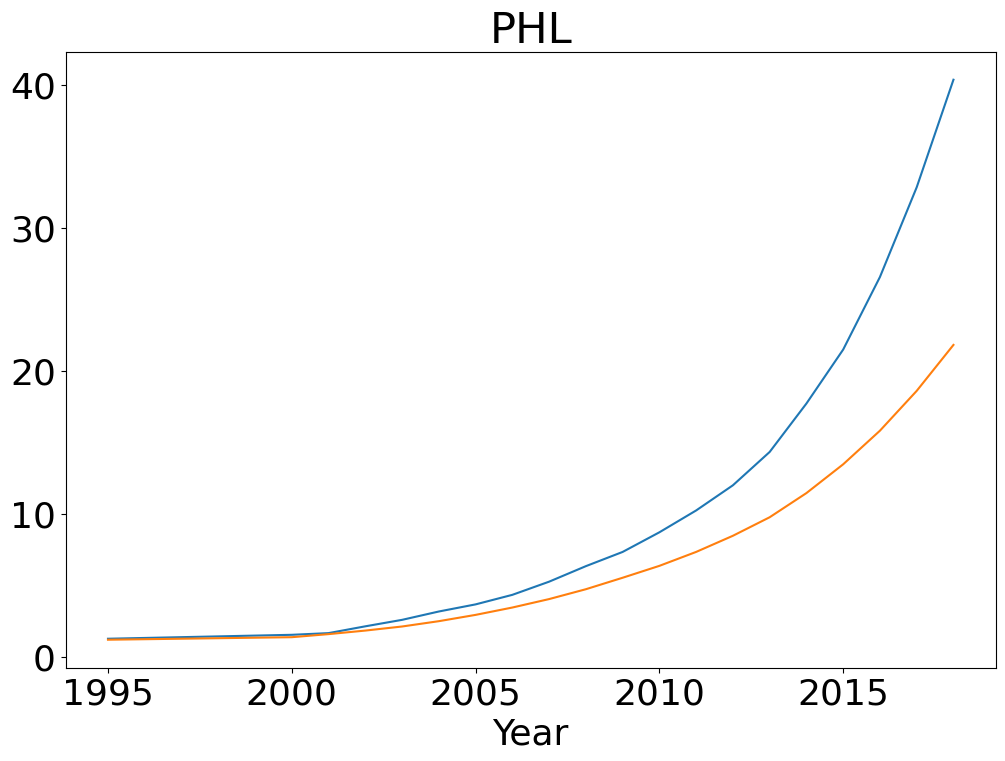

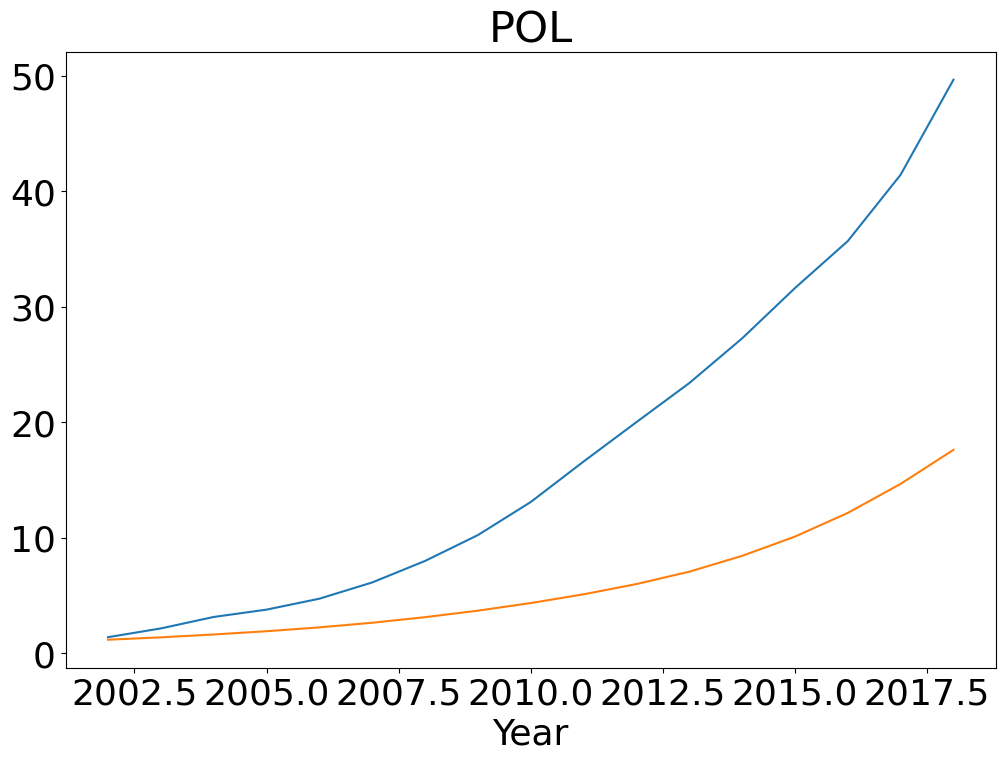

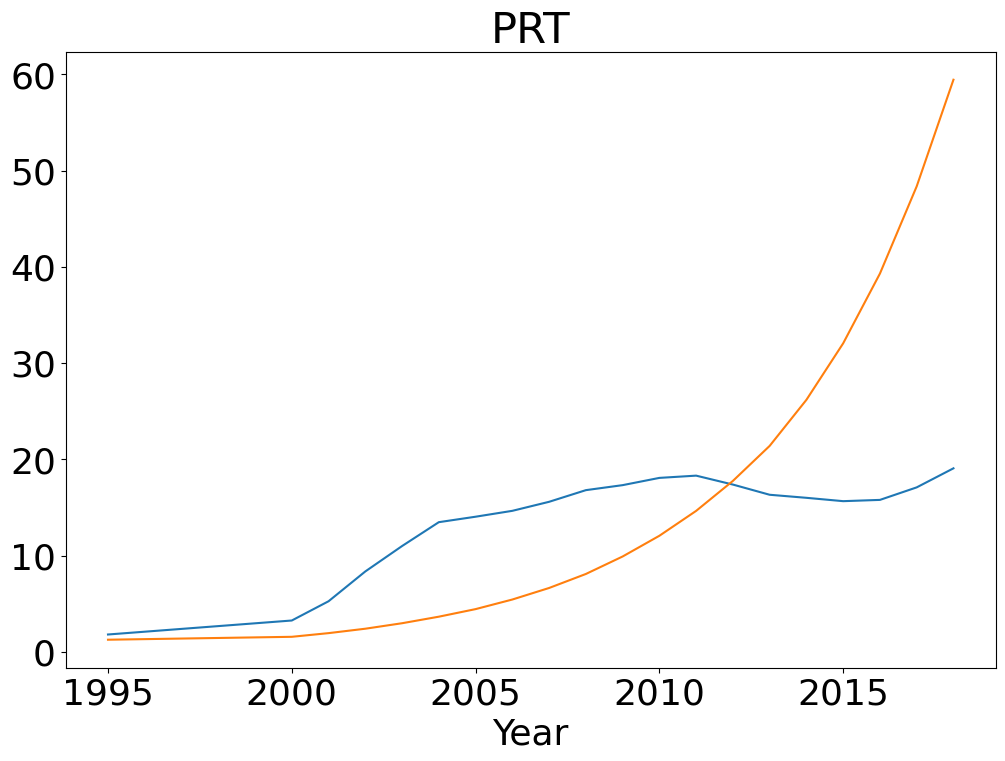

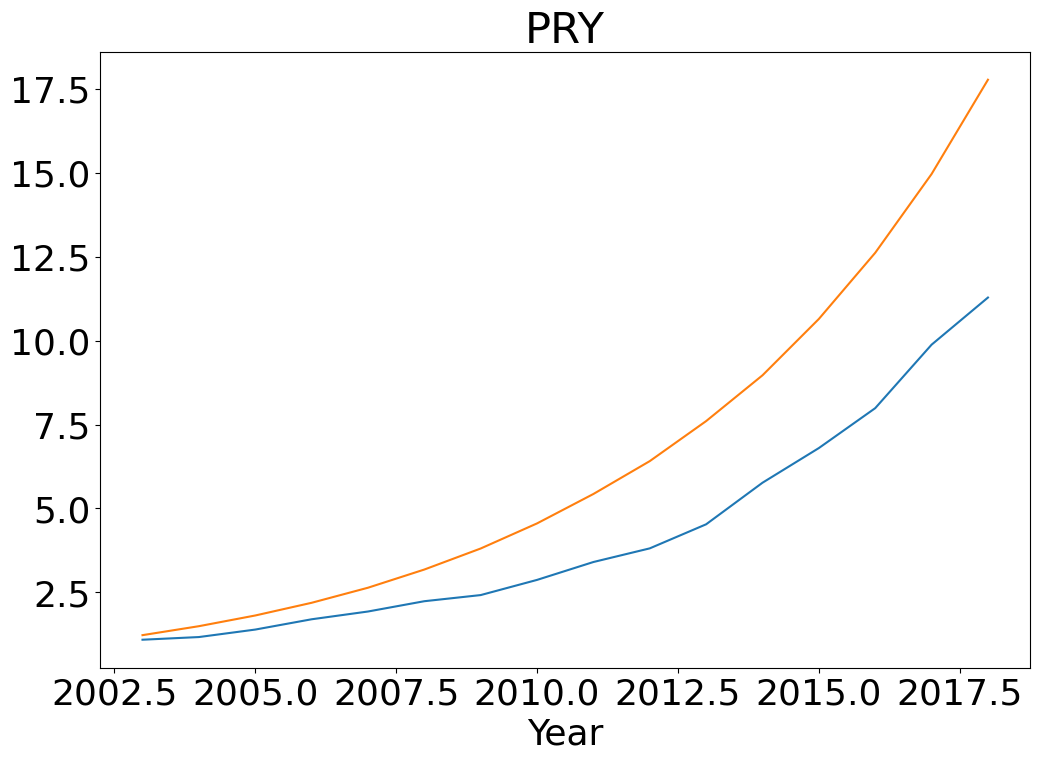

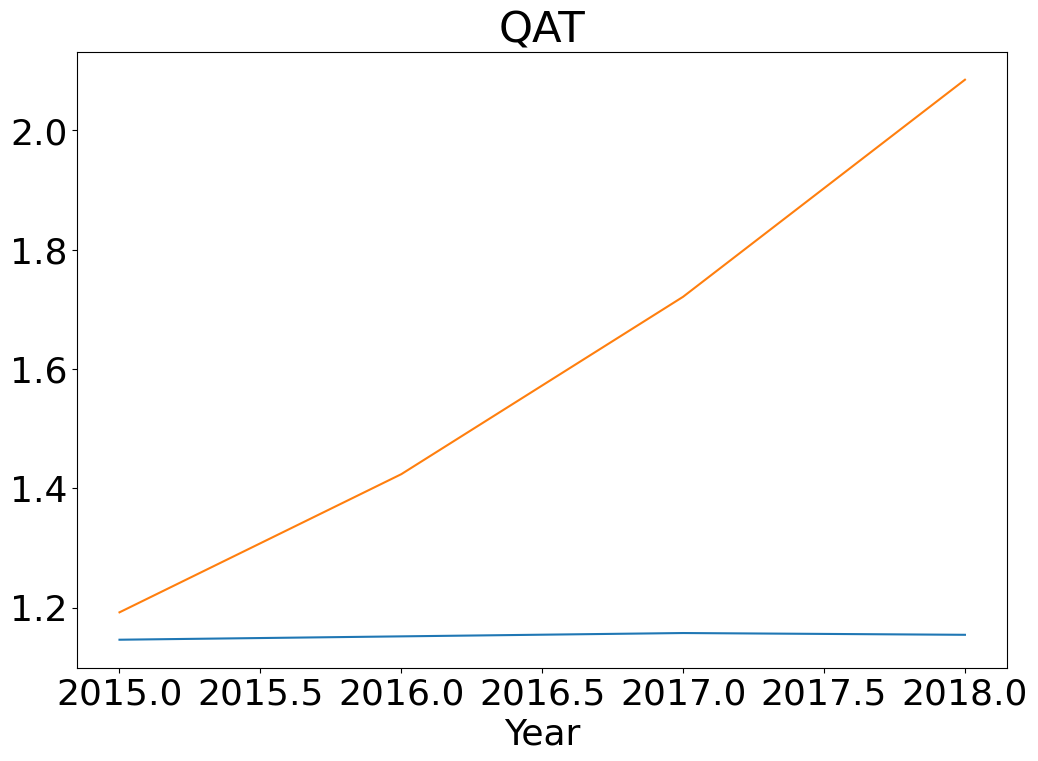

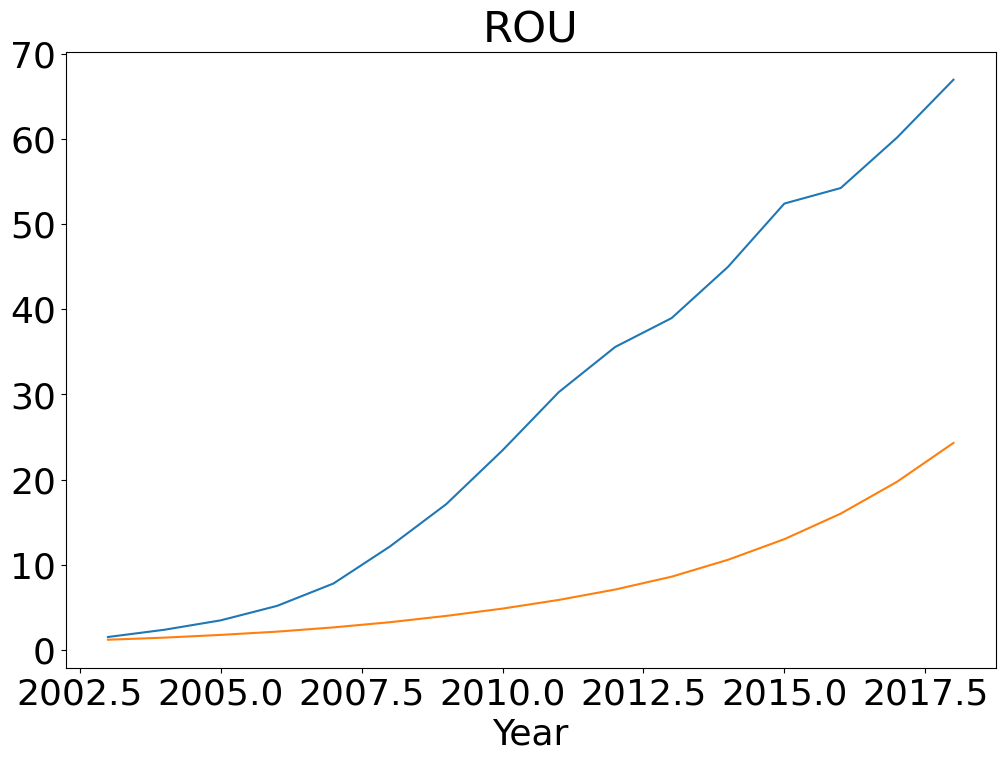

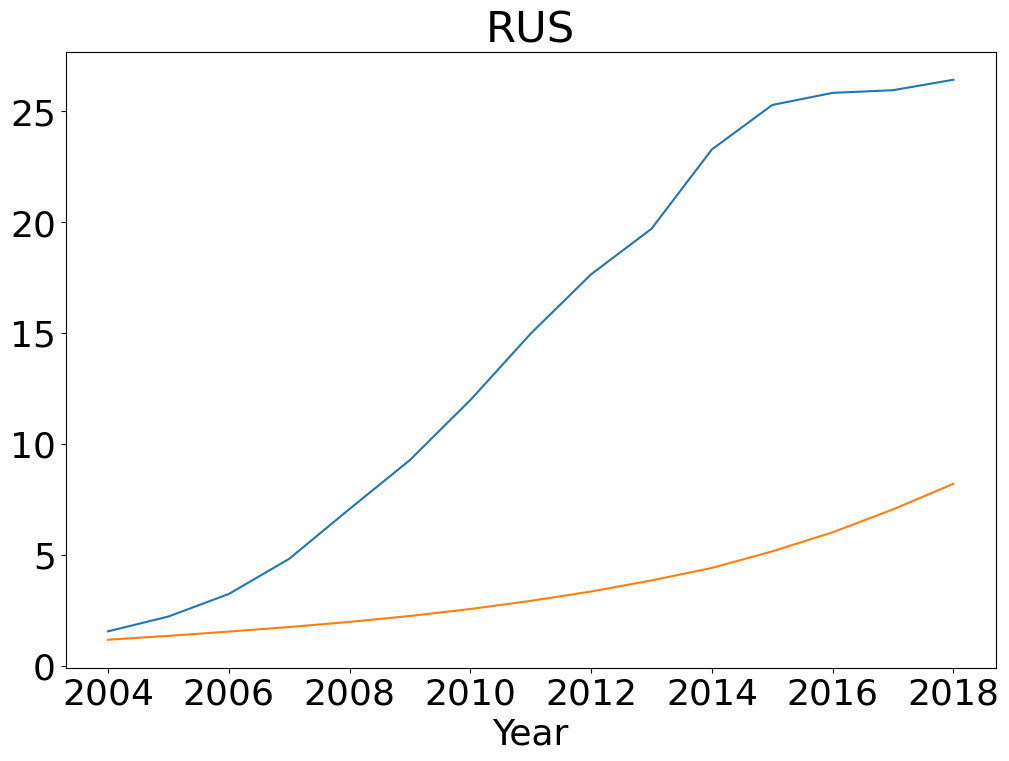

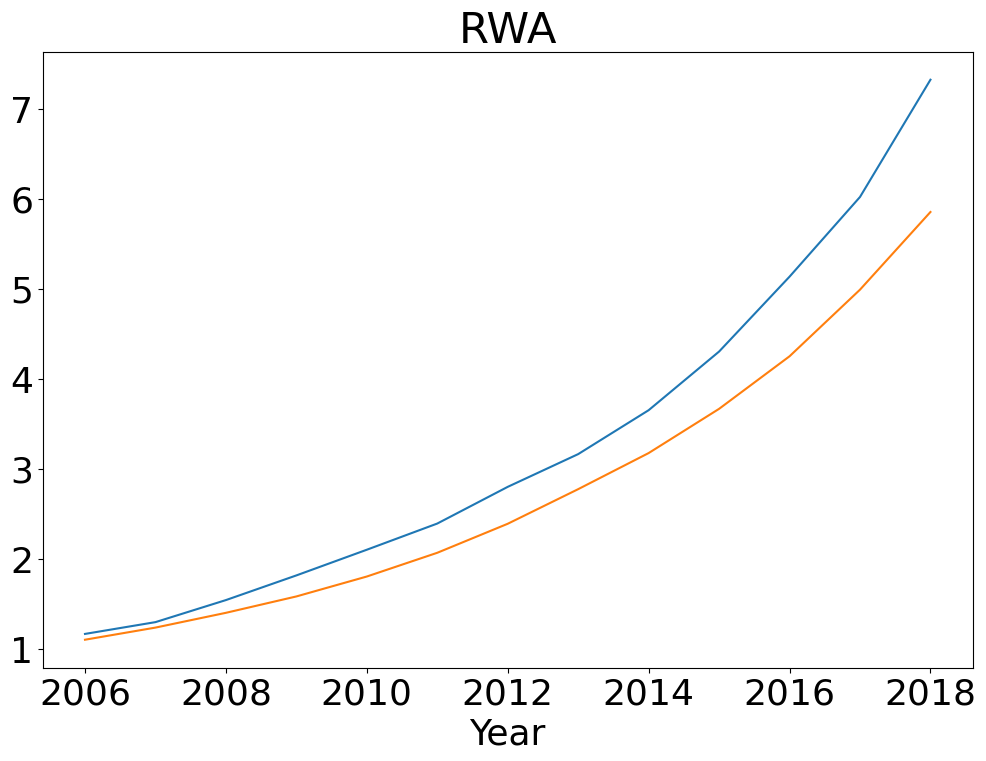

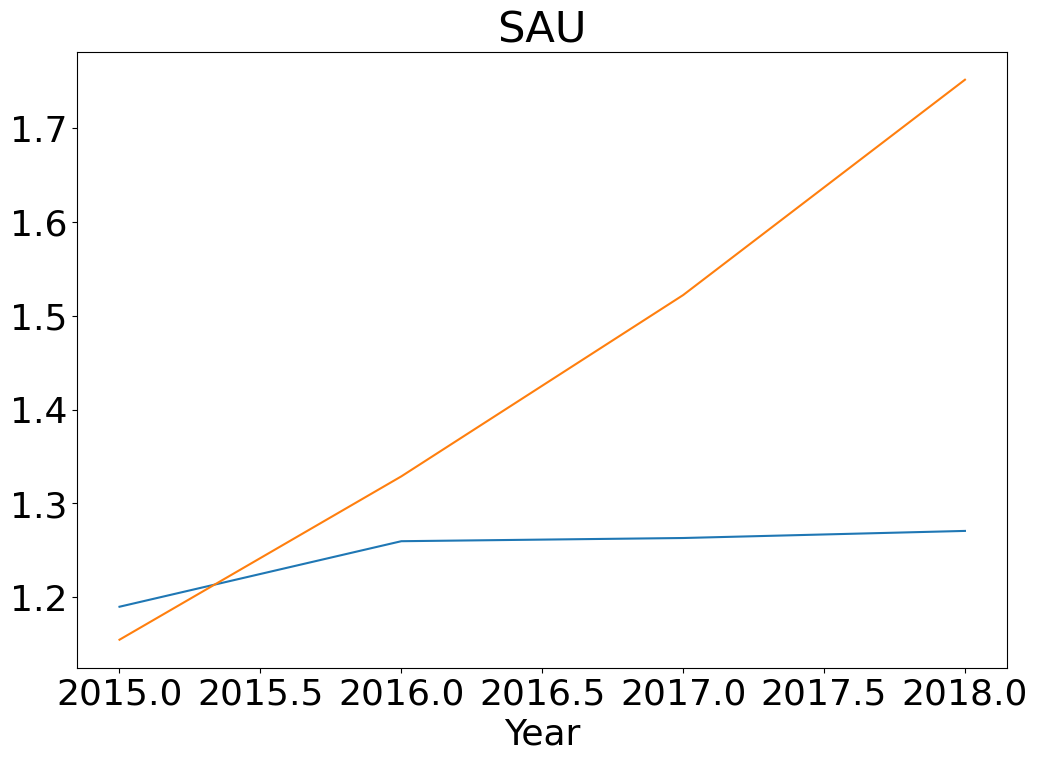

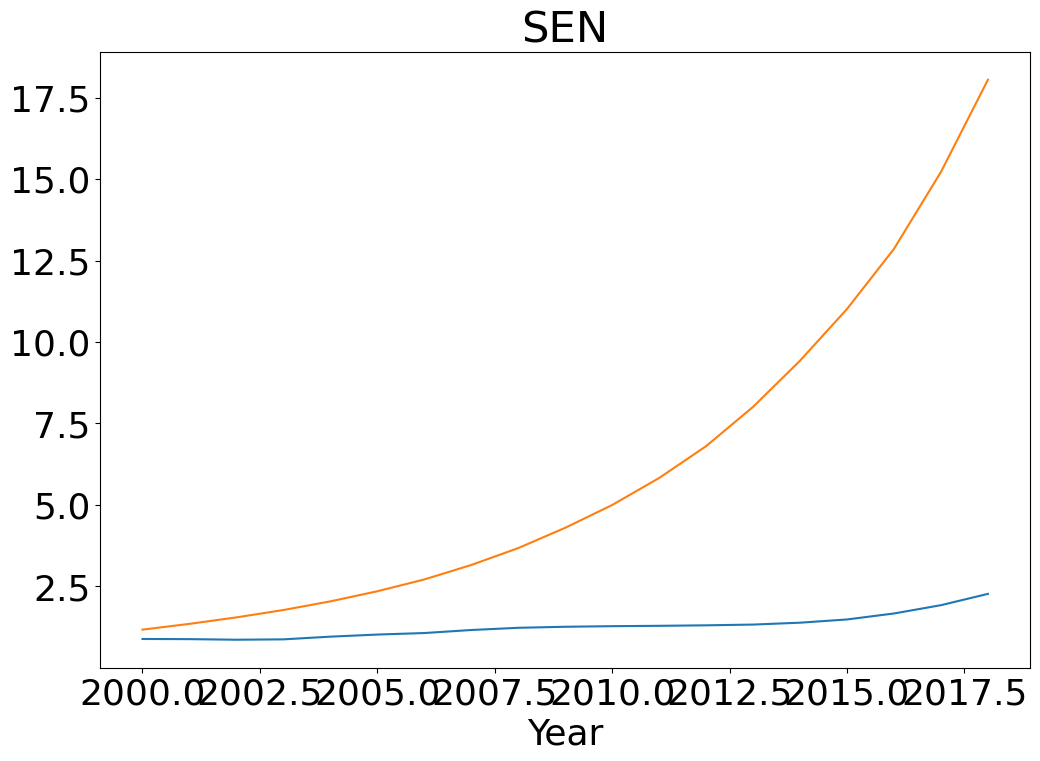

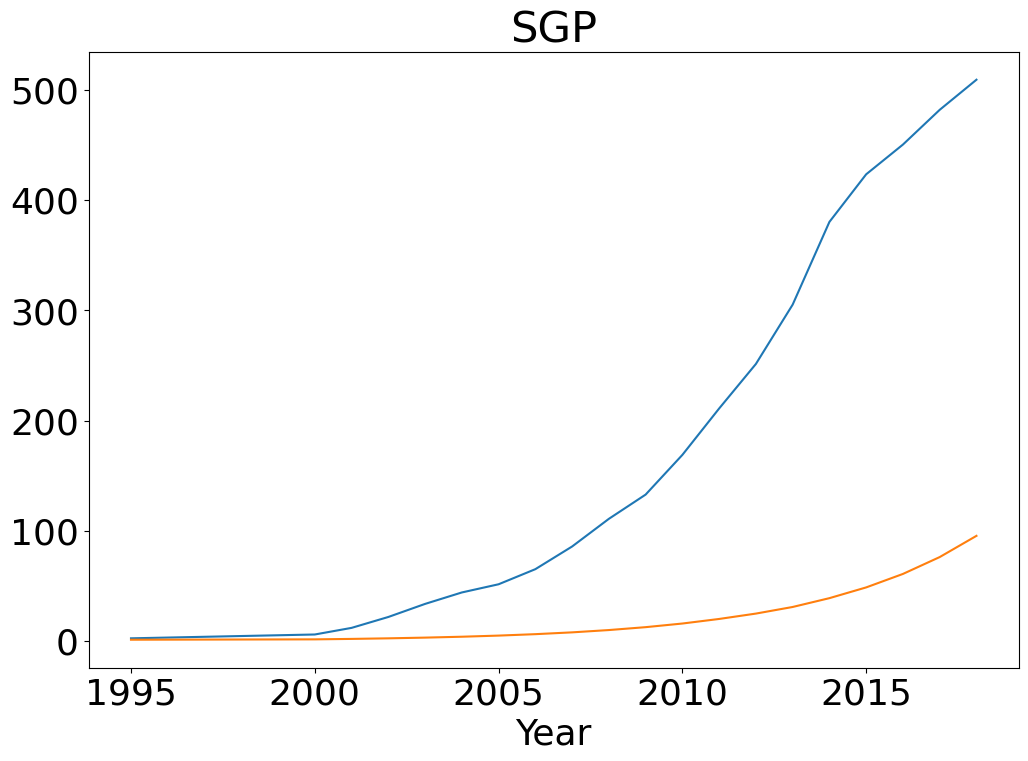

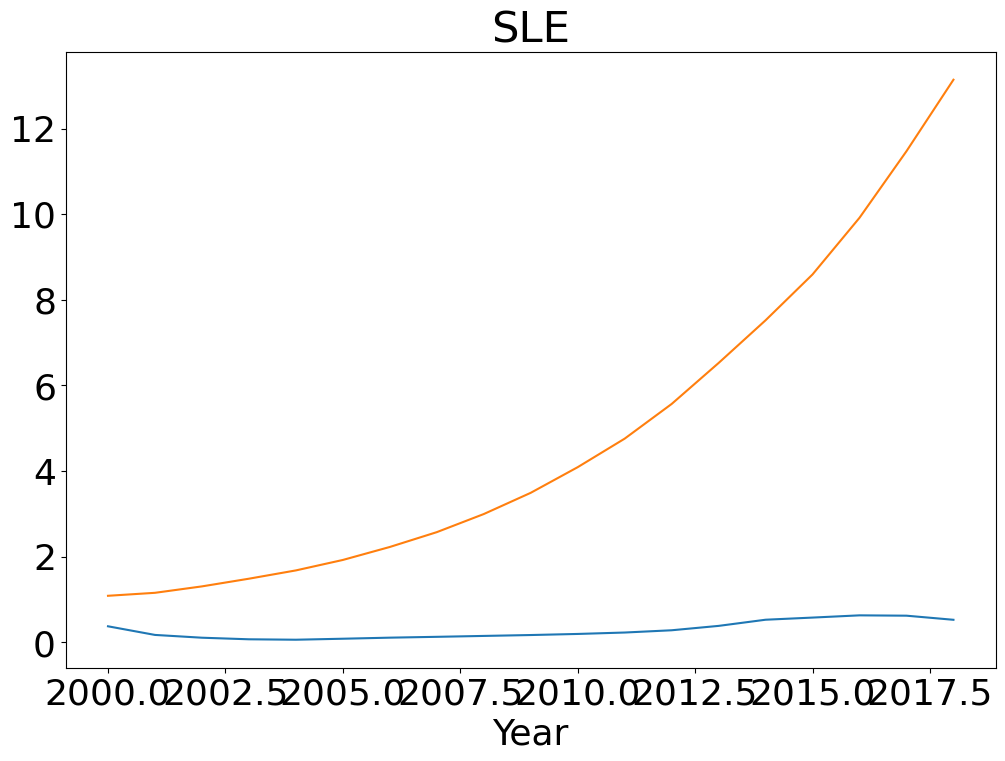

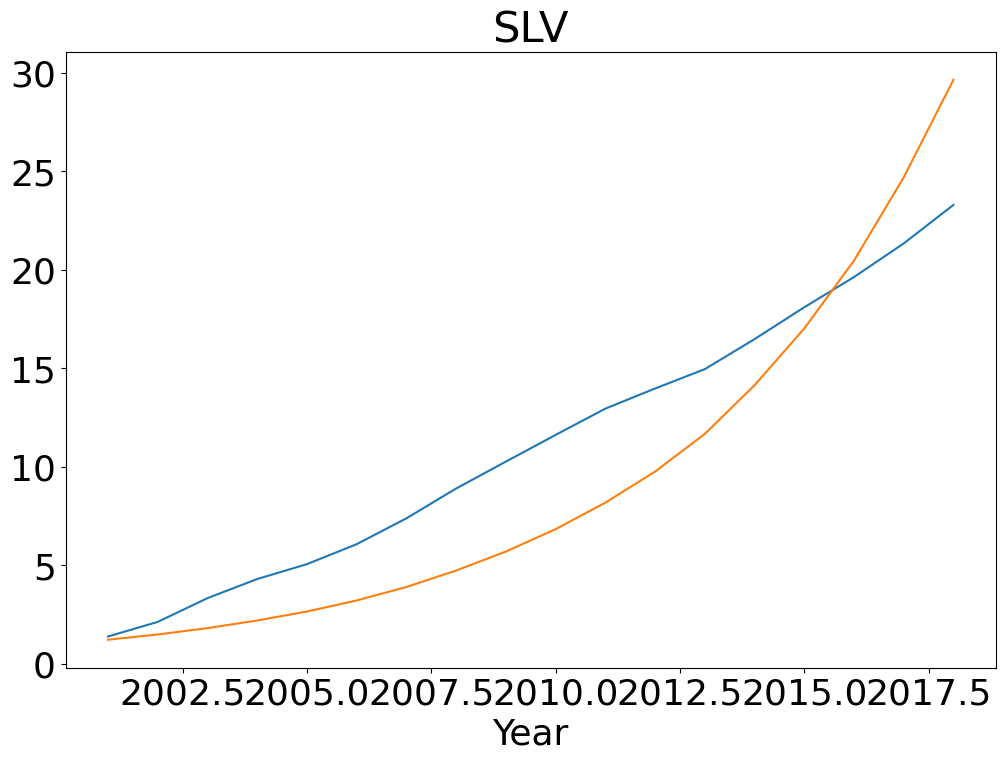

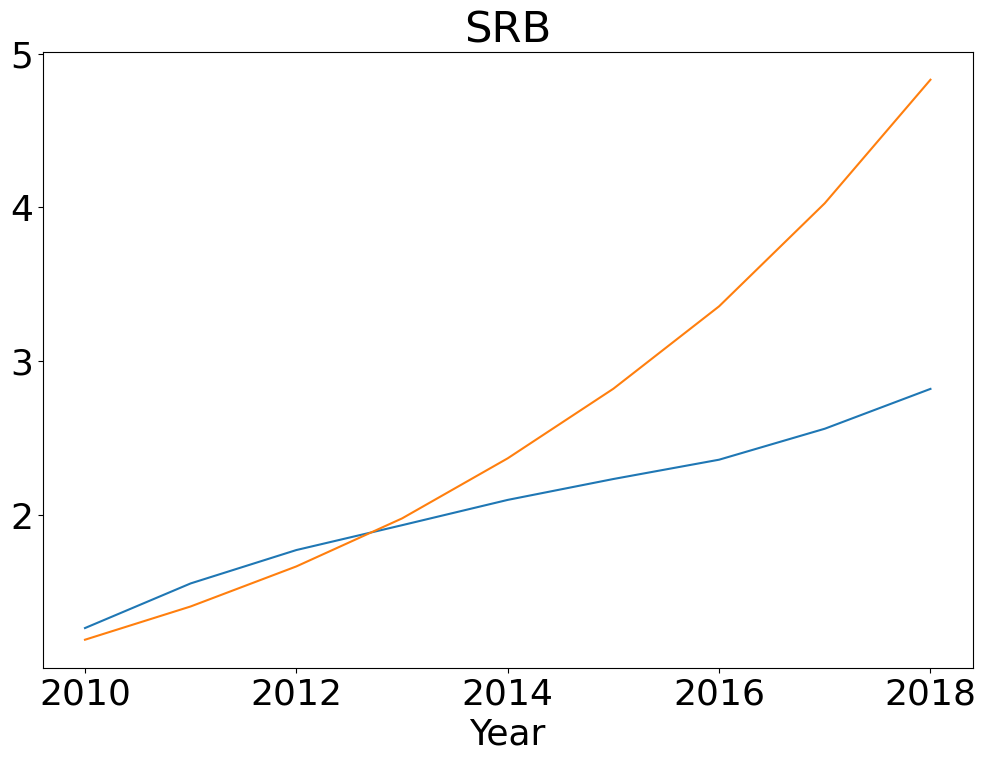

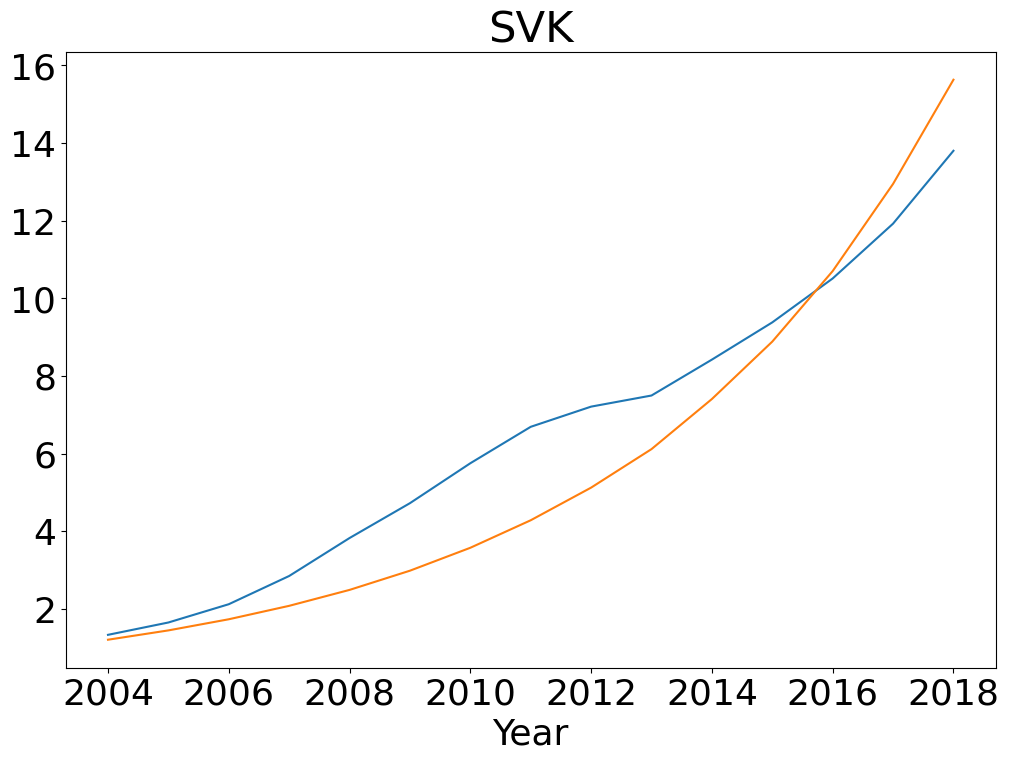

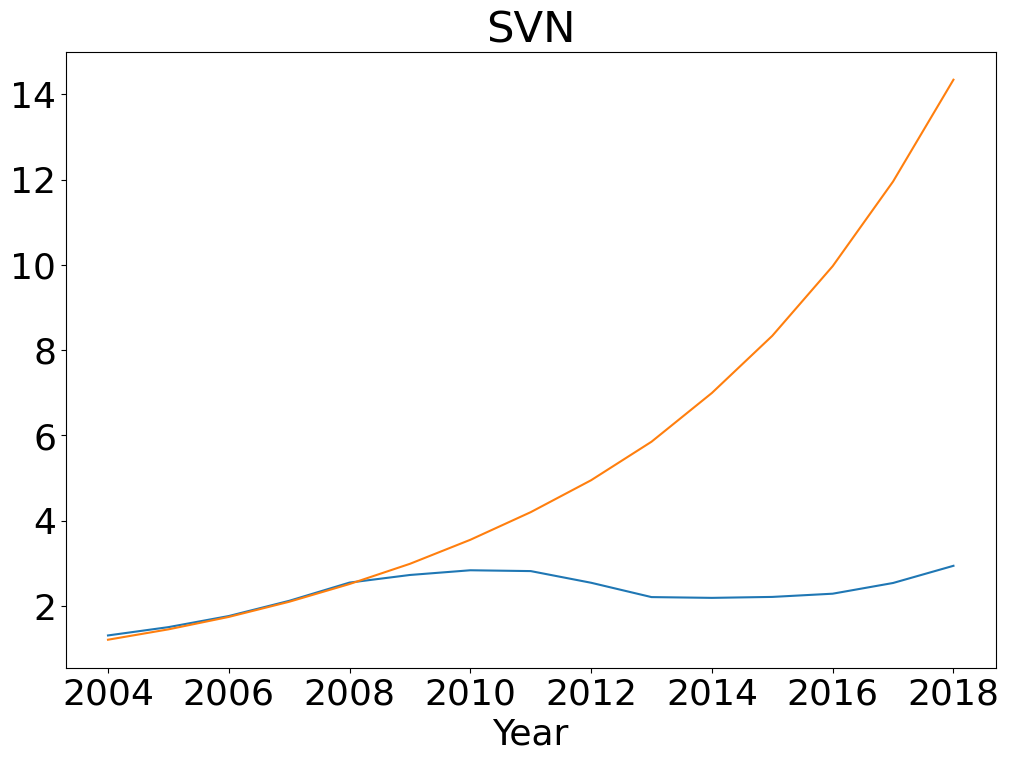

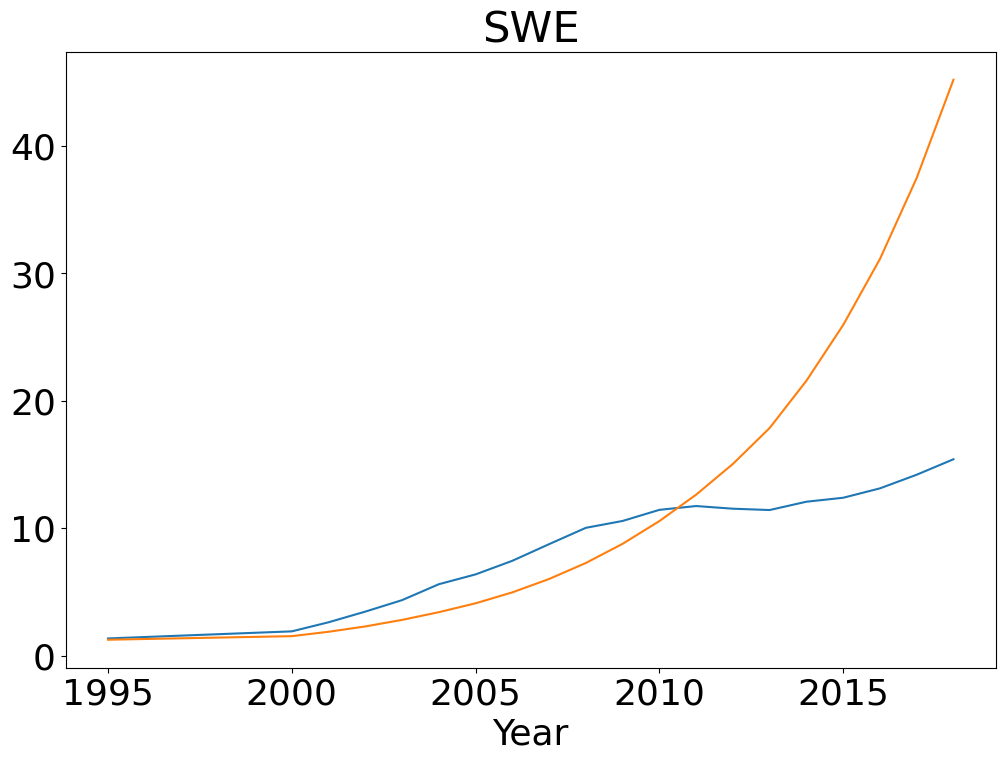

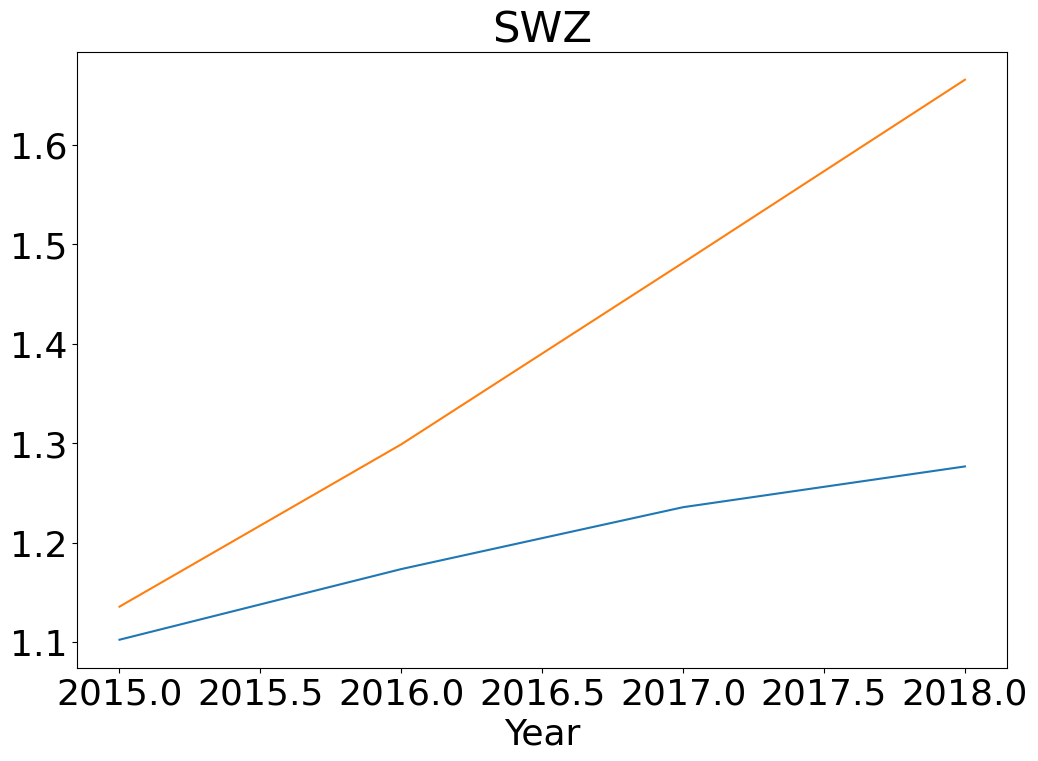

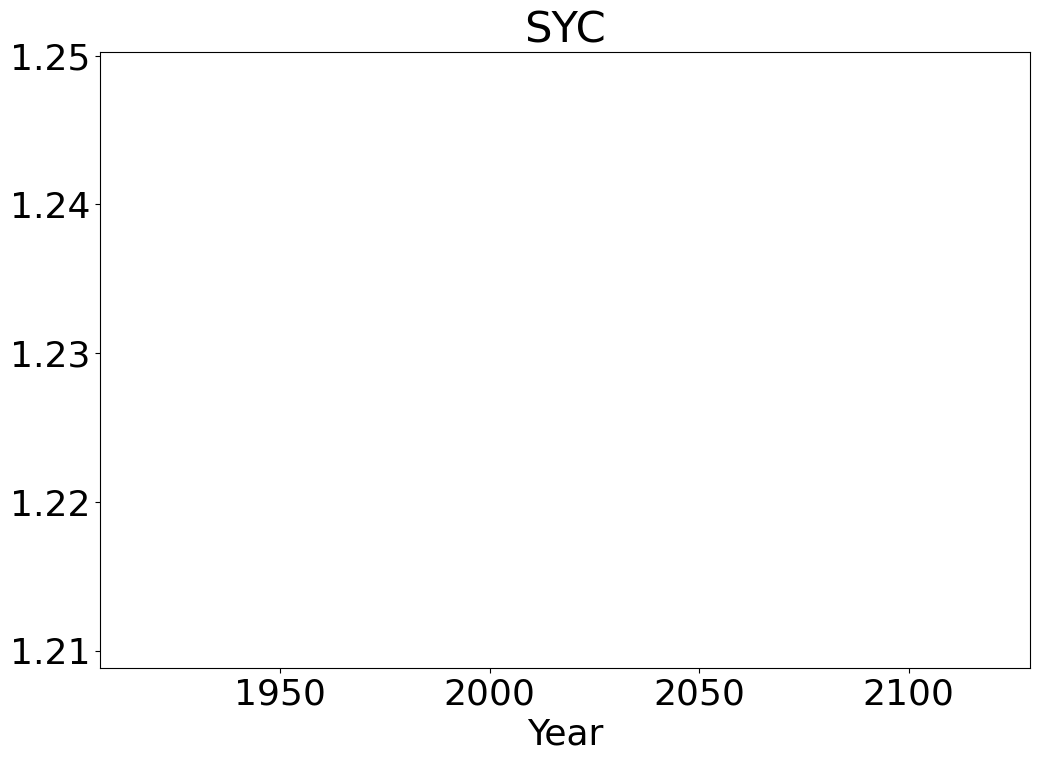

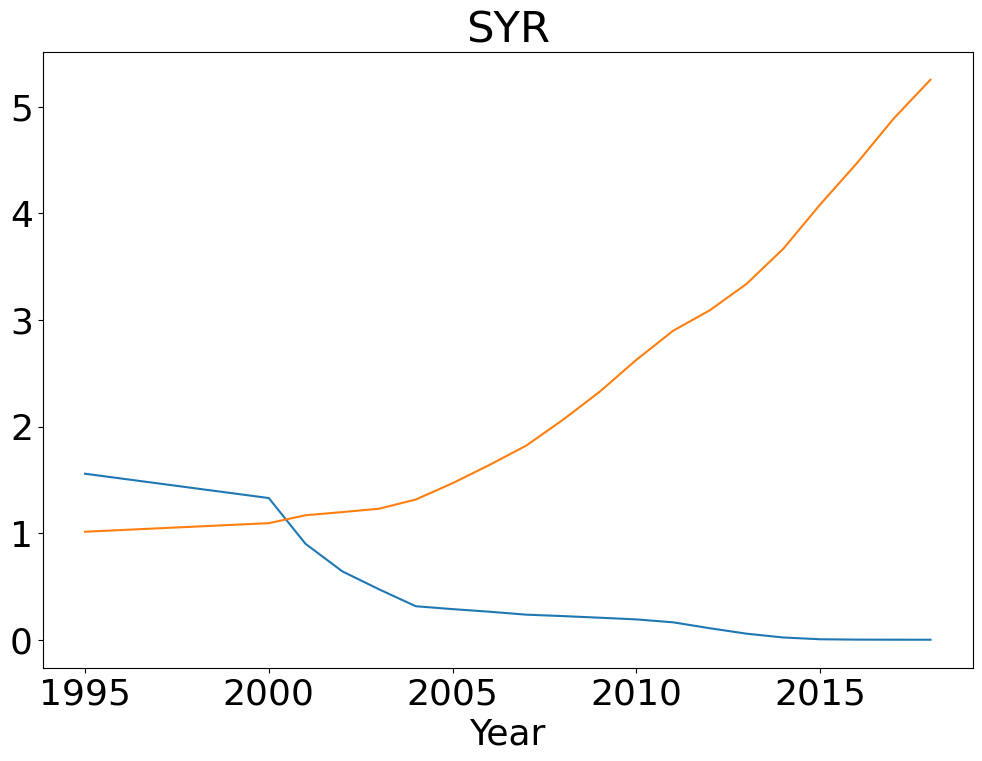

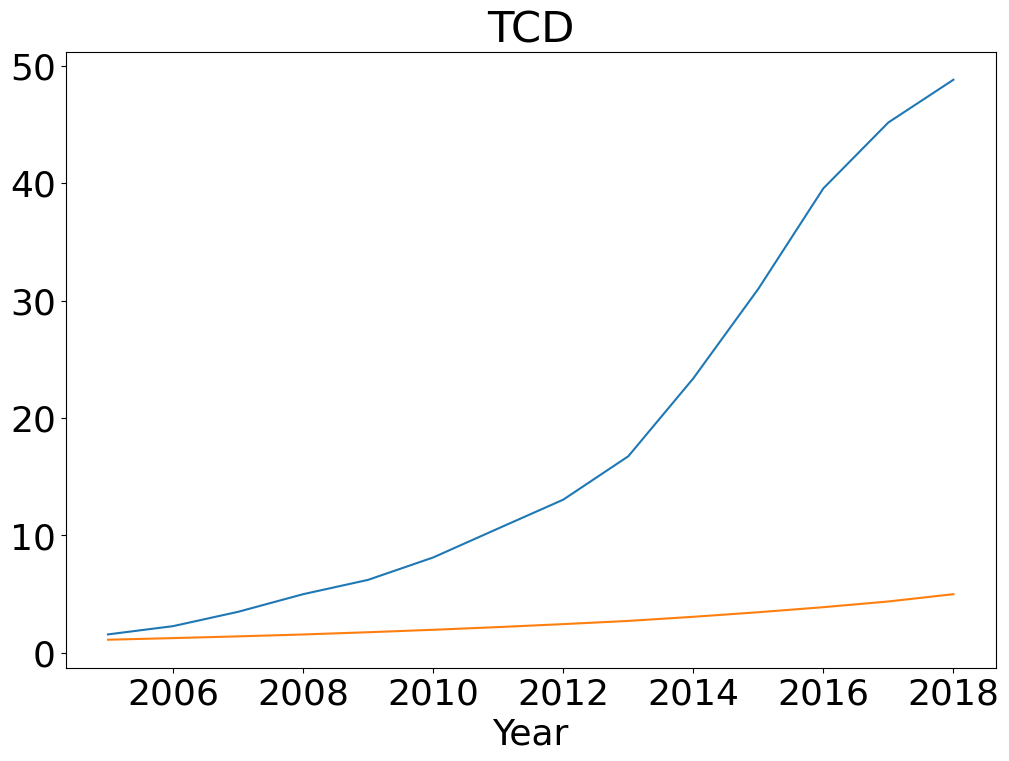

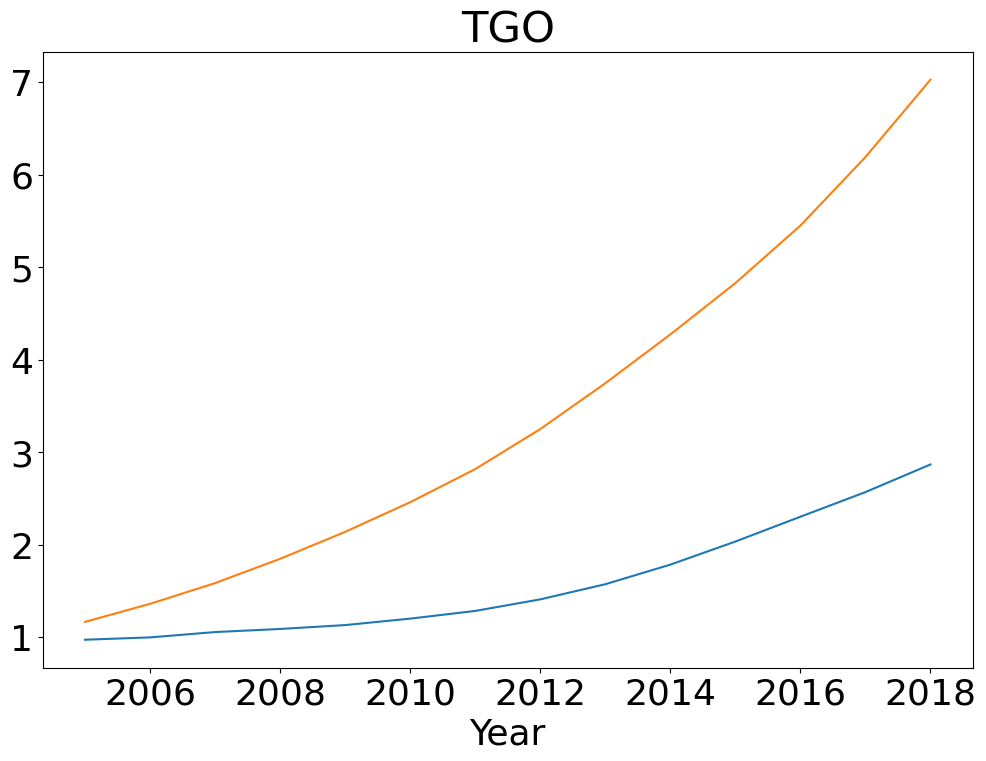

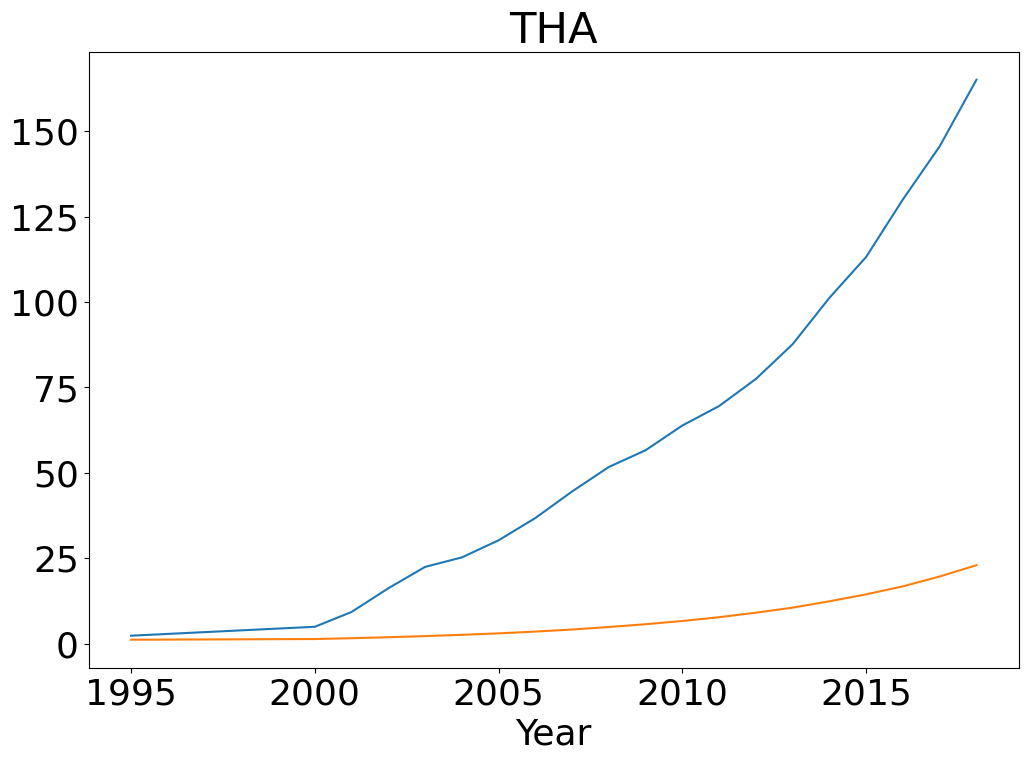

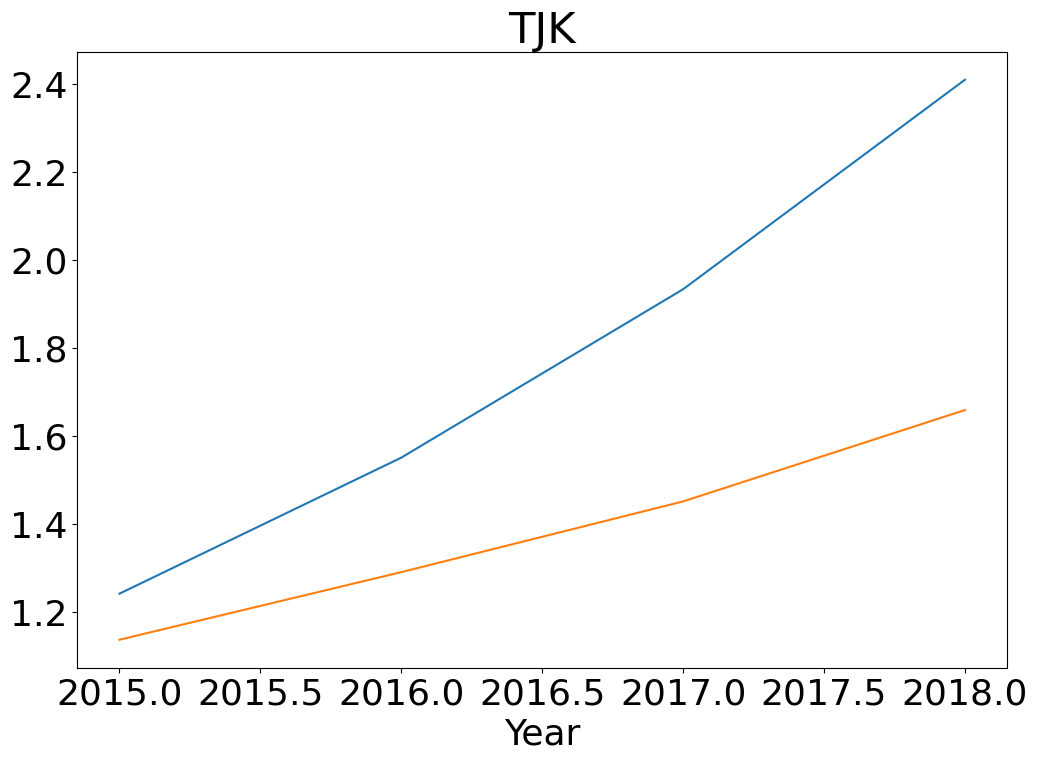

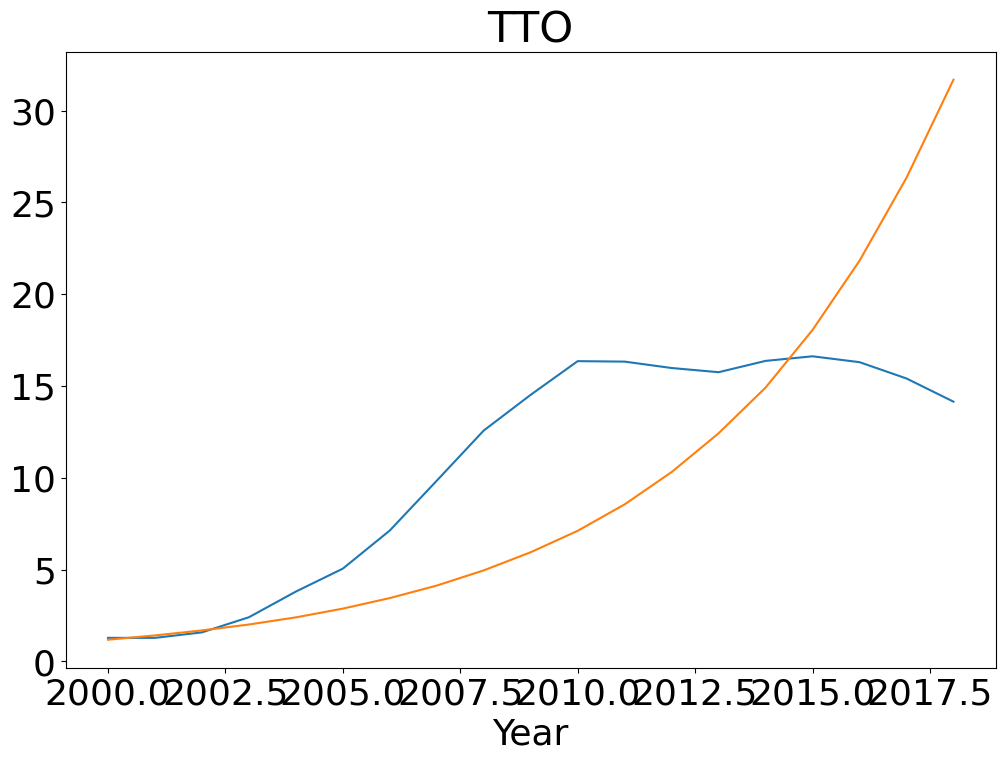

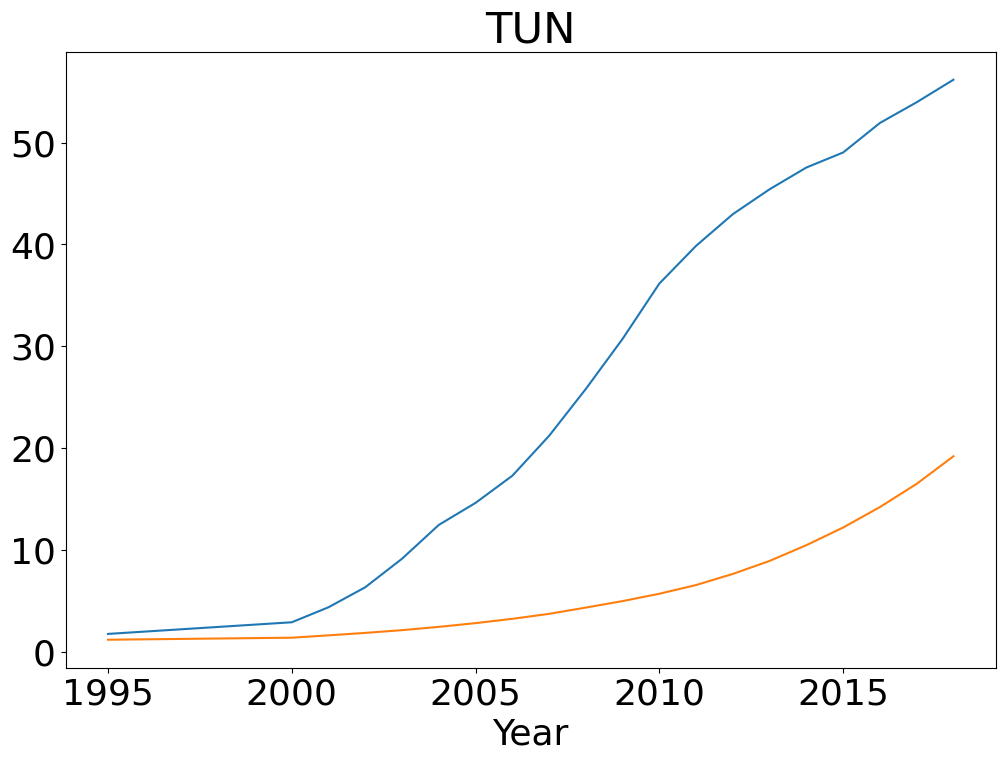

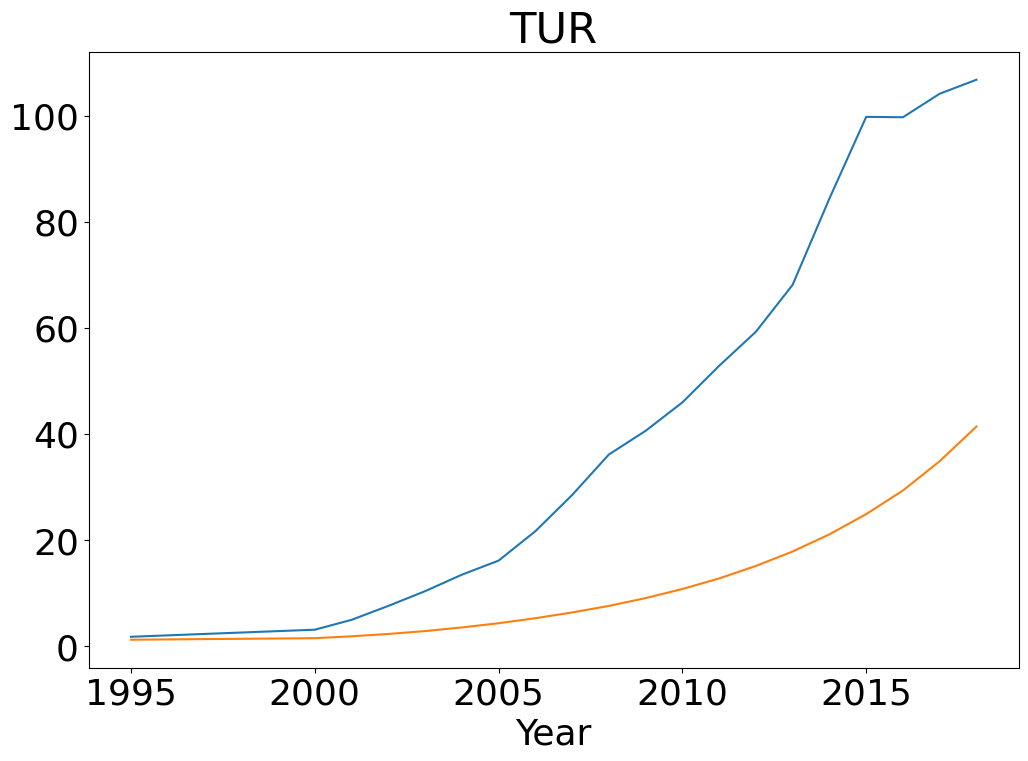

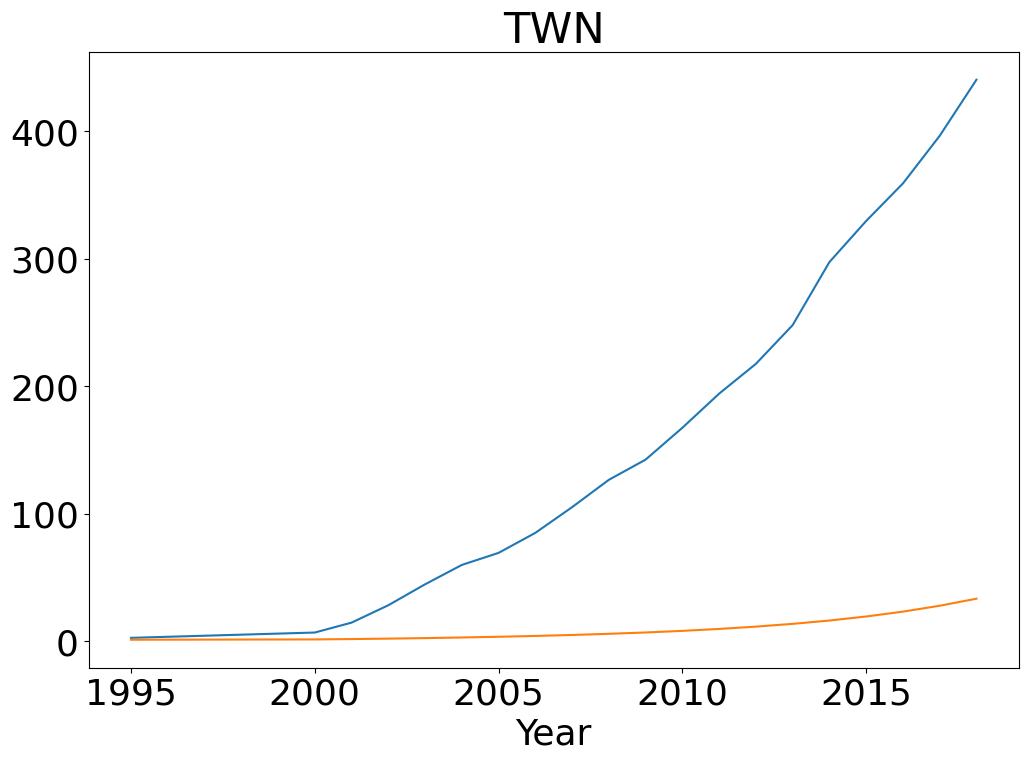

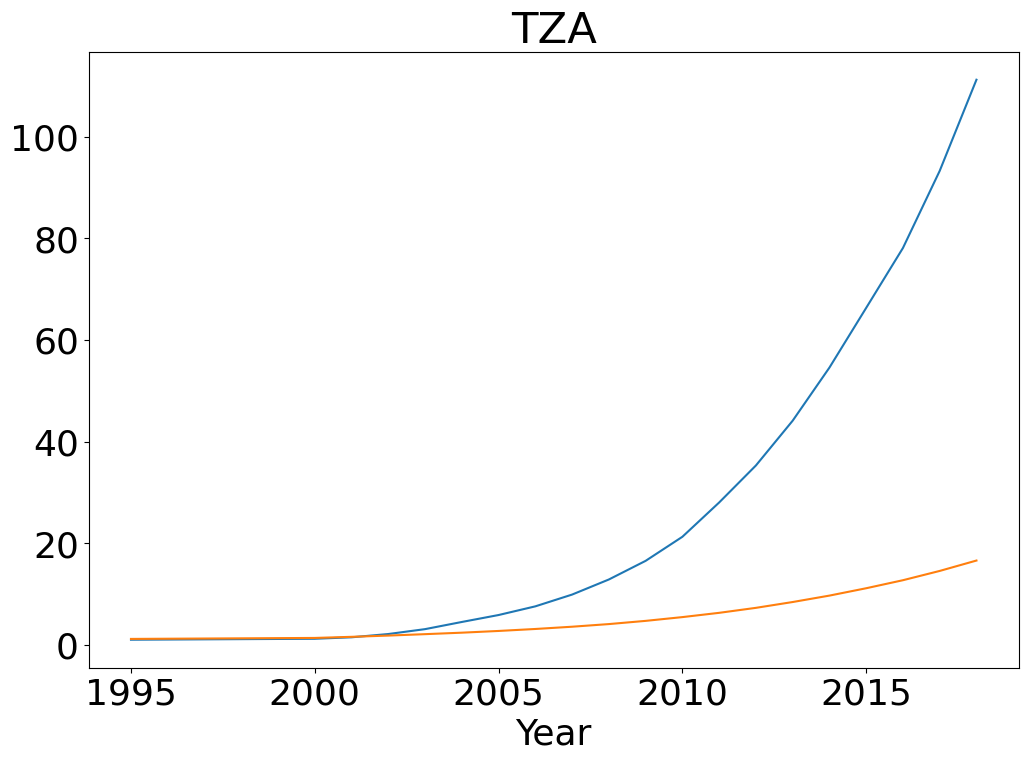

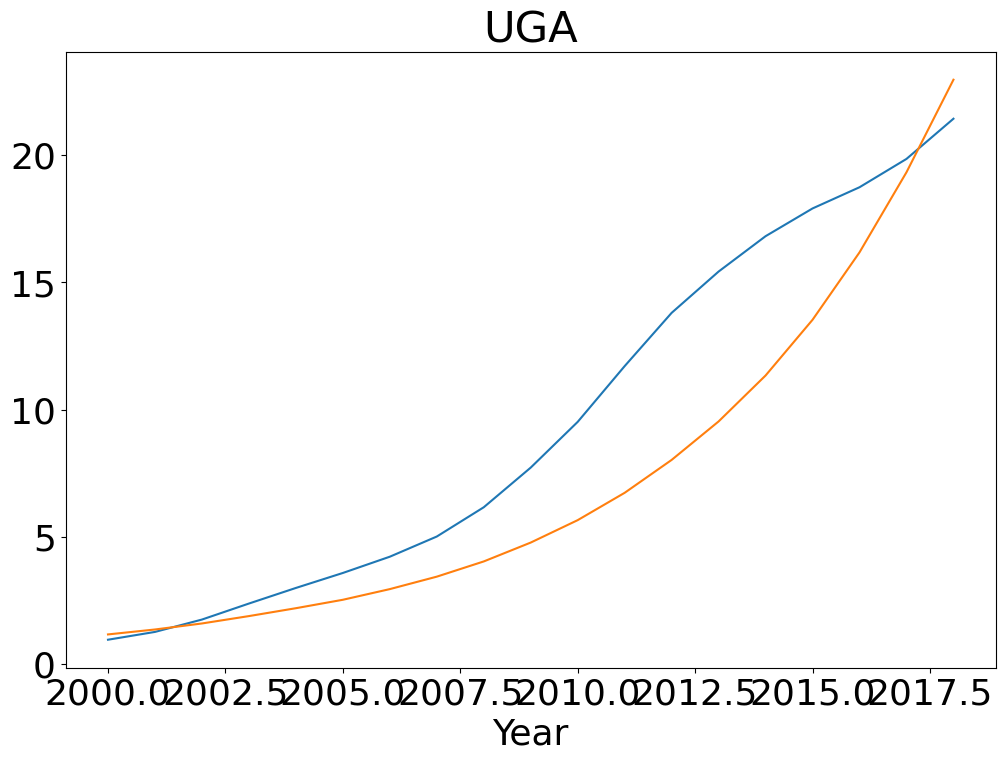

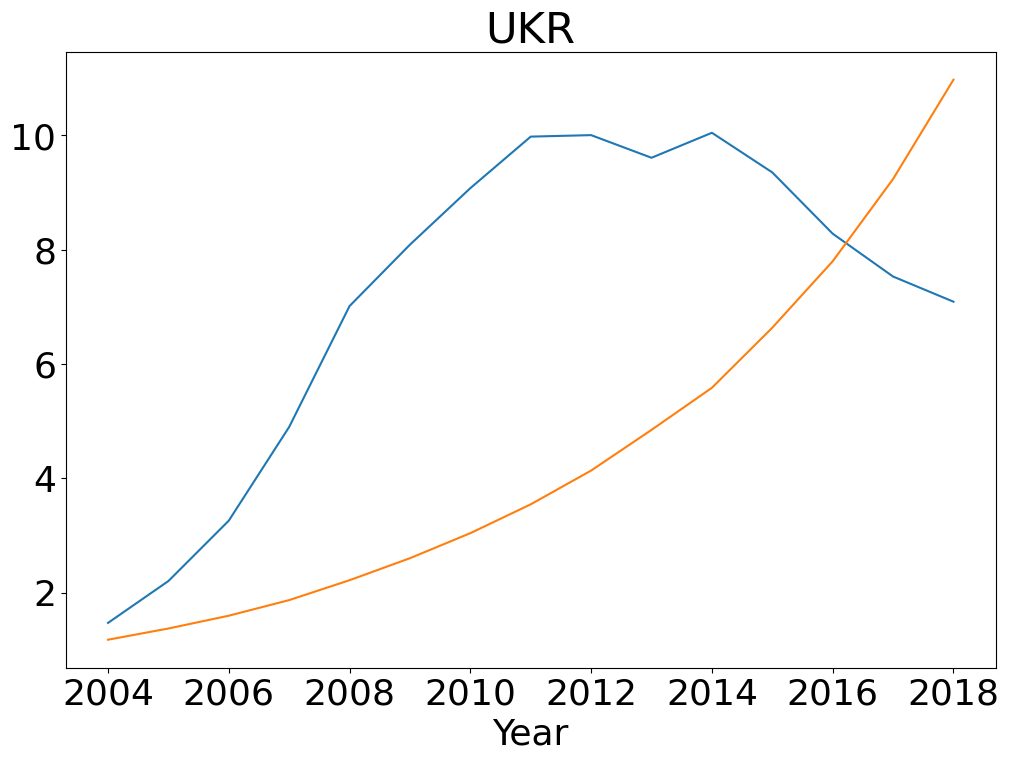

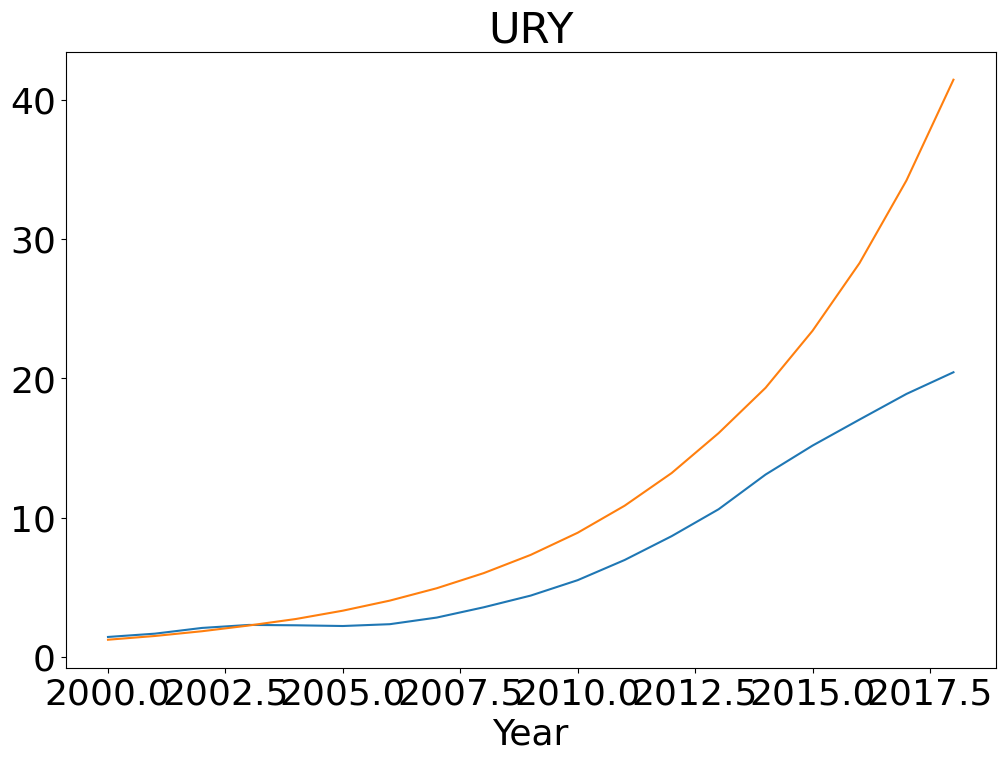

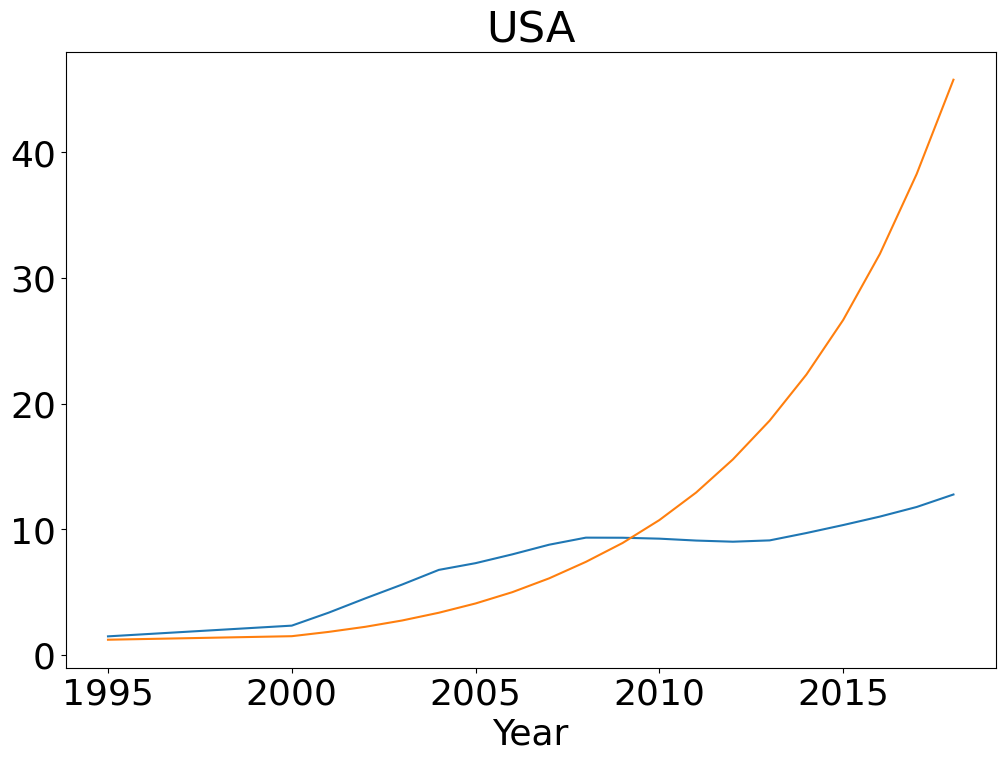

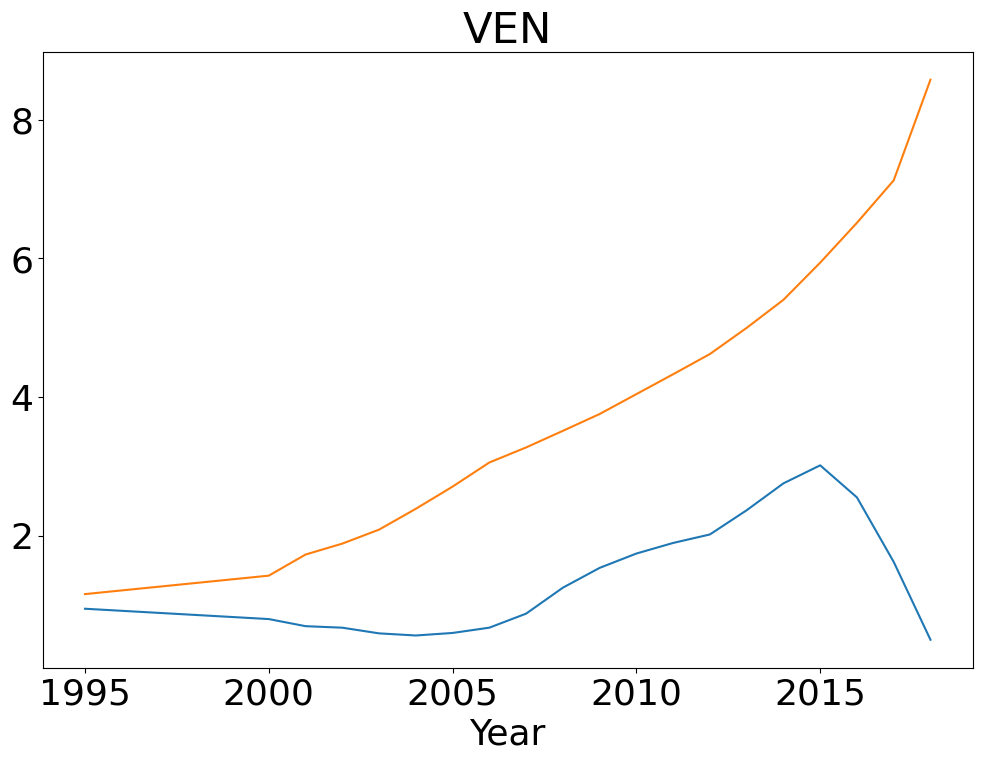

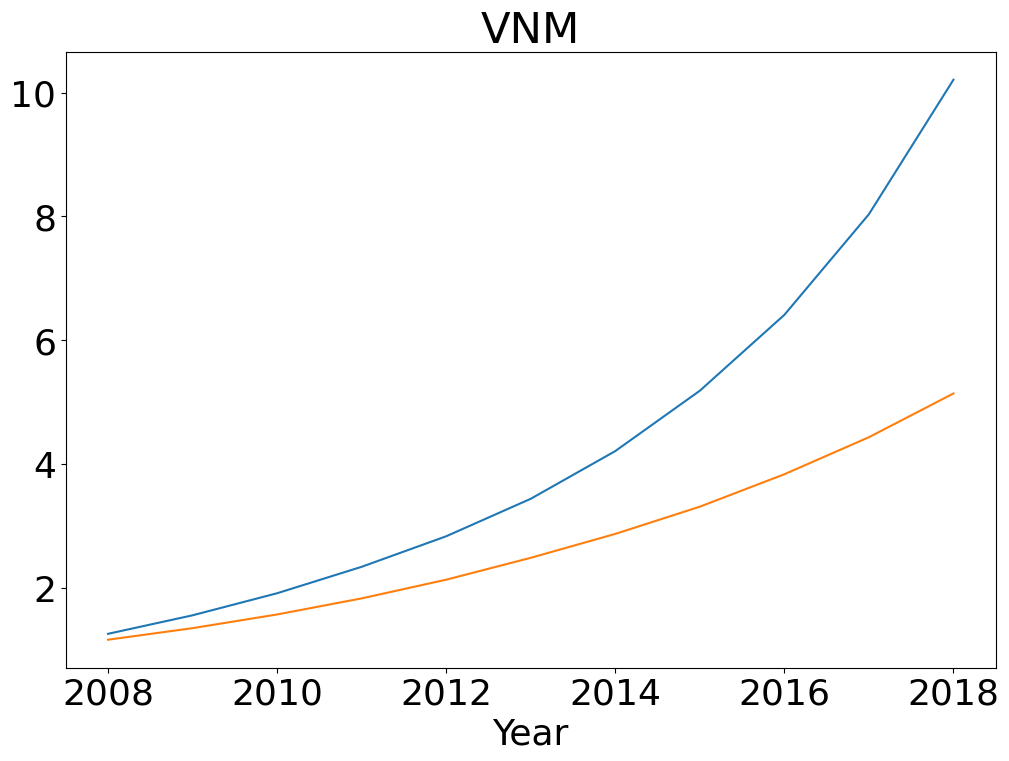

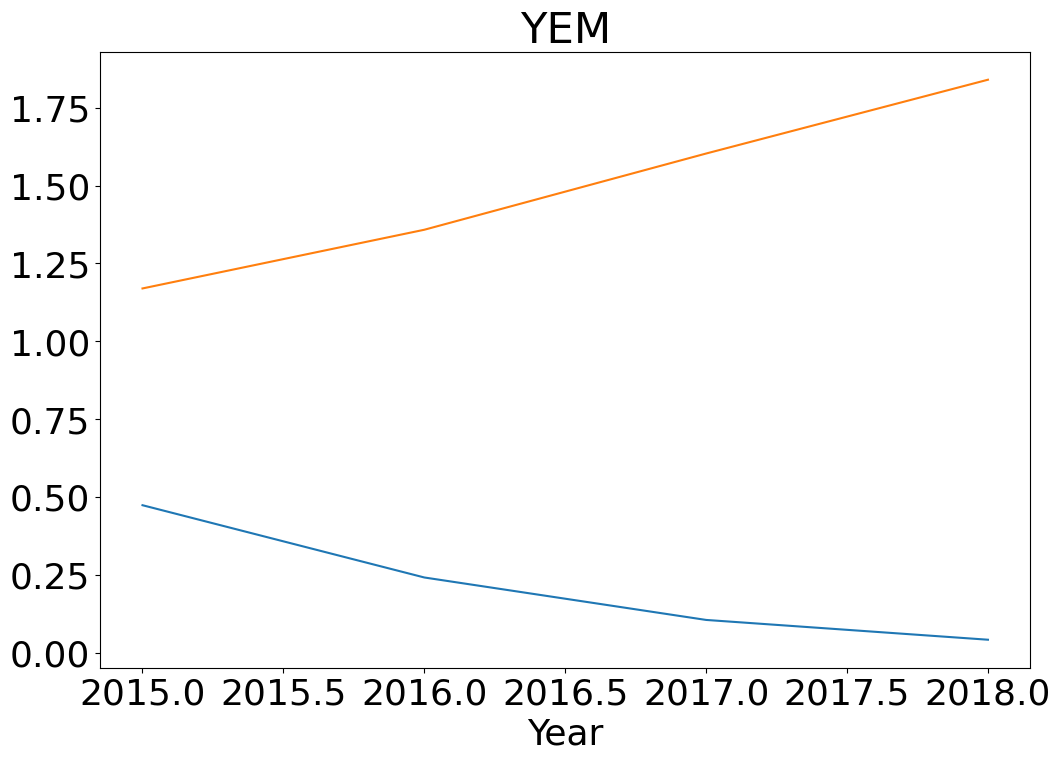

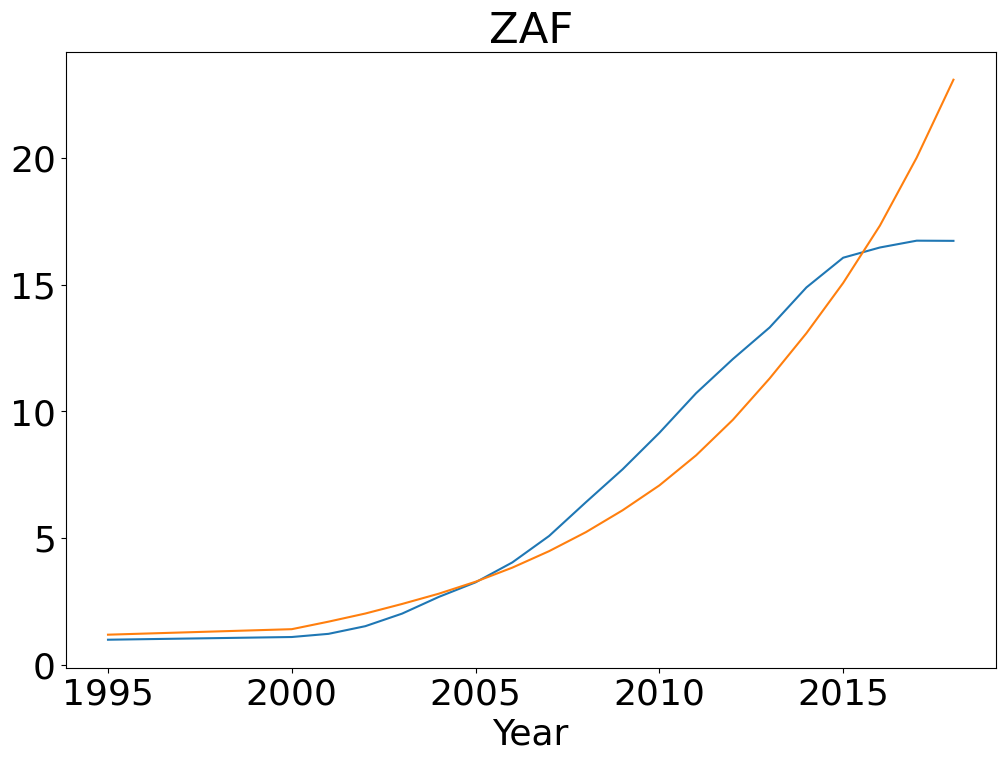

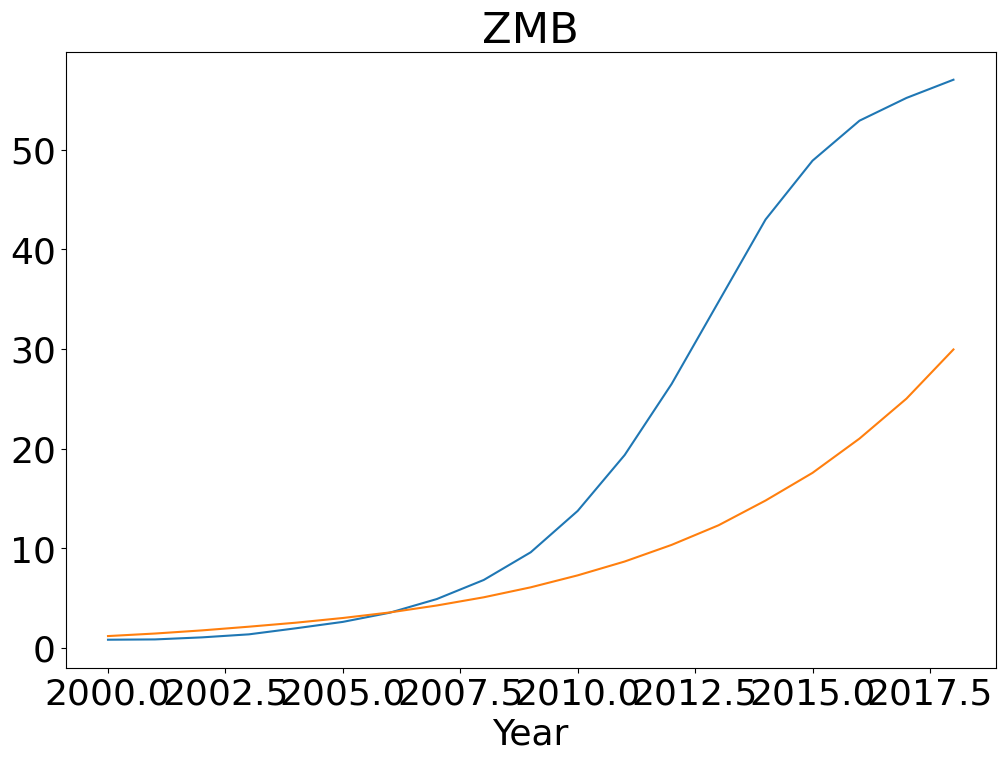

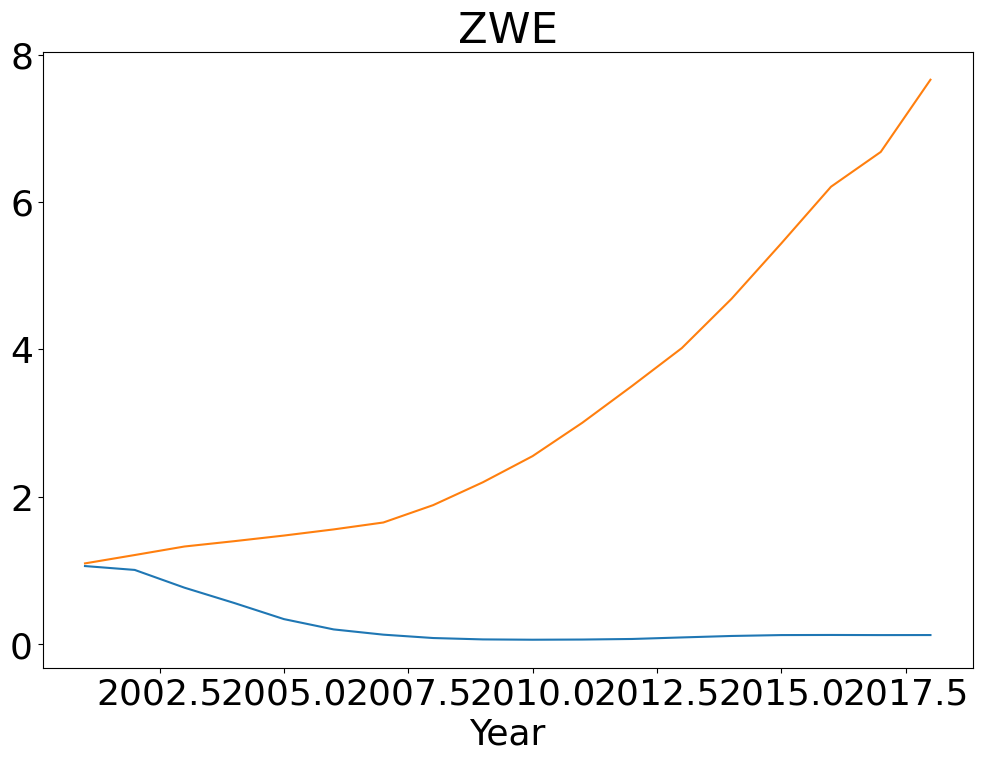

In [37]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()


In [38]:
reg_data["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff) 
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\3062481228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     58.65
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           5.29e-66
Time:                        10:23:47   Log-Likelihood:                 1220.2
No. Observations:                1667   AIC:                            -2426.
Df Residuals:                    1660   BIC:                            -2389.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0187      0.003      6.721      0.000       0.013       0.024
Legal System and Property Rights    -0.0144      0.003     -5.037      0.000      -0.020      -0.009
Sound Money                          0.0019      0.003      0.581      0.561      -0.004       0.008
Freedom to Trade Internationally     0.0021      0.004      0.537      0.591      -0.006       0.010
Regulation                           0.0109      0.004      2.615      0.009       0.003       0.019
RGDP Per Capita Lag                  0.1709      0.011     15.337      0.000       0.149       0.193
Constant                            -0.0677      0.026     -2.657      0.008      -0.118      -0.018
==============================================================================
Omnibus:                      394.469   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3026.183
Skew:                          -0.892   Prob(JB):                         0.00
Kurtosis:                       9.355   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\JLCat\AppData\Local\Temp\ipykernel_31588\961559403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot:ylabel='Frequency'>

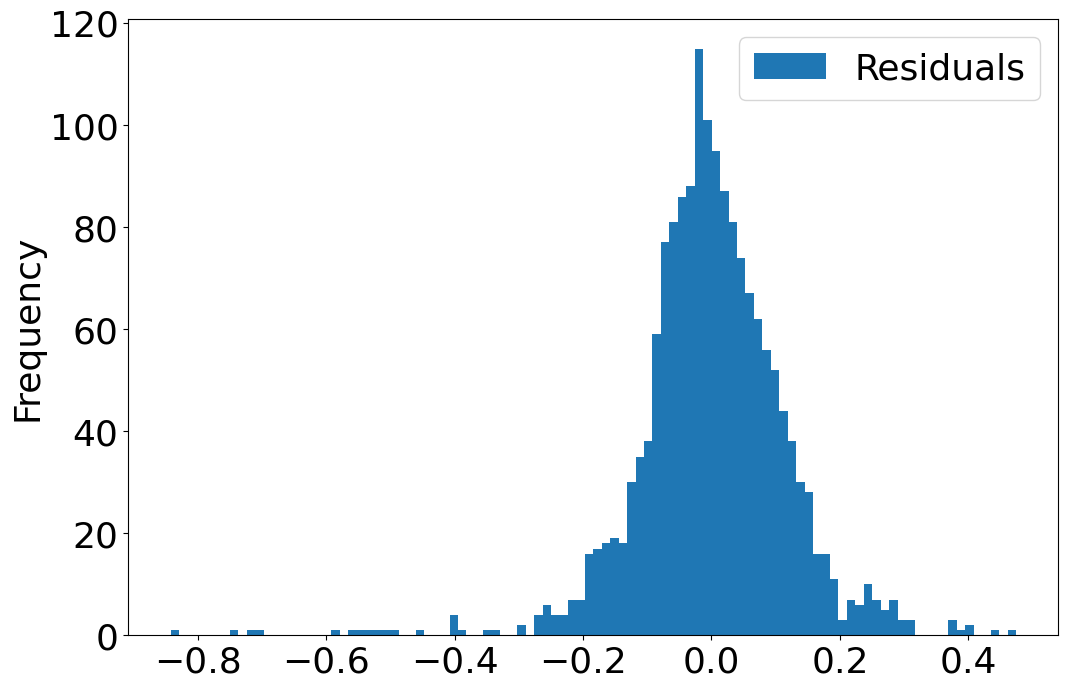

In [40]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [41]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Size of Government                         0.019    6.721     0.000   
Legal System and Property Rights          -0.014   -5.037     0.000   
Sound Money                                0.002    0.581     0.561   
Freedom to Trade Internationally           0.002    0.537     0.591   
Regulation                                 0.011    2.615     0.009   
RGDP Per Capita Lag                        0.171   15.337     0.000   
Constant                                  -0.068   -2.657     0.008   

                                  Standard Errors  
Size of Government                          0.003  
Legal System and Property Rights            0.003  
Sound Money                                 0.003  
Freedom to Trade Internationally            0.004  
Regulation                                  0.004  
RGDP Per Capita Lag                         0.011  
Constant                                    0.026

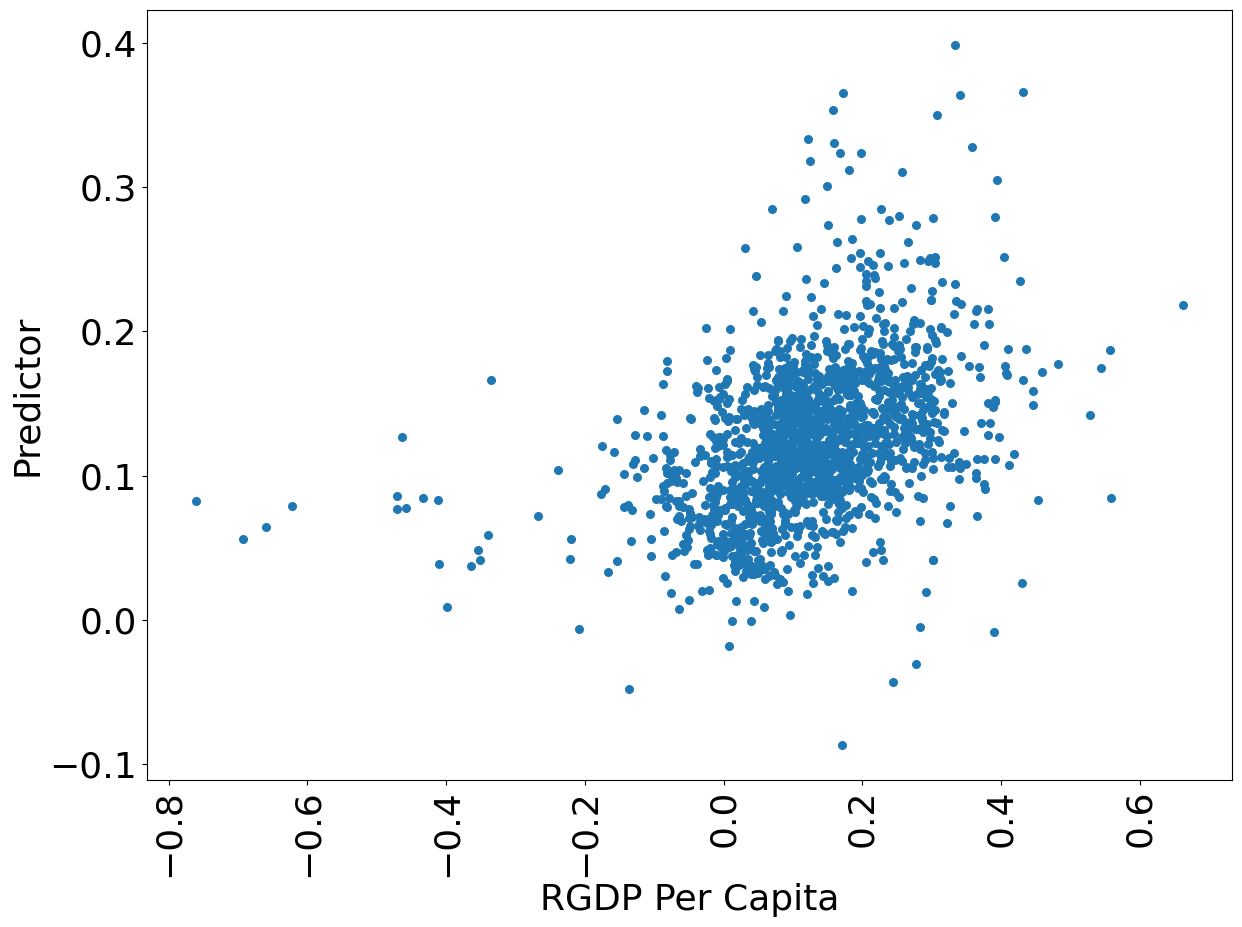

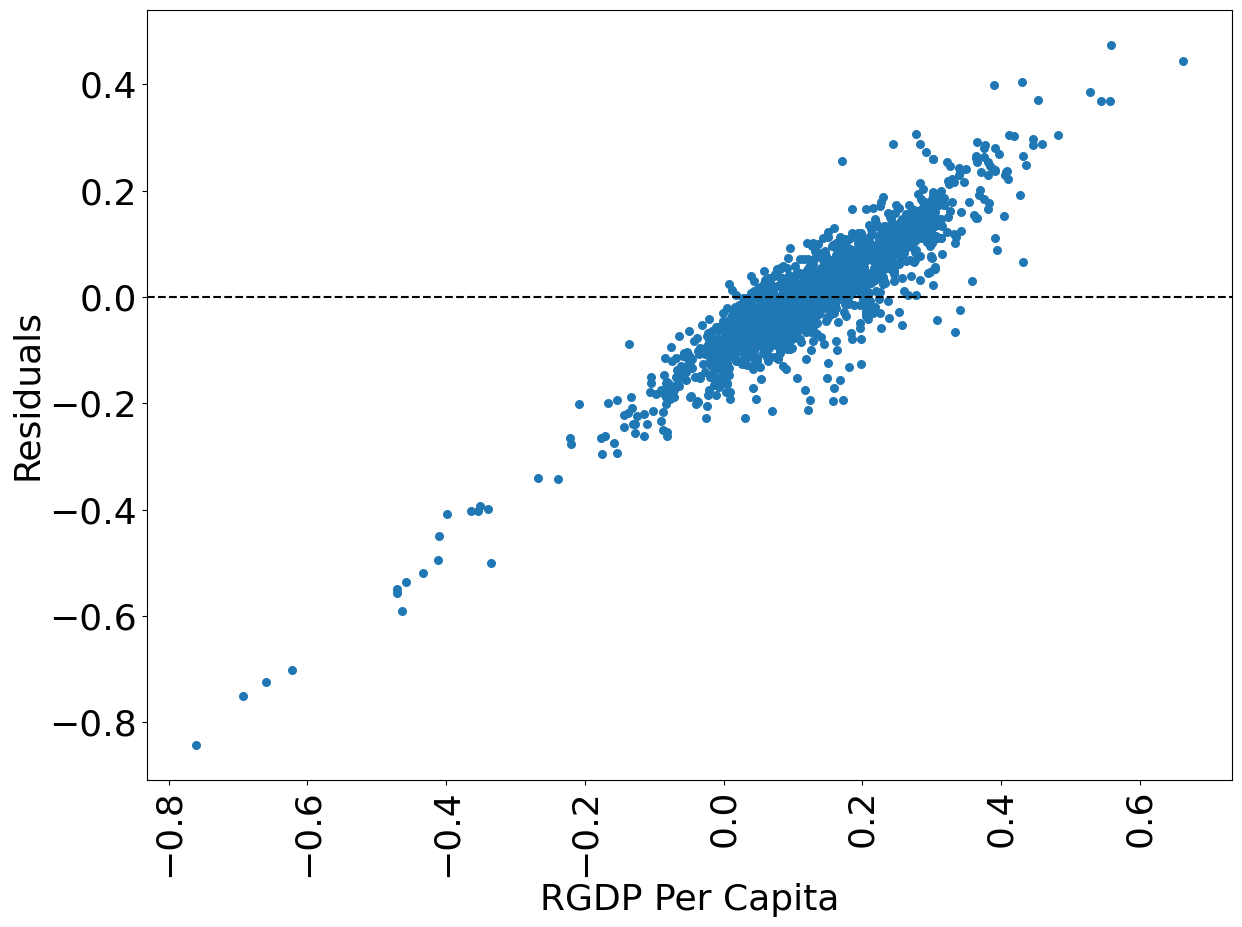

In [42]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

### Exercises
 
1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

In [43]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

In [44]:
hw_data = pd.read_excel("EFWAndRGDP.xls")

In [45]:
hw_data[hw_data["Countries"].isin(oecd_countries)]

ISO_Code_3  Year ISO_Code_2    World Bank Region  \
135         AUS  1970         AU  East Asia & Pacific   
136         NaN  1975         AU  East Asia & Pacific   
137         NaN  1980         AU  East Asia & Pacific   
138         NaN  1985         AU  East Asia & Pacific   
139         NaN  1990         AU  East Asia & Pacific   
...         ...   ...        ...                  ...   
4288        NaN  2016         US        North America   
4289        NaN  2017         US        North America   
4290        NaN  2018         US        North America   
4291        NaN  2019         US        North America   
4292        NaN  2020         US        North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
135                                                 NaN                                                                                     
136                                                 NaN                                                                                     
137                                                 NaN                                                                                     
138                                                 NaN                                                                                     
139                                                   H                                                                                     
...                                                 ...                                                                                     
4288                                                  H                                                                                     
4289                                                  H                                                                                     
4290                                                  H                                                                                     
4291                                                  H                                                                                     
4292                                                  H                                                                                     

          Countries   Summary  Size of Government  \
135       Australia  7.291154            6.863768   
136       Australia  7.002204            6.255684   
137       Australia  7.316469            6.339449   
138       Australia  7.670016            6.259326   
139       Australia  7.927001            6.708215   
...             ...       ...                 ...   
4288  United States  8.339536            7.252009   
4289  United States  8.379486            7.354358   
4290  United States  8.279612            7.409095   
4291  United States  8.249649            7.320058   
4292  United States  7.970000            6.790621   

      Legal System and Property Rights  Sound Money  \
135                           7.775615     9.581113   
136                           8.034445     8.346907   
137                           8.037057     9.085686   
138                           8.540345     9.089736   
139                           8.398730     9.018318   
...                                ...          ...   
4288                          7.793107     9.814703   
4289                          7.802657     9.772320   
4290                          7.646530     9.772494   
4291                          7.644319     9.747903   
4292                          7.555009     9.626843   

      Freedom to Trade Internationally  Regulation  \
135                           5.882101    6.335298   
136                           5.692162    6.761980   
137                           5.841104    7.389934   
138                           6.985368    7.469774   
139                           7.661409    7.750886   
...  